# **Covers de un Siglo Pasado - Década del 70.**

# 0 - Introducción.

En este trabajo, se planteó el análisis de un dataset que contiene canciones de la década de 1970. A partir del mismo, se realizó un análisis exploratorio de los datos para obtener información relevante de los mismos.

## 0.1 - Importación de Librerías.

Para trabajar con los datos, se utilizaron las siguientes librerías:

In [1]:
# Generales, usadas a lo largo de toda la notebook.

import re
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots

# 2.1. Análisis Univariado.

from wordcloud import WordCloud as wd
from lingua import Language, LanguageDetectorBuilder
#!pip install lingua-language-detector

# 2.2. Análisis Bivariado.

from scipy.optimize import curve_fit

# 2.3. Análisis Multivariado.

from sklearn.metrics import silhouette_score, davies_bouldin_score
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
import umap
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Librerías orientadas al test de hipótesis.

import scipy.stats as stats
from scipy.stats import shapiro
from scipy.stats import wilcoxon

## 0.2 - ¿De qué manera se accedió a los datos?

El dataset fue brindado por la cátedra de la materia Fundamentos de la Ciencia de Datos.

In [2]:
# Lectura del dataset.
raw_dataset = pd.read_csv("Datasets/Originales/Covers.csv")

Adicionalmente, se utilizó el dataset [Spotify Dataset](https://github.com/ddhartma/Spotify-dataset-analysis-160kTracks-1921-2020/blob/master/Spotify_160k_1921_2020_analysis.ipynb), el cual cuenta con nuestros datos extendidos para los años dentros del rango [1920, 2020].

In [3]:
spotify_dataset = pd.read_csv("Datasets/Originales/Spotify_Data.csv")

## 0.3 - ¿De qué datos se disponen?

Se disponen de 980 filas de 17 columnas en el dataset brindado por la cátedra.

In [4]:
raw_dataset.shape

(980, 17)

Las variables que podemos hallar en él son:

- ```Track```: texto libre que representa el nombre de la pista.
- ```Artist```: texto libre que representa el nombre del artista.
- ```Duration```: variable con formato string, cuantitativa, que representa la duración de la pista en minutos.
- ```Time_Signature```: variable cualitativa ordinal que representa el numero de pulsaciones por compás.
- ```Danceability```: variable cuantitativa continua que representa qué tan bailable es una cancion, basada en el tempo y en la estabilidad y fuerza del ritmo
- ```Energy```: variable cuantitativa que representa una medida de intensidad y actividad en la canción, donde los valores más altos indican una pista más enérgica.
- ```Key```: variable cuantitativa que representa la tonalidad musical en la que está compuesta la canción, representada por un número entero.
    * 0: C
    * 1: C#
    * 2: D
    * 3: D#
    * 4: E
    * 5: F
    * 6: F#
    * 7: G
    * 8: G#
    * 9: A
    * 10: A#
    * 11: B
- ```Loudness```: variable cuantitativa que representa el volumen promedio de la canción, medido en decibelios (dB).
- ```Mode```: variable cualitativa binaria que representa la modalidad de la pista. Indica si la canción está en tono mayor o menor.
- ```Speechiness```: variable cuantitativa que representa la presencia de palabras habladas en una pista, valores más altos indican cualidades más parecidas al habla.
- ```Acousticness```: variable cuantitativa que representa una medida de la calidad acústica de la pista, valores más altos indican una mayor probabilidad de ser acústica.
- ```Instrumentalness```: variable cuantitativa que la presencia de voces, valores más altos representan pistas más instrumentales.
- ```Liveness```: variable cuantitativa que representa una medida de la probabilidad de que la pista se haya interpretado en vivo, valores más altos indican más ruido de audiencia.
- ```Valence```: Una medida de la positividad musical de la pista, valores más altos indican música más positiva o alegre.
- ```Tempo```: la velocidad o ritmo de la pista, medida en pulsaciones por minuto (BPM).
- ```Popularity```: una puntuación que refleja la popularidad de la pista, generalmente basada en los recuentos de transmisiones y otras métricas.
- ```Year```: el año en que se lanzó la canción.

In [5]:
# Mostramos un resumen del dataset.
raw_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Track             980 non-null    object 
 1   Artist            980 non-null    object 
 2   Duration          980 non-null    object 
 3   Time_Signature    980 non-null    int64  
 4   Danceability      980 non-null    float64
 5   Energy            980 non-null    float64
 6   Key               980 non-null    int64  
 7   Loudness          980 non-null    float64
 8   Mode              980 non-null    int64  
 9   Speechiness       980 non-null    float64
 10  Acousticness      980 non-null    float64
 11  Instrumentalness  980 non-null    float64
 12  Liveness          980 non-null    float64
 13  Valence           980 non-null    float64
 14  Tempo             980 non-null    float64
 15  Popularity        980 non-null    int64  
 16  Year              980 non-null    int64  
dt

Y aproximadamente 170 000 filas y 19 columnas en el dataset auxiliar.

In [6]:
spotify_dataset.shape

(169907, 19)

In [7]:
spotify_dataset.info()

ssss = spotify_dataset[spotify_dataset.duplicated(subset=["name", "artists"], keep=False)]

ssss.sort_values("name")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169907 entries, 0 to 169906
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                169907 non-null  object 
 1   name              169907 non-null  object 
 2   artists           169907 non-null  object 
 3   duration_ms       169907 non-null  int64  
 4   release_date      169907 non-null  object 
 5   year              169907 non-null  int64  
 6   acousticness      169907 non-null  float64
 7   danceability      169907 non-null  float64
 8   energy            169907 non-null  float64
 9   instrumentalness  169907 non-null  float64
 10  liveness          169907 non-null  float64
 11  loudness          169907 non-null  float64
 12  speechiness       169907 non-null  float64
 13  tempo             169907 non-null  float64
 14  valence           169907 non-null  float64
 15  mode              169907 non-null  int64  
 16  key               16

id  \
3       6DdWA7D1o5TU2kXWyCLcch   
4       3vMmwsAiLDCfyc1jl76lQE   
13      5AZvNKWS9yPpXntKqHAhYw   
14      0xVbtHC4BM071oCAYrMxy1   
51      3rG8ZkmKHb4Ms6CsSzEITv   
...                        ...   
169231  0wxSv5S7CslCtUqKfNKboe   
169346  2MEWfpyEfYsj1JhwRqrIgh   
169348  5G2BKVqHNC8yl77fAWybHb   
169610  3xiTfzXJWX1mVRlZDZAtz3   
169611  4DUT4cEcOpwIGaItPAY7Ek   

                                                     name  \
3                                  "40" - Remastered 2008   
4                                  "40" - Remastered 2008   
13      "Carmen Fantasie", by Franz Waxman, based on t...   
14      "Carmen Fantasie", by Franz Waxman, based on t...   
51                       "The Take Over, The Breaks Over"   
...                                                   ...   
169231                                                 心箋   
169346                                              我的一顆心   
169348                                              我的一顆心   
169610                                               相思河畔   
169611                                               相思河畔   

                                                  artists  duration_ms  \
3                                                  ['U2']       157667   
4                                                  ['U2']       157667   
13      ['Georges Bizet', 'Jascha Heifetz', 'Donald Vo...       570920   
14      ['Georges Bizet', 'Jascha Heifetz', 'Donald Vo...       583573   
51                                       ['Fall Out Boy']       213587   
...                                                   ...          ...   
169231                                          ['幸福合唱團']       158853   
169346                                           ['霜華雪華']       208040   
169348                                           ['霜華雪華']       150840   
169610                                           ['霜華雪華']       195560   
169611                                           ['霜華雪華']       199893   

       release_date  year  acousticness  danceability  energy  \
3           2/28/83  1983       0.18500         0.371  0.5450   
4           2/28/83  1983       0.18500         0.371  0.5450   
13             1934  1934       0.94100         0.363  0.1930   
14             1946  1946       0.94300         0.291  0.1980   
51           1/1/07  2007       0.00614         0.609  0.9170   
...             ...   ...           ...           ...     ...   
169231      11/8/65  1965       0.98600         0.550  0.1020   
169346      1/26/63  1963       0.80200         0.484  0.0733   
169348     10/15/65  1965       0.95100         0.503  0.0600   
169610     10/15/65  1965       0.97700         0.636  0.1220   
169611      1/26/63  1963       0.72600         0.408  0.1310   

        instrumentalness  liveness  loudness  speechiness    tempo  valence  \
3               0.582000    0.1830    -9.315       0.0307  150.316    0.310   
4               0.582000    0.1830    -9.315       0.0307  150.316    0.310   
13              0.446000    0.4160   -20.298       0.0438  101.112    0.336   
14              0.380000    0.1940   -19.978       0.0529   71.366    0.341   
51              0.000020    0.0775    -2.563       0.0477  149.948    0.670   
...                  ...       ...       ...          ...      ...      ...   
169231          0.000268    0.1080   -23.583       0.0291   95.057    0.426   
169346          0.000060    0.0803   -21.160       0.0335  136.160    0.452   
169348          0.000000    0.0477   -20.764       0.0383  125.139    0.576   
169610          0.000327    0.0804   -23.252       0.0392  107.689    0.513   
169611          0.000000    0.1150   -23.403       0.0759   97.710    0.437   

        mode  key  popularity  explicit  
3          1    8          37         0  
4          1    8          35         0  
13         1    2           2         0  
14         1    2           0         0  
51         1    9          57         0  
...      ...  .

# 1 - Limpieza del Dataset.

Previo al análisis de los datos, se realizó una búsqueda y limpieza de datos erróneos en el dataset, al igual que un preprocesamiento de aquellos en los que se vio conveneinte.

Para esto se realizaron varios barridos completos del dataset, detectando peculiaridades.

## Duplicados.

Se hallaron canciones duplicadas en las que variaba en uno el año de lanzamiento. A continuación se presentan las canciones en cuestión:

In [8]:
duplicados = raw_dataset.duplicated(subset=["Track", "Artist"], keep=False)
filas_duplicadas = raw_dataset[duplicados]

filas_duplicadas.sort_values("Track")


Track              Artist Duration  \
776  Don’t It Make My Brown Eyes Blue       Crystal Gayle     2:38   
876  Don’t It Make My Brown Eyes Blue       Crystal Gayle     2:38   
684             How Deep Is Your Love            Bee Gees     3:32   
783             How Deep Is Your Love            Bee Gees     3:32   
854              I Love The Nightlife      Alicia Bridges     3:07   
956              I Love The Nightlife      Alicia Bridges     3:07   
662                      Muskrat Love  Captain & Tennille     3:48   
762                      Muskrat Love  Captain & Tennille     3:48   
739              You Light Up My Life         Debby Boone     3:36   
835              You Light Up My Life         Debby Boone     3:36   

     Time_Signature  Danceability  Energy  Key  Loudness  Mode  Speechiness  \
776               4         0.587   0.237    6   -16.541     1       0.0407   
876               4         0.587   0.237    6   -16.541     1       0.0407   
684               4         0.738   0.868   11    -4.373     0       0.0731   
783               4         0.738   0.868   11    -4.373     0       0.0731   
854               4         0.693   0.708    0    -7.816     1       0.0310   
956               4         0.693   0.708    0    -7.816     1       0.0310   
662               4         0.659   0.257    9   -16.552     1       0.0382   
762               4         0.659   0.257    9   -16.552     1       0.0382   
739               3         0.333   0.367    2   -10.060     1       0.0291   
835               3         0.333   0.367    2   -10.060     1       0.0291   

     Acousticness  Instrumentalness  Liveness  Valence    Tempo  Popularity  \
776        0.4990          0.000001    0.6140   0.3680   85.383           7   
876        0.4990          0.000001    0.6140   0.3680   85.383           7   
684        0.0392          0.001690    0.3880   0.3360  122.003          83   
783        0.0392          0.001690    0.3880   0.3360  122.003          83   
854        0.3090          0.003050    0.0857   0.9490  125.315          48   
956        0.3090          0.003050    0.0857   0.9490  125.315          48   
662        0.8900          0.000140    0.2520   0.2220  102.977          41   
762        0.8900          0.000140    0.2520   0.2220  102.977          41   
739        0.8310          0.000012    0.2620   0.0685   77.986          55   
835        0.8310          0.000012    0.2620   0.0685   77.986          55   

     Year  
776  1977  
876  1978  
684  1977  
783  1978  
854  1978  
956  1979  
662  1976  
762  1977  
739  1977  
835  1978

Manualmente, se verificó cuál de los años era el correcto y se eliminaron aquellas entradas incorrectas. Las entradas correctas son coincidentes con la primera aparición de la canción en el dataset.

In [9]:
clean_dataset = raw_dataset.copy()

clean_dataset = clean_dataset.drop_duplicates(subset=["Track", "Artist"])

clean_dataset

Track              Artist Duration  \
0                                           Abc       The Jackson 5     2:42   
1                                     Let It Be         The Beatles     4:03   
2                               I Want You Back       The Jackson 5     2:56   
3                                       Cecilia   Simon & Garfunkel     2:54   
4                             Spirit In The Sky    Norman Greenbaum     4:02   
..                                          ...                 ...      ...   
975                    He’s The Greatest Dancer       Sister Sledge     6:15   
976                          Don’t Cry Out Loud  Melissa Manchester     2:15   
977  When You’re In Love With A Beautiful Woman            Dr. Hook     2:54   
978              I’ll Never Love This Way Again      Dionne Warwick     2:58   
979                          Dim All The Nights        Donna Summer     4:08   

     Time_Signature  Danceability  Energy  Key  Loudness  Mode  Speechiness  \
0                 4         0.682   0.926    3    -2.515     0       0.0607   
1                 4         0.443   0.403    0    -8.339     1       0.0322   
2                 4         0.469   0.538    8   -13.559     1       0.0575   
3                 4         0.755   0.876    0    -8.867     1       0.0362   
4                 4         0.609   0.617    9    -7.091     1       0.0307   
..              ...           ...     ...  ...       ...   ...          ...   
975               4         0.700   0.815    7    -9.711     0       0.0440   
976               4         0.298   0.252    0    -8.950     1       0.0339   
977               4         0.665   0.663    8   -11.367     1       0.0386   
978               4         0.452   0.434    8    -8.870     1       0.0399   
979               4         0.758   0.540    7   -10.911     1       0.0385   

     Acousticness  Instrumentalness  Liveness  Valence    Tempo  Popularity  \
0         0.04040          0.000000    0.1900    0.860  105.969          81   
1         0.63100          0.000000    0.1110    0.410  143.462          78   
2         0.30500          0.000114    0.3700    0.885  196.606          78   
3         0.35700          0.000005    0.2200    0.954  102.762          76   
4         0.09940          0.004040    0.1180    0.543  128.903          75   
..            ...               ...       ...      ...      ...         ...   
975       0.00115          0.001240    0.0901    0.837  113.245          14   
976       0.90100          0.000009    0.1270    0.193   90.955           9   
977       0.48500          0.006820    0.1570    0.792  110.656           7   
978       0.79200          0.013900    0.1650    0.247  137.702           5   
979       0.05510          0.000000    0.0343    0.661  121.581           0   

     Year  
0    1970  
1    1970  
2    1970  
3    1970  
4    1970  
..    ...  
975  1979  
976  1979  
977  1979  
978  1979  
979  1979  

[975 rows x 17 columns]

Se hallaron también registros con el mismo nombre en la columna *track*. Ambas canciones existen: su nombre, artista y año son correctos. No obstante, los valores en las demás columnas están repetidos.

In [10]:
duplicados_por_columnas = clean_dataset.duplicated(subset=["Track"], keep=False)
filas_duplicadas_columnas = clean_dataset[duplicados_por_columnas]
filas_duplicadas_columnas = filas_duplicadas_columnas.sort_values("Track")

filas_duplicadas_columnas


Track  \
497                                    Best Of My Love   
701                                    Best Of My Love   
15                          Bridge Over Troubled Water   
101                         Bridge Over Troubled Water   
514                                      Dance With Me   
819                                      Dance With Me   
410                              Feel Like Makin’ Love   
509                              Feel Like Makin’ Love   
903                                               Fire   
495                                               Fire   
628                        Got To Get You Into My Life   
833                        Got To Get You Into My Life   
282  I’d Like To Teach The World To Sing (IN Perfec...   
281  I’d Like To Teach The World To Sing (IN Perfec...   
890                                               Lady   
485                                               Lady   
134                              Never Can Say Goodbye   
529                              Never Can Say Goodbye   
399                                          On And On   
702                                          On And On   

                       Artist Duration  Time_Signature  Danceability  Energy  \
497                    Eagles     3:40               4         0.784   0.713   
701              The Emotions     3:40               4         0.784   0.713   
15          Simon & Garfunkel     4:53               4         0.149   0.206   
101           Aretha Franklin     4:53               4         0.149   0.206   
514                   Orleans     3:51               4         0.912   0.511   
819               Peter Brown     3:51               4         0.912   0.511   
410             Roberta Flack     5:13               4         0.543   0.529   
509               Bad Company     5:13               4         0.543   0.529   
903       The Pointer Sisters     3:47               4         0.638   0.831   
495              Ohio Players     3:47               4         0.638   0.831   
628               The Beatles     2:29               4         0.521   0.524   
833        Earth, Wind & Fire     2:29               4         0.521   0.524   
282           The New Seekers     2:30               4         0.645   0.311   
281      The Hillside Singers     2:30               4         0.645   0.311   
890         Little River Band     3:03               4         0.539   0.160   
485                      Styx     3:03               4         0.539   0.160   
134             The Jackson 5     2:59               4         0.527   0.821   
529             Gloria Gaynor     2:59               4         0.527   0.821   
399  Gladys Knight & the Pips     7:26               3         0.438   0.687   
702            Stephen Bishop     7:26               3         0.438   0.687   

     Key  Loudness  Mode  Speechiness  Acousticness  Instrumentalness  \
497    0    -6.865     1       0.0339      0.447000          0.140000   
701    0    -6.865     1       0.0339      0.447000          0.140000   
15     3   -13.888     1       0.0323      0.822000          0.000649   
101    3   -13.888     1       0.0323      0.822000          0.000649   
514    9    -6.365     1       0.2030      0.025900          0.000000   
819    9    -6.365     1       0.2030      0.025900          0.000000   
410    7    -9.717     1       0.0301      0.326000          0.002690   
509    7    -9.717     1       0.0301      0.326000          0.002690   
903    8    -5.039     1       0.0490      0.142000          0.000000   
495    8    -5.039     1       0.0490      0.142000          0.000000   
628    0    -6.136     1       0.0302      0.420000          0.000009   
833    0    -6.136     1       0.0302      0.420000          0.000009   
282   11   -12.264     1       0.0342      0.810000          0.000000   
281   11   -12.264     1       0.0342      0.810000          0.000000   
890    3   -13.285     1       0.0329      0.881000   

Para el análisis de track, artista y año se pueden quedar, ya que son datos reales. Son los demás valores (danceability, acousticness y demás) los que están mal. Por consiguiente, hicimos la separación en dos datasets para distintos análisis:

Al final de esta sección...

In [11]:
conservative_clean_dataset = clean_dataset.copy()

clean_dataset = clean_dataset.drop(filas_duplicadas_columnas.index)

clean_dataset

Track              Artist Duration  \
0                                           Abc       The Jackson 5     2:42   
1                                     Let It Be         The Beatles     4:03   
2                               I Want You Back       The Jackson 5     2:56   
3                                       Cecilia   Simon & Garfunkel     2:54   
4                             Spirit In The Sky    Norman Greenbaum     4:02   
..                                          ...                 ...      ...   
975                    He’s The Greatest Dancer       Sister Sledge     6:15   
976                          Don’t Cry Out Loud  Melissa Manchester     2:15   
977  When You’re In Love With A Beautiful Woman            Dr. Hook     2:54   
978              I’ll Never Love This Way Again      Dionne Warwick     2:58   
979                          Dim All The Nights        Donna Summer     4:08   

     Time_Signature  Danceability  Energy  Key  Loudness  Mode  Speechiness  \
0                 4         0.682   0.926    3    -2.515     0       0.0607   
1                 4         0.443   0.403    0    -8.339     1       0.0322   
2                 4         0.469   0.538    8   -13.559     1       0.0575   
3                 4         0.755   0.876    0    -8.867     1       0.0362   
4                 4         0.609   0.617    9    -7.091     1       0.0307   
..              ...           ...     ...  ...       ...   ...          ...   
975               4         0.700   0.815    7    -9.711     0       0.0440   
976               4         0.298   0.252    0    -8.950     1       0.0339   
977               4         0.665   0.663    8   -11.367     1       0.0386   
978               4         0.452   0.434    8    -8.870     1       0.0399   
979               4         0.758   0.540    7   -10.911     1       0.0385   

     Acousticness  Instrumentalness  Liveness  Valence    Tempo  Popularity  \
0         0.04040          0.000000    0.1900    0.860  105.969          81   
1         0.63100          0.000000    0.1110    0.410  143.462          78   
2         0.30500          0.000114    0.3700    0.885  196.606          78   
3         0.35700          0.000005    0.2200    0.954  102.762          76   
4         0.09940          0.004040    0.1180    0.543  128.903          75   
..            ...               ...       ...      ...      ...         ...   
975       0.00115          0.001240    0.0901    0.837  113.245          14   
976       0.90100          0.000009    0.1270    0.193   90.955           9   
977       0.48500          0.006820    0.1570    0.792  110.656           7   
978       0.79200          0.013900    0.1650    0.247  137.702           5   
979       0.05510          0.000000    0.0343    0.661  121.581           0   

     Year  
0    1970  
1    1970  
2    1970  
3    1970  
4    1970  
..    ...  
975  1979  
976  1979  
977  1979  
978  1979  
979  1979  

[955 rows x 17 columns]

## Tracks que contienen la palabra *by*.

Se detectaron canciones inexistentes y con artistas extraños.

In [12]:
# Canciones inexistentes detectadas.
indices = [187, 248, 583, 723]

clean_dataset.loc[indices]


Track          Artist Duration  Time_Signature  Danceability  Energy  \
187     Down  THE LAZY RIVER     4:21               4         0.541   0.366   
248   Betcha      GOLLY, WOW     4:13               4         0.430   0.560   
583      All          MYSELF     3:38               4         0.585   0.550   
723  Blinded       THE LIGHT     7:08               4         0.456   0.696   

     Key  Loudness  Mode  Speechiness  Acousticness  Instrumentalness  \
187   11   -10.412     1       0.0748         0.560          0.000001   
248    3    -9.620     1       0.0268         0.362          0.000107   
583   11    -7.342     1       0.0255         0.408          0.000040   
723    5   -10.000     1       0.0653         0.291          0.000207   

     Liveness  Valence    Tempo  Popularity  Year  
187    0.0946    0.168  159.707          82  1972  
248    0.4950    0.391   72.238          50  1972  
583    0.1150    0.839   78.176          81  1976  
723    0.0853    0.508  142.156          64  1977

Se analizó cada una de las canciones y se encontró la canción original a la que referencian. De esta forma, se realizó la corrección de los datos.

In [13]:
# Corregimos el track.
clean_dataset.loc[indices, "Track"] = ["Down by the Lazy River", "Betcha By Golly, Wow", "All by Myself", "Blinded by The Light"]

# Corregimos el artista.
clean_dataset.loc[indices, "Artist"] = ["The Osmonds", "The Stylistics", "Eric Carmen", "Manfred Mann"]

# La que dura aprox. 7:08 es All by Myself mientras que la que dura 3:38 aprox. es Blinded by the Light. O sea, están intercambiados los datos.
clean_dataset.loc[indices]

Track          Artist Duration  Time_Signature  \
187  Down by the Lazy River     The Osmonds     4:21               4   
248    Betcha By Golly, Wow  The Stylistics     4:13               4   
583           All by Myself     Eric Carmen     3:38               4   
723    Blinded by The Light    Manfred Mann     7:08               4   

     Danceability  Energy  Key  Loudness  Mode  Speechiness  Acousticness  \
187         0.541   0.366   11   -10.412     1       0.0748         0.560   
248         0.430   0.560    3    -9.620     1       0.0268         0.362   
583         0.585   0.550   11    -7.342     1       0.0255         0.408   
723         0.456   0.696    5   -10.000     1       0.0653         0.291   

     Instrumentalness  Liveness  Valence    Tempo  Popularity  Year  
187          0.000001    0.0946    0.168  159.707          82  1972  
248          0.000107    0.4950    0.391   72.238          50  1972  
583          0.000040    0.1150    0.839   78.176          81  1976  
723          0.000207    0.0853    0.508  142.156          64  1977

## Canciones dobles.

Se hallaron registros en los que se especificaban dos canciones en lugar de una. Los demás datos correspondientes al registro correspondían a una de las canciones o a ninguna de las dos.

In [14]:
clean_dataset[clean_dataset["Track"].str.contains("/")]

Track                        Artist  \
87                 Come Together / Something *                   The Beatles   
89       Whole Lotta Love / Living Loving Maid                  Led Zeppelin   
121                Uncle Albert/Admiral Halsey        Paul & Linda McCartney   
181               Maggie May/Reason To Believe                   Rod Stewart   
184  Have You Ever Seen The Rain / Hey Tonight  Creedence Clearwater Revival   
553                One Man Woman/One Woman Man       Paul Anka & Odia Coates   
564            The Way We Were/Try To Remember      Gladys Knight & the Pips   
676                   Beth / Detroit Rock City                          Kiss   
766               Star Wars Theme/Cantina Band                          Meco   
867      We Will Rock You/We Are The Champions                         Queen   
974                       The Main Event/Fight              Barbra Streisand   

    Duration  Time_Signature  Danceability  Energy  Key  Loudness  Mode  \
87      4:17               4         0.524   0.364    9   -12.551     0   
89      5:13               4         0.297   0.934    1    -5.606     1   
121     4:55               4         0.371   0.507    7    -9.805     1   
181     5:50               4         0.566   0.585    2    -8.733     1   
184     2:38               4         0.735   0.556    0    -5.863     1   
553     4:32               4         0.627   0.645   11    -6.820     1   
564     4:31               4         0.285   0.265    7   -12.542     1   
676     2:48               4         0.453   0.286    0   -11.403     1   
766     3:32               4         0.677   0.915    0    -3.859     1   
867     3:51               3         0.281   0.634    0    -5.808     1   
974     4:53               4         0.647   0.875    7    -8.503     1   

     Speechiness  Acousticness  Instrumentalness  Liveness  Valence    Tempo  \
87        0.0310      0.025800          0.433000    0.1320    0.505  167.534   
89        0.0943      0.000274          0.003740    0.7800    0.384   79.781   
121       0.0325      0.580000          0.020100    0.1750    0.535   91.786   
181       0.0362      0.721000          0.517000    0.0911    0.567  129.475   
184       0.0276      0.117000          0.000000    0.0738    0.877  127.983   
553       0.0293      0.045700          0.000000    0.0655    0.509   91.015   
564       0.0418      0.354000          0.000003    0.7440    0.231  147.194   
676       0.0321      0.807000          0.000034    0.2060    0.345  114.003   
766       0.0912      0.001210          0.916000    0.3220    0.545  124.929   
867       0.0391      0.236000          0.000013    0.0386    0.329   95.248   
974       0.0431      0.050200          0.000000    0.1720    0.684  137.392   

     Popularity  Year  
87           14  1970  
89            0  1970  
121          59  1971  
181           7  1971  
184           0  1971  
553          44  1975  
564          36  1975  
676          11  1976  
766          36  1977  
867          31  1978  
974          25  1979

Por ejemplo: en el registro 676, si bien la canción "Detroit Rock City" es de Kiss, ¡esta salió en el año 1999!

Debido a que la cantidad de registros con estas características es baja y no es posible comprobar la veracidad de todos los datos, se tomó la decisión de eliminarlos.

In [15]:
canciones_dobles = clean_dataset["Track"].str.contains("/")

p_canciones_dobles = clean_dataset[canciones_dobles].shape[0] / clean_dataset.shape[0]

# Eliminación de las canciones dobles.

clean_dataset = clean_dataset[~canciones_dobles]

print(f"Porcentaje de canciones dobles: {round(p_canciones_dobles * 100, 2)} %")

Porcentaje de canciones dobles: 1.15 %


## Preprocesamiento del dataset.

Se realizó una conversión de la duración, hallada en minutos y expresada en strings, a segundos:

In [16]:
clean_dataset.loc[:, "Duration"] = clean_dataset["Duration"].str.split(":")

clean_dataset.loc[:, "Duration"] = clean_dataset["Duration"].apply(lambda x: int(x[0]) * 60 + int(x[1]))

clean_dataset = clean_dataset.astype({"Duration": "Int64"})

clean_dataset.sort_values("Duration", ascending=False)

Track                 Artist  Duration  Time_Signature  \
449          Tubular Bells          Mike Oldfield      1561               4   
645  Love To Love You Baby           Donna Summer      1008               4   
920               Promises           Eric Clapton       646               4   
348            Pillow Talk                 Sylvia       645               4   
846          Feels So Good         Chuck Mangione       582               4   
..                     ...                    ...       ...             ...   
865       What’s Your Name         Lynyrd Skynyrd        87               4   
149    Bring The Boys Home            Freda Payne        87               4   
227           Day Dreaming        Aretha Franklin        80               4   
571               Dynomite  Tony Camillo’s Bazuka        77               4   
643             Happy Days      Pratt and McClain        76               4   

     Danceability  Energy  Key  Loudness  Mode  Speechiness  Acousticness  \
449         0.374  0.2190    4   -19.104     0       0.0343       0.56400   
645         0.622  0.4250   10   -16.256     1       0.0520       0.29200   
920         0.362  0.4210   10   -11.699     1       0.0372       0.28100   
348         0.919  0.3620    8    -8.331     1       0.3680       0.57600   
846         0.576  0.6030    5    -9.603     1       0.0329       0.45500   
..            ...     ...  ...       ...   ...          ...           ...   
865         0.889  0.4500   11    -6.852     0       0.0357       0.33400   
149         0.330  0.2830    0   -15.971     1       0.0610       0.57500   
227         0.213  0.0751    7   -27.103     1       0.0433       0.97100   
571         0.685  0.4030    0   -10.887     1       0.3050       0.00483   
643         0.212  0.5540    0    -8.352     1       0.0473       0.00325   

     Instrumentalness  Liveness  Valence    Tempo  Popularity  Year  
449          0.560000    0.1140   0.0579  103.535          47  1974  
645          0.000057    0.0498   0.4170   96.168          50  1976  
920          0.000062    0.0943   0.2330  114.669          65  1979  
348          0.000000    0.1340   0.4160  104.987          49  1973  
846          0.053700    0.0406   0.5240  103.658          51  1978  
..                ...       ...      ...      ...         ...   ...  
865          0.000000    0.3490   0.7830  112.023          36  1978  
149          0.094700    0.2350   0.2870  157.963          49  1971  
227          0.441000    0.1130   0.0346   85.295          58  1972  
571          0.000000    0.1740   0.5460   93.826          23  1975  
643          0.859000    0.3240   0.6250  137.787          51  1976  

[944 rows x 17 columns]

# 2 - Análisis Exploratorio.

A partir del uso de herramientas estadísticas y de visualización:
...

Se llevaron a cabo las siguientes fases:
1. Análisis univariado.
2. Análisis bivariado.
3. Análisis multivariado.

Se busca, así, tener una idea completa de cómo son los datos, cómo estás relacionadas, etc.

## 2.1 - Análisis Univariado.

Para cada una de las variables, intentaron determinarse peculiaridades en ellas.

### Track.


#### Análisis.

Hallamos de interés analizar la cantidad de palabras en el título de la canción para observar si existe alguna relación con alguna de las demás variables. Para ello, se añadió al dataset una nueva columna que especifique lo mencionado.

In [17]:
track_dataset = clean_dataset.copy()

track_dataset["Track_Length"] = track_dataset["Track"].str.split().str.len()

track_dataset

Track              Artist  Duration  \
0                                           Abc       The Jackson 5       162   
1                                     Let It Be         The Beatles       243   
2                               I Want You Back       The Jackson 5       176   
3                                       Cecilia   Simon & Garfunkel       174   
4                             Spirit In The Sky    Norman Greenbaum       242   
..                                          ...                 ...       ...   
975                    He’s The Greatest Dancer       Sister Sledge       375   
976                          Don’t Cry Out Loud  Melissa Manchester       135   
977  When You’re In Love With A Beautiful Woman            Dr. Hook       174   
978              I’ll Never Love This Way Again      Dionne Warwick       178   
979                          Dim All The Nights        Donna Summer       248   

     Time_Signature  Danceability  Energy  Key  Loudness  Mode  Speechiness  \
0                 4         0.682   0.926    3    -2.515     0       0.0607   
1                 4         0.443   0.403    0    -8.339     1       0.0322   
2                 4         0.469   0.538    8   -13.559     1       0.0575   
3                 4         0.755   0.876    0    -8.867     1       0.0362   
4                 4         0.609   0.617    9    -7.091     1       0.0307   
..              ...           ...     ...  ...       ...   ...          ...   
975               4         0.700   0.815    7    -9.711     0       0.0440   
976               4         0.298   0.252    0    -8.950     1       0.0339   
977               4         0.665   0.663    8   -11.367     1       0.0386   
978               4         0.452   0.434    8    -8.870     1       0.0399   
979               4         0.758   0.540    7   -10.911     1       0.0385   

     Acousticness  Instrumentalness  Liveness  Valence    Tempo  Popularity  \
0         0.04040          0.000000    0.1900    0.860  105.969          81   
1         0.63100          0.000000    0.1110    0.410  143.462          78   
2         0.30500          0.000114    0.3700    0.885  196.606          78   
3         0.35700          0.000005    0.2200    0.954  102.762          76   
4         0.09940          0.004040    0.1180    0.543  128.903          75   
..            ...               ...       ...      ...      ...         ...   
975       0.00115          0.001240    0.0901    0.837  113.245          14   
976       0.90100          0.000009    0.1270    0.193   90.955           9   
977       0.48500          0.006820    0.1570    0.792  110.656           7   
978       0.79200          0.013900    0.1650    0.247  137.702           5   
979       0.05510          0.000000    0.0343    0.661  121.581           0   

     Year  Track_Length  
0    1970             1  
1    1970             3  
2    1970             4  
3    1970             1  
4    1970             4  
..    ...           ...  
975  1979             4  
976  1979             4  
977  1979             8  
978  1979             6  
979  1979             4  

[944 rows x 18 columns]

Se observaron cuáles son las palabras que más se repiten. A su vez, se hizo la misma observación sacando artículos, preposiciones y otras palabras que creemos que no aportan gran valor semántico.

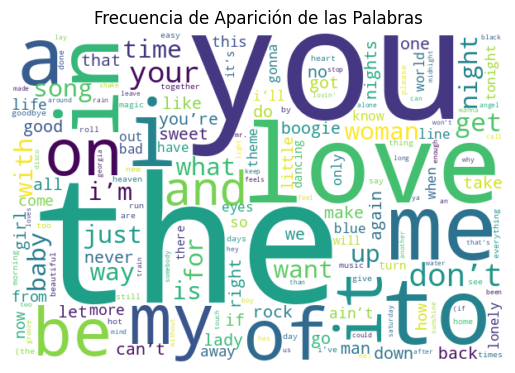

In [18]:
track_dataset["Track"] = track_dataset["Track"].str.lower()

# A partir de la aparición de las palabras medimos su frecuencia y realizamos un gráfico.
series = track_dataset["Track"].str.split().explode().value_counts().to_dict()

wordcloud = wd(
        #font_path=config.plot.font_path
        background_color="white",
        random_state=123,
        width=300,
        height=200,
        scale=2,
).generate_from_frequencies(series)


plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Frecuencia de Aparición de las Palabras")
plt.show()


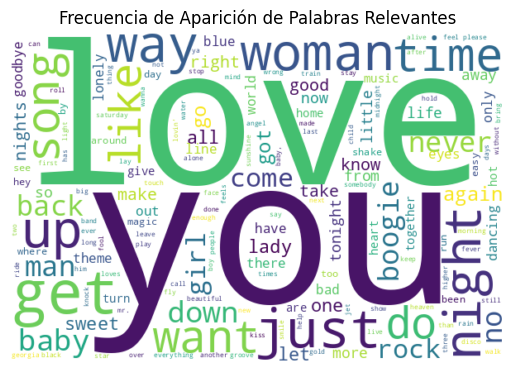

In [19]:
track_dataset["Track_Transformed"] = track_dataset["Track"].str.replace(r'[()]', '', regex=True)

# Lista de palabras a eliminar.
palabras = ["I’ll", "He’s", "She’s", "You’re", "We’re", "the", "of", "to", "don’t", "won’t", "ain’t", "when", "with", "in", "on", "and", "for",
            "this", "that", "i’m", "a", "me", "my", "i", "is", "be", "it", "what", "your", "how", "&", "gonna", "I’ve", "you’ve", "we’ve", "it’s",
            "’s", "no'", "can’t", "’ve", "’d", "’ll", "an", "at", "will", "we", "if", "why", "us", "could", "I’d", "He’d", "She’d", "We’d"]

# unimos las palabras con el operador |.
patron = r"(?<![\w'()])(" + "|".join(palabras) + r")(?![\w'()])"

# Remplazamos todas las coincidencias, sin distinguir entre mayúsculas y minúsculas
track_dataset["Track_Transformed"] = track_dataset["Track_Transformed"].str.replace(patron, "", regex=True, flags=re.IGNORECASE)
track_dataset["Track_Transformed"] = track_dataset["Track_Transformed"].str.replace(patron, "", regex=True, flags=re.IGNORECASE)

# Mostramos la nube de palabras resultante.
series = track_dataset["Track_Transformed"].str.split().explode().value_counts().to_dict()

wordcloud = wd(
        #font_path=config.plot.font_path
        background_color="white",
        random_state=123,
        width=300,
        height=200,
        scale=2,
).generate_from_frequencies(series)


plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Frecuencia de Aparición de Palabras Relevantes")
plt.show()

¿Siempre que aparece "you" aparece junto a una palabra de índole romántico?

In [20]:
palabras_romanticas = ["woman", "girl", "lady", "night", "baby", "tonight", "sweet", "hot", "midnight"]

palabras_romanticas_regex = "|".join(palabras_romanticas)

love_tracks = track_dataset[track_dataset["Track_Transformed"].str.contains("love") & track_dataset["Track_Transformed"].str.contains(palabras_romanticas_regex)]

love_tracks

Track  \
68                         my baby loves lovin’   
333  i’m gonna love you just a little more baby   
511        how sweet it is (to be loved by you)   
597                                  sweet love   
624                baby, i love your way (live)   
645                       love to love you baby   
673          i’d really love to see you tonight   
854                        i love the nightlife   
977  when you’re in love with a beautiful woman   

                            Artist  Duration  Time_Signature  Danceability  \
68                    White Plains       167               4         0.644   
333                    Barry White       431               4         0.606   
511                   James Taylor       216               4         0.764   
597                     Commodores       149               4         0.729   
624                 Peter Frampton       281               4         0.518   
645                   Donna Summer      1008               4         0.622   
673  England Dan & John Ford Coley       159               4         0.620   
854                 Alicia Bridges       187               4         0.693   
977                       Dr. Hook       174               4         0.665   

     Energy  Key  Loudness  Mode  Speechiness  Acousticness  Instrumentalness  \
68    0.651   10   -10.871     1       0.0294        0.3610          0.000000   
333   0.486    7   -13.553     0       0.0411        0.0111          0.001440   
511   0.628    0   -10.961     1       0.0480        0.3360          0.000000   
597   0.571    6    -7.060     1       0.0285        0.4780          0.000000   
624   0.786    7    -5.739     1       0.0357        0.4480          0.000025   
645   0.425   10   -16.256     1       0.0520        0.2920          0.000057   
673   0.556    5   -12.044     1       0.0336        0.1840          0.000000   
854   0.708    0    -7.816     1       0.0310        0.3090          0.003050   
977   0.663    8   -11.367     1       0.0386        0.4850          0.006820   

     Liveness  Valence    Tempo  Popularity  Year  Track_Length  \
68     0.1920    0.871  125.844          36  1970             4   
333    0.0757    0.810   87.568          56  1973             9   
511    0.0977    0.823  109.008          64  1975             9   
597    0.4020    0.833   91.981          69  1976             2   
624    0.7000    0.463   72.269          58  1976             6   
645    0.0498    0.417   96.168          50  1976             5   
673    0.3010    0.591  119.170          19  1976             7   
854    0.0857    0.949  125.315          48  1978             4   
977    0.1570    0.792  110.656           7  1979             8   

                     Track_Transformed  
68                   baby loves lovin’  
333    love you just  little more baby  
511             sweet     loved by you  
597                         sweet love  
624              baby,  love  way live  
645                love  love you baby  
673       really love  see you tonight  
854                    love  nightlife  
977             love   beautiful woman

Repetición frecuente de palabras de índole romántico.

¿Están todos los títulos de las canciones en inglés? Para ello, utilizaremos la librería más precisa para reconocimiento de lenguage: lingua.
(También se probaron otras librería, como langdetect y spacy, pero su precisión es relativamente menor).

In [21]:
languages = [Language.ENGLISH, Language.FRENCH, Language.GERMAN, Language.SPANISH]
detector = LanguageDetectorBuilder.from_languages(*languages).build()

track_dataset["Track_Language"] = [
    detector.detect_language_of(x).name for x in track_dataset["Track"]
]

track_dataset

Track              Artist  Duration  \
0                                           abc       The Jackson 5       162   
1                                     let it be         The Beatles       243   
2                               i want you back       The Jackson 5       176   
3                                       cecilia   Simon & Garfunkel       174   
4                             spirit in the sky    Norman Greenbaum       242   
..                                          ...                 ...       ...   
975                    he’s the greatest dancer       Sister Sledge       375   
976                          don’t cry out loud  Melissa Manchester       135   
977  when you’re in love with a beautiful woman            Dr. Hook       174   
978              i’ll never love this way again      Dionne Warwick       178   
979                          dim all the nights        Donna Summer       248   

     Time_Signature  Danceability  Energy  Key  Loudness  Mode  Speechiness  \
0                 4         0.682   0.926    3    -2.515     0       0.0607   
1                 4         0.443   0.403    0    -8.339     1       0.0322   
2                 4         0.469   0.538    8   -13.559     1       0.0575   
3                 4         0.755   0.876    0    -8.867     1       0.0362   
4                 4         0.609   0.617    9    -7.091     1       0.0307   
..              ...           ...     ...  ...       ...   ...          ...   
975               4         0.700   0.815    7    -9.711     0       0.0440   
976               4         0.298   0.252    0    -8.950     1       0.0339   
977               4         0.665   0.663    8   -11.367     1       0.0386   
978               4         0.452   0.434    8    -8.870     1       0.0399   
979               4         0.758   0.540    7   -10.911     1       0.0385   

     Acousticness  Instrumentalness  Liveness  Valence    Tempo  Popularity  \
0         0.04040          0.000000    0.1900    0.860  105.969          81   
1         0.63100          0.000000    0.1110    0.410  143.462          78   
2         0.30500          0.000114    0.3700    0.885  196.606          78   
3         0.35700          0.000005    0.2200    0.954  102.762          76   
4         0.09940          0.004040    0.1180    0.543  128.903          75   
..            ...               ...       ...      ...      ...         ...   
975       0.00115          0.001240    0.0901    0.837  113.245          14   
976       0.90100          0.000009    0.1270    0.193   90.955           9   
977       0.48500          0.006820    0.1570    0.792  110.656           7   
978       0.79200          0.013900    0.1650    0.247  137.702           5   
979       0.05510          0.000000    0.0343    0.661  121.581           0   

     Year  Track_Length          Track_Transformed Track_Language  
0    1970             1                        abc        ENGLISH  
1    1970             3                      let           GERMAN  
2    1970             4              want you back        ENGLISH  
3    1970             1                    cecilia        SPANISH  
4    1970             4               spirit   sky        ENGLISH  
..    ...           ...                        ...            ...  
975  1979             4            greatest dancer        ENGLISH  
976  1979             4               cry out loud        ENGLISH  
977  1979             8     love   beautiful woman        ENGLISH  
978  1979             6      never love  way again        ENGLISH  
979  1979             4            dim all  nights        ENGLISH  

[944 rows x 20 columns]

Filtramos aquellas filas que no sean inglés y las pasamos a un archivo csv para su análisis manual (¡no queda otra! :c):

In [22]:
track_dataset[track_dataset["Track_Language"] != "ENGLISH"].to_csv("Datasets/Generados/NotEnglishTracks.csv")

Luego del análisis manual, la única canción que no es cantada en inglés es:

In [23]:
track_dataset[track_dataset["Track"] == "eres tú"]

Track     Artist  Duration  Time_Signature  Danceability  Energy  Key  \
395  eres tú  Mocedades       242               4         0.639   0.399    5   

     Loudness  Mode  Speechiness  Acousticness  Instrumentalness  Liveness  \
395   -11.815     1       0.0248         0.484           0.00056     0.133   

     Valence   Tempo  Popularity  Year  Track_Length Track_Transformed  \
395    0.306  79.113          72  1974             2           eres tú   

    Track_Language  
395        SPANISH

Extraño, ¿no? Pero bueno. Pasando a otro tema, en las palabras más comunes en los tracks se hallaban ain't y gonna. ¿Serán todas las canciones en inglés estadounidenses? Para ello, debemos analizar la nacionalidad de los artistas, lo cual es tema de la próxima sección.

In [24]:
fig = px.histogram(track_dataset, x="Track_Length", width=800, height=400, nbins=14)

fig.update_layout(bargap=0.2, xaxis_title_text="Cantidad de palabras")

fig.show()

#### Conclusiones.

- La mayoría de los tracks tienen hasta un máximo de 5 palabras.
- La cantidad de letras, en general, no supera las 20.
- Hay una presencia elevada de palabras de índole romántico en los títulos de los tracks.
- El nombre de todos los tracks está en inglés, exceptuando una canción: "Eres tú" de Mocedades, la cual fue muy popular en el público anglosajón.


### Artist.

Se observaron canciones con más de un artista:

In [25]:
artist_dataset = track_dataset.copy()

featurings = track_dataset[track_dataset["Artist"].str.contains("/")]

featurings

Track                          Artist  Duration  Time_Signature  \
95  imagine  John Lennon / Plastic Ono Band       187               4   

    Danceability  Energy  Key  Loudness  Mode  Speechiness  Acousticness  \
95         0.547   0.257    0   -12.358     1       0.0252         0.907   

    Instrumentalness  Liveness  Valence   Tempo  Popularity  Year  \
95             0.183    0.0935    0.169  75.752          75  1971   

    Track_Length Track_Transformed Track_Language  
95             1           imagine         FRENCH

Retomando lo comenzado en la sección, correspondiente a la columna "Track", se desea saber cuál es la proporción de cantantes de cada nacionalidad en el dataset. Para ello, se utilizó la API de MusicBrainzngs para obtener la nacionalidad de cada artista.

In [26]:
# Guardamos lo realizado hasta el momento en un nuevo dataset.
track_dataset.to_csv("Datasets/Generados/Track_Dataset.csv")

# En otro archivo de Python, MusicBrainzngs.py, realizamos la obtención de la nacionalidad de cada artista (lo separamos porque toma más de 10 minutos).

Las búsqueda ofrecidas por la API no son exactas y a veces no se halla el artista con el nombre tal y como aparece en el dataset (a veces, a causa de que el artista es la colaboración entre varios artistas). Por lo tanto, se tuvo que hacer el chequeo manual, uno por uno, de cada uno de los artistas no coincidentes con el nombre proporcionado por la API y separarse las colaboraciones en dos artistas distintos:

In [27]:
artist_dataset = pd.read_csv("Datasets/Generados/ArtistsNationalities.csv")

differs = artist_dataset[artist_dataset["Artista"] != artist_dataset["Nombre"]].copy()

differs.to_csv("Datasets/Generados/ArtistDiffers.csv")

Además, tuvieron que identificarse y eliminarse repetidos:

In [28]:
import pandas as pd

# Cargar el archivo CSV
delete = pd.read_csv("./Datasets/Generados/CheckedArtists.csv")

# Eliminar los duplicados basados en la columna 'Artist', manteniendo solo la primera aparición
delete_unique = delete.drop_duplicates(subset="Artist", keep="first")

# Guardar el nuevo DataFrame sin duplicados en un archivo CSV
delete_unique.to_csv("UniqueArtists.csv", index=False)

# Contar cuántas veces aparece cada artista
artist_counts = delete_unique["Artist"].value_counts()

# Filtrar aquellos artistas que se repiten más de una vez
repeated_artists = artist_counts[artist_counts > 1].index

# Filtrar el DataFrame original para mostrar solo los artistas repetidos
repeated_rows = delete[delete["Artist"].isin(repeated_artists)]

repeated_rows

Empty DataFrame
Columns: [Artist, Nationality]
Index: []

El resultado obtenido es el siguiente:

In [29]:
artist_dataset = pd.read_csv("UniqueArtists.csv")

artist_dataset

Artist Nationality
0           The Jackson 5          US
1             The Beatles          GB
2       Simon & Garfunkel          US
3        Norman Greenbaum          US
4       Edison Lighthouse          GB
..                    ...         ...
512           Frank Mills          CA
513        Bonnie Pointer          US
514  McFadden & Whitehead          US
515      Rickie Lee Jones          US
516                    GQ          US

[517 rows x 2 columns]

Durante este proceso, se identificaron artistas que son el mismo, pero que fueron cargados con distintos nombres. Estos fueron registrados en el siguiente csv:

In [30]:
alternative_names = pd.read_csv("./Datasets/Generados/Alternative_Names.csv")

alternative_names

Artista  \
0                               The Jackson 5   
1                               The Jackson 5   
2                              The Carpenters   
3                                        Dawn   
4                      The Brotherhood of Man   
5                               The Four Tops   
6                             Alive N Kickin’   
7                                     Tee Set   
8                                        Dawn   
9                                 Grass Roots   
10                  Paul Revere & the Raiders   
11                           Delaney & Bonnie   
12                                   Dr. Hook   
13  Commander Cody and His Lost Planet Airmen   
14                        The Main Ingredient   
15                              Art Garfunkel   
16                      Bobby ‘Boris’ Pickett   
17                        Loggins and Messina   
18                           Seals and Crofts   
19                       Charlie Daniels Band   
20                        The DeFranco Family   
21                                    Deodato   
22                            The First Class   
23                           Plastic Ono Band   
24                     Donny and Marie Osmond   
25                                 Grand Funk   
26                  Ozark Mountain Daredevils   
27                               Four Seasons   
28                                     Bazuka   
29                               Hall & Oates   
30                           Blue Oyster Cult   
31                     Andrea True Connection   
32                               C. W. McCall   
33             Harold Melvin & the Blue Notes   
34      Wing and a Prayer Fife and Drum Corps   
35                          Pratt and McClain   
36                              Walter Murphy   
37         Bob Seger & The Silver Bullet Band   
38                          Lord David Dundas   
39                     KC & the Sunshine Band   

                               Alternative_Name  
0                                  The Jacksons  
1                                     Jackson 5  
2                                    Carpenters  
3                           Tony Orlando & Dawn  
4                            Brotherhood of Man  
5                                     Four Tops  
6                              Alive 'n Kickin'  
7                                       Tee-Set  
8                         Tony Orlando and Dawn  
9                               The Grass Roots  
10                  Paul Revere and the Raiders  
11                   Delaney & Bonnie & Friends  
12                 Dr. Hook & The Medicine Show  
13      Commander Cody & His Lost Planet Airmen  
14                              Main Ingredient  
15                                    Garfunkel  
16                        Bobby “Boris” Pickett  
17                            Loggins & Messina  
18                               Seals & Crofts  
19                     The Charlie Daniels Band  
20  The DeFranco Family featuring Tony DeFranco  
21                                Eumir Deodato  
22                                  First Class  
23                         The Plastic Ono Band  
24                         Donny & Marie Osmond  
25                          Grand Funk Railroad  
26                The Ozark Mountain Daredevils  
27                             The Four Seasons  
28                        Tony Camillo’s Bazuka  
29                      Daryl Hall & John Oates  
30                             Blue Öyster Cult  
31                   The Andrea True Connection  
32                                  C.W. McCall  
33                Harold Melvin & The Blue Note  
34            Wing & A Prayer Fife & Drum Corps  
35                              Pratt & McClain  
36           Walter Murphy & The Big Apple Band  
37           Bob Seger & the Silver Bullet Band  
38                                 David Dundas  
39                     KC an

Finalmente, con los artistas en orden, se revisó la procedencia de estos. De esta forma, se corroboró que la mayoría son estadounidenses:

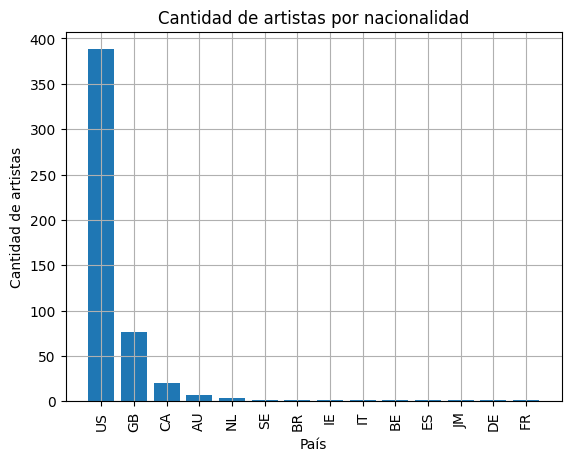

In [31]:
# Contar cuántas veces se repite cada nacionalidad
nacionalidades = artist_dataset["Nationality"].value_counts()

# Crear el gráfico de barras con las frecuencias de cada nacionalidad
plt.bar(nacionalidades.index, nacionalidades.values)

# Agregar etiquetas a los ejes
plt.xlabel("País")
plt.ylabel("Cantidad de artistas")

# Agregar un título al gráfico
plt.title("Cantidad de artistas por nacionalidad")

# Rotar las etiquetas del eje x para mejor visualización
plt.xticks(rotation=90)

plt.grid(True)

# Mostrar el gráfico
plt.show()


In [32]:

fig = px.histogram(artist_dataset, x="Nationality", width=800, height=400,
                    category_orders={"Nationality" : nacionalidades.index.to_list()})

fig.update_layout(
    xaxis_showgrid=True,
    yaxis_showgrid=True
)

fig.show()

#### Conclusiones.

- La mayoría de los artistas del dataset son estadounidenses.

### Duration

In [33]:
duration_dataset = clean_dataset.copy()

fig = px.scatter(duration_dataset, x="Duration", title='Scatter de Duration', width=800, height=400)

fig.show()

fig = px.scatter(duration_dataset, y="Duration", title='Scatter de Duration', width=800, height=400)

fig.show()

Para la variable *Duration*, se observó un *outlier*: la canción "Tubular Belbs", cuya duración es de 26:01:00 según el dataset y, de 48 minutos según Internet. El registro se consideró un dato mal cargado y se eliminó:

In [34]:
duracion_maxima = clean_dataset["Duration"].max()

duration_dataset = clean_dataset[clean_dataset["Duration"] != duracion_maxima]

duration_dataset.sort_values("Duration", ascending=False)

Track                 Artist  Duration  \
645           Love To Love You Baby           Donna Summer      1008   
920                        Promises           Eric Clapton       646   
348                     Pillow Talk                 Sylvia       645   
846                   Feels So Good         Chuck Mangione       582   
381  Also Sprach Zarathustra (2001)                Deodato       539   
..                              ...                    ...       ...   
865                What’s Your Name         Lynyrd Skynyrd        87   
149             Bring The Boys Home            Freda Payne        87   
227                    Day Dreaming        Aretha Franklin        80   
571                        Dynomite  Tony Camillo’s Bazuka        77   
643                      Happy Days      Pratt and McClain        76   

     Time_Signature  Danceability  Energy  Key  Loudness  Mode  Speechiness  \
645               4         0.622  0.4250   10   -16.256     1       0.0520   
920               4         0.362  0.4210   10   -11.699     1       0.0372   
348               4         0.919  0.3620    8    -8.331     1       0.3680   
846               4         0.576  0.6030    5    -9.603     1       0.0329   
381               4         0.425  0.6690    5    -9.481     1       0.0316   
..              ...           ...     ...  ...       ...   ...          ...   
865               4         0.889  0.4500   11    -6.852     0       0.0357   
149               4         0.330  0.2830    0   -15.971     1       0.0610   
227               4         0.213  0.0751    7   -27.103     1       0.0433   
571               4         0.685  0.4030    0   -10.887     1       0.3050   
643               4         0.212  0.5540    0    -8.352     1       0.0473   

     Acousticness  Instrumentalness  Liveness  Valence    Tempo  Popularity  \
645       0.29200          0.000057    0.0498   0.4170   96.168          50   
920       0.28100          0.000062    0.0943   0.2330  114.669          65   
348       0.57600          0.000000    0.1340   0.4160  104.987          49   
846       0.45500          0.053700    0.0406   0.5240  103.658          51   
381       0.08440          0.916000    0.9000   0.3240  114.751          15   
..            ...               ...       ...      ...      ...         ...   
865       0.33400          0.000000    0.3490   0.7830  112.023          36   
149       0.57500          0.094700    0.2350   0.2870  157.963          49   
227       0.97100          0.441000    0.1130   0.0346   85.295          58   
571       0.00483          0.000000    0.1740   0.5460   93.826          23   
643       0.00325          0.859000    0.3240   0.6250  137.787          51   

     Year  
645  1976  
920  1979  
348  1973  
846  1978  
381  1973  
..    ...  
865  1978  
149  1971  
227  1972  
571  1975  
643  1976  

[943 rows x 17 columns]

Otras canciones con una duración relativamente elevada fueron detectadas: 14 y 17 minutos, respectivamente. No obstante, quedaron descartadas como *outliers*.

In [35]:
fig = px.histogram(duration_dataset, x="Duration", title='Scatter de Duration', width=800, height=400)

fig.show()

In [36]:
# Rango Intercuartiles (IRQ): diferencia entre los percentiles 25 y 75.
# Para distribuciones no normales.
qs = duration_dataset["Duration"].quantile([0.25, 0.5, 0.75]).values
q1 = qs[0]
q2 = qs[1]
q3 = qs[2]

# Dibujo la distribución con los límites superpuestos.
fig = px.histogram(duration_dataset, x="Duration", width=800, height=400, nbins=150)
fig.add_vline(x=q2, line_color='black', annotation_text=r"$\\mu$") #, annotation_text='$\mu$')
fig.add_vline(x=(q1 - 1.5 * (q3 - q1)), line_color='red')#, annotation_text='$\mu-3\sigma$')
fig.add_vline(x=(q3 + 1.5 * (q3 - q1)), line_color='red')#, annotation='$\mu+3\sigma$')

In [37]:
media_loudness = duration_dataset["Duration"].mean()
std_loudness = duration_dataset["Duration"].std()
limite_inferior = media_loudness - 3 * std_loudness
limite_superior = media_loudness + 3 * std_loudness

# Dibujo la distribución con los límites superpuestos.
fig = px.histogram(duration_dataset, x="Duration", width=800, height=400)
fig.add_vline(x=media_loudness, line_color='black', annotation_text=r"$\\mu$") #, annotation_text='$\mu$')
fig.add_vline(x=limite_inferior, line_color='red')#, annotation_text='$\mu-3\sigma$')
fig.add_vline(x=limite_superior, line_color='red')#, annotation='$\mu+3\sigma$')

fig.show()

#### Conclusiones.

- La mayoría de las canciones tiene una duración de entre 80 y 360 segundos.
- Hay canciones que quedan muy fuera de este rango, pero no son outliers.

### Time_Signature

Se realizó un histograma de la variable y se observaron una muy pequeña cantidad de registros con Time_signature = 1 y Time_signature = 5:

In [38]:
fig = px.histogram(clean_dataset, x="Time_Signature", width=800, height=400)

fig.show()

Se realizó, entonces, un análisis de dichos registros:

In [39]:
ts1and5_songs = clean_dataset[(clean_dataset["Time_Signature"] == 1) | (clean_dataset["Time_Signature"] == 5)]

ts1and5_songs

Track                    Artist  Duration  \
466                   Love’s Theme  Love Unlimited Orchestra       202   
483                      I’m Sorry               John Denver       167   
506  Lucy In The Sky With Diamonds                Elton John       208   
563         Love Won’t Let Me Wait              Major Harris       227   
871                  My Angel Baby                 Toby Beau       207   

     Time_Signature  Danceability  Energy  Key  Loudness  Mode  Speechiness  \
466               1         0.262   0.136    9   -19.819     0       0.0284   
483               5         0.445   0.455    7    -6.405     1       0.0575   
506               1         0.311   0.325    2    -9.042     1       0.0283   
563               1         0.597   0.291   11   -13.837     0       0.0352   
871               5         0.228   0.116    9   -23.560     0       0.0435   

     Acousticness  Instrumentalness  Liveness  Valence    Tempo  Popularity  \
466        0.9500          0.909000     0.169   0.1130   75.454          37   
483        0.7310          0.000001     0.124   0.1510  109.885          81   
506        0.0469          0.000000     0.139   0.6680   65.090          65   
563        0.9170          0.000030     0.122   0.2260  115.666          37   
871        0.9650          0.944000     0.152   0.0385   82.294          26   

     Year  
466  1974  
483  1975  
506  1975  
563  1975  
871  1978

Al investigar, resulta que canciones con un compas de 1 son extremadamente raras. Por otro lado, canciones con un compás de 5 sí pueden existir. Sea cual sea el caso, los detalles de las canciones hallados en Internet no coinciden con los mostrados, en particular, la cantidad de pulsaciones por compás. El número de canciones con estas características es bajo, por lo que, considerando que su eliminación no afecta al dataset, se optó por eliminarlas.

In [40]:
clean_dataset = clean_dataset[(clean_dataset["Time_Signature"] != 1) & (clean_dataset["Time_Signature"] != 5)]

clean_dataset

Track              Artist  Duration  \
0                                           Abc       The Jackson 5       162   
1                                     Let It Be         The Beatles       243   
2                               I Want You Back       The Jackson 5       176   
3                                       Cecilia   Simon & Garfunkel       174   
4                             Spirit In The Sky    Norman Greenbaum       242   
..                                          ...                 ...       ...   
975                    He’s The Greatest Dancer       Sister Sledge       375   
976                          Don’t Cry Out Loud  Melissa Manchester       135   
977  When You’re In Love With A Beautiful Woman            Dr. Hook       174   
978              I’ll Never Love This Way Again      Dionne Warwick       178   
979                          Dim All The Nights        Donna Summer       248   

     Time_Signature  Danceability  Energy  Key  Loudness  Mode  Speechiness  \
0                 4         0.682   0.926    3    -2.515     0       0.0607   
1                 4         0.443   0.403    0    -8.339     1       0.0322   
2                 4         0.469   0.538    8   -13.559     1       0.0575   
3                 4         0.755   0.876    0    -8.867     1       0.0362   
4                 4         0.609   0.617    9    -7.091     1       0.0307   
..              ...           ...     ...  ...       ...   ...          ...   
975               4         0.700   0.815    7    -9.711     0       0.0440   
976               4         0.298   0.252    0    -8.950     1       0.0339   
977               4         0.665   0.663    8   -11.367     1       0.0386   
978               4         0.452   0.434    8    -8.870     1       0.0399   
979               4         0.758   0.540    7   -10.911     1       0.0385   

     Acousticness  Instrumentalness  Liveness  Valence    Tempo  Popularity  \
0         0.04040          0.000000    0.1900    0.860  105.969          81   
1         0.63100          0.000000    0.1110    0.410  143.462          78   
2         0.30500          0.000114    0.3700    0.885  196.606          78   
3         0.35700          0.000005    0.2200    0.954  102.762          76   
4         0.09940          0.004040    0.1180    0.543  128.903          75   
..            ...               ...       ...      ...      ...         ...   
975       0.00115          0.001240    0.0901    0.837  113.245          14   
976       0.90100          0.000009    0.1270    0.193   90.955           9   
977       0.48500          0.006820    0.1570    0.792  110.656           7   
978       0.79200          0.013900    0.1650    0.247  137.702           5   
979       0.05510          0.000000    0.0343    0.661  121.581           0   

     Year  
0    1970  
1    1970  
2    1970  
3    1970  
4    1970  
..    ...  
975  1979  
976  1979  
977  1979  
978  1979  
979  1979  

[939 rows x 17 columns]

#### Conclusiones.

- La mayoría de las canciones tiene cuatro pulsaciones por compás, lo cual es lo más común hoy en día.
- Una pulsación por compás es extremadamente raro.

### Danceability

Para detectar peculiaridades en la variable, se realizó gráficos de la misma:

In [41]:
fig = px.box(clean_dataset, x="Danceability", title='Boxplot de Danceability', width=800, height=400, notched=True)

fig.show()

fig = px.scatter(clean_dataset, x="Danceability", width=800, height=400)

fig.show()

fig = px.histogram(clean_dataset, x="Danceability", title='Histograma de la Variable Danceabilidad',
                    width=800, height=400, nbins=150)

fig.update_layout(
    xaxis_title_text='Danceability',
    yaxis_title_text='Cantidad de Registros',
    bargap=0.2
)

fig.show()

Se detectaron siete posibles outliers. Para determinar si efectivamente lo son o no, se analizó cada uno de ellos. Posterior al análisis, se concluyó que no son outliers y que, efectivamente, se tratan de canciones tristes y poco bailables. Por consiguiente, se conservaron en el dataset.

In [42]:
clean_dataset[clean_dataset["Danceability"] < 0.2]

Track                           Artist  Duration  \
137           Ain’t No Sunshine                     Bill Withers       192   
215       Nights In White Satin                  The Moody Blues       269   
436                  The Streak                      Ray Stevens       244   
921               Ooo Baby Baby                   Linda Ronstadt       164   
947  You Don’t Bring Me Flowers  Neil Diamond & Barbra Streisand       195   

     Time_Signature  Danceability  Energy  Key  Loudness  Mode  Speechiness  \
137               4        0.0942   0.995    2   -27.090     0       0.0514   
215               4        0.1950   0.483    4    -4.991     0       0.0300   
436               4        0.1640   0.949   11    -2.588     0       0.0581   
921               3        0.1850   0.344    7    -9.378     1       0.0295   
947               4        0.1600   0.123    0   -18.111     1       0.0400   

     Acousticness  Instrumentalness  Liveness  Valence    Tempo  Popularity  \
137       0.31500          0.970000    0.9570  0.00001   83.334          53   
215       0.46500          0.497000    0.0686  0.17300   84.710          64   
436       0.00028          0.013400    0.3740  0.25700   99.754          51   
921       0.81000          0.000000    0.1660  0.42400  178.635          64   
947       0.87800          0.000022    0.1570  0.23900   67.006          55   

     Year  
137  1971  
215  1972  
436  1974  
921  1979  
947  1979

### Energy

Se realizaron varios gráficos para buscar peculiaridades en la variable:

In [43]:
# Boxplot
boxplot = px.box(clean_dataset, x="Energy", title='Boxplot de Energy', width=800, height=400, notched=True)

# Histograma
histogram = px.histogram(clean_dataset, x="Energy", title='Histograma de la Variable Energy',
                            width=800, height=400, nbins=150)

histogram.update_layout(
    xaxis_title_text='Energy',
    yaxis_title_text='Cantidad de Registros',
    bargap=0.2
)

# Scatter
scatter = px.scatter(clean_dataset, x="Energy", width=800, height=400)

# Crear un subplot utilizando las figuras completas
fig = make_subplots(rows=2, cols=2, 
                    subplot_titles=("Boxplot", "Histograma", "Scatter"),
                    specs=[[{"colspan": 2}, None],   # El boxplot ocupa ambas columnas
                            [{}, {}]])               # Segunda fila: histogram y scatter

# Añadir las figuras completas al subplot
fig.add_traces(boxplot.data, rows=1, cols=1)
fig.add_traces(histogram.data, rows=2, cols=1)
fig.add_traces(scatter.data, rows=2, cols=2)

# Actualizar títulos de los ejes
fig.update_xaxes(title_text="Energy", row=1, col=1)  # Eje X del boxplot
fig.update_xaxes(title_text="Energy", row=2, col=1)  # Eje X del histograma
fig.update_xaxes(title_text="Energy", row=2, col=2)  # Eje X del scatter

fig.update_yaxes(title_text="Cantidad de Registros", row=2, col=1)  # Eje Y del 
fig.update_yaxes(title_text="Cantidad de Registros", row=2, col=2)  # Eje Y del histograma

# Actualizar el layout (y restaurar el bargap)
fig.update_layout(
    height=800, 
    width=1000, 
    title_text="Gráficos Combinados",
    bargap=0.2  # Reestablecer el bargap
)

# Mostrar la figura combinada
fig.show()


La distribución pareciera ser bastante normal, con un leve sesgo a la izquierda. Esto podemos comprobarlo calculando la kurtosis, la cual da de -0.5, indicándonos que hay muchos valores altos y algunos valores extremos bajos.

In [44]:
# Calcular la kurtosis
kurt = clean_dataset["Energy"].kurtosis()

kurt


np.float64(-0.5509669068970879)

A su vez, la distribución pareciera ser bastante simétrica. A esto es posible comprobarlo calculando el coeficiente de asimetría, el cual da como resultado -0.14, indicándonos un sesgo a izquierda, más valores altoss que bajos y posibles outliers a la izquierda.

In [45]:
# Calcular la kurtosis
skew = clean_dataset["Energy"].skew()

skew


np.float64(-0.13396601431365412)

#### Conclusiones.

- No se hallaron mayores peculiaridades en la variable.
- Con ayuda del histograma y el boxplot, se descubrió una distribución bastante normal y simétrica.

### Key


Acorde a la teoría musical, la equivalencia entre las keys y el número colocado es:


In [46]:
equivalencia_notas = {0: "C", 1: "C#", 2: "D", 3: "D#", 4: "E", 5: "F", 6: "F#", 7: "G", 8: "G#", 9: "A", 10: "A#", 11: "B"}

Siendo las notas más frecuentes halladas en el dataset, ordenadas de mayor frecuencia a menor:

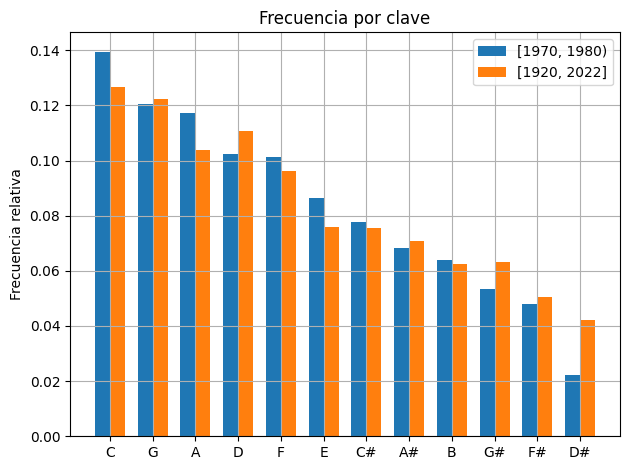

In [47]:
# Obtenemos las notas más repetidas en nuestro dataset.

key_dataset = clean_dataset.copy()

notas_original = key_dataset["Key"].value_counts()

notas_original = notas_original.astype("float64")

notas_original = notas_original.rename(index=equivalencia_notas)

total_original = key_dataset.shape[0]

# Obtenemos las notas más repetidas en un dataset más amplio.

key_dataset_ampliado = spotify_dataset.copy()

notas_ampliado = key_dataset_ampliado["key"].value_counts()

notas_ampliado = notas_ampliado.astype("float64")

notas_ampliado = notas_ampliado.rename(index=equivalencia_notas)

total_ampliado = key_dataset_ampliado.shape[0]

# Combinamos las notas más repetidas en un dataset para compararlas.
combined = pd.DataFrame({'Original': notas_original, 'Ampliado': notas_ampliado}).fillna(0)

# Normalización de las frecuencias relativas
combined['Original'] = combined['Original'] / total_original
combined['Ampliado'] = combined['Ampliado'] / total_ampliado

# Ordenamos el ddataframe por la columna 'Origianl'.
combined = combined.sort_values(by='Original', ascending=False)

x = np.arange(len(combined))  # Posiciones de las etiquetas

width = 0.35  # Ancho de las barras

# Creamos las barras.
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, combined['Original'], width, label='[1970, 1980)')
rects2 = ax.bar(x + width/2, combined['Ampliado'], width, label='[1920, 2022]')

# Añadimos etiquetas y un título.
ax.set_ylabel('Frecuencia relativa')
ax.set_title('Frecuencia por clave')
ax.set_xticks(x, combined.index)
ax.legend()

# Mejoramos el diseño.
fig.tight_layout()
plt.grid()

# Mostramos el gráfico.
plt.show()

¿Cómo hacer énfasis en la diferencia?

#### Conclusiones.

- La frecuencia de aparición de las notas coincide con las estadísticas que podemos hallar en algunas páginas: https://www.hooktheory.com/cheat-sheet/key-popularity.

### Loudness

In [48]:
loudness_dataset = clean_dataset.copy()

fig = px.box(loudness_dataset, x="Loudness", width=800, height=400)

fig.show()

In [49]:
loudness_dataset[loudness_dataset["Loudness"] < -20]

Track              Artist  Duration  \
137                    Ain’t No Sunshine        Bill Withers       192   
226  The First Time Ever I Saw Your Face       Roberta Flack       260   
227                         Day Dreaming     Aretha Franklin        80   
245                         Garden Party        Ricky Nelson       229   
316                                Clair  Gilbert O’Sullivan       268   
666                   That’ll Be The Day      Linda Ronstadt       158   
731                           I’m In You      Peter Frampton        96   
820                        Jack And Jill              Raydio        99   
834                   Three Times A Lady          Commodores       217   
886                                 Rise         Herb Alpert       161   

     Time_Signature  Danceability   Energy  Key  Loudness  Mode  Speechiness  \
137               4        0.0942  0.99500    2   -27.090     0       0.0514   
226               4        0.3110  0.02640    0   -21.644     1       0.0370   
227               4        0.2130  0.07510    7   -27.103     1       0.0433   
245               4        0.7740  0.24700    2   -21.657     1       0.0779   
316               4        0.3350  0.00532    1   -31.646     1       0.0376   
666               4        0.5600  0.14000    1   -20.439     1       0.0325   
731               4        0.4850  0.00880    5   -30.000     1       0.0507   
820               4        0.5190  0.02650    7   -26.128     1       0.0554   
834               3        0.3900  0.08030    8   -20.518     1       0.0306   
886               3        0.4830  0.12900    5   -20.149     0       0.0349   

     Acousticness  Instrumentalness  Liveness  Valence    Tempo  Popularity  \
137         0.315          0.970000    0.9570  0.00001   83.334          53   
226         0.731          0.002050    0.1560  0.13900  120.653          59   
227         0.971          0.441000    0.1130  0.03460   85.295          58   
245         0.786          0.018600    0.1160  0.80300  143.955          51   
316         0.994          0.912000    0.0621  0.03970   65.832          65   
666         0.862          0.968000    0.0927  0.05890   74.483          32   
731         0.996          0.940000    0.1140  0.18900   85.778          58   
820         0.992          0.940000    0.0986  0.52300   98.470          63   
834         0.874          0.000639    0.1270  0.18400  150.503          55   
886         0.947          0.145000    0.1060  0.20300  137.350          81   

     Year  
137  1971  
226  1972  
227  1972  
245  1972  
316  1973  
666  1976  
731  1977  
820  1978  
834  1978  
886  1979

Valores lógicos y que no es posible comprobar mediante la escucha, ya que se requiere del track original a partir del cual fue extraido el valor.

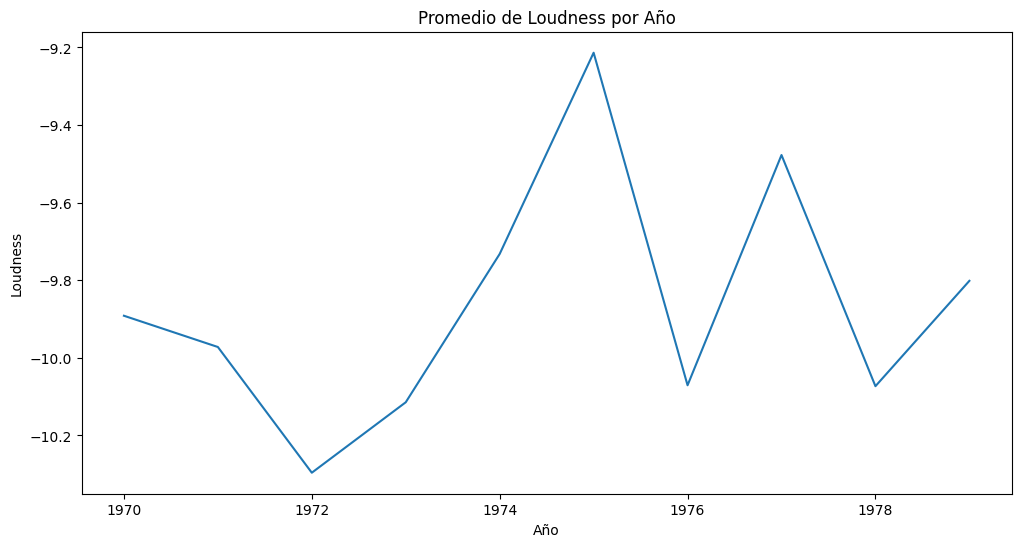

In [50]:
# Calcular la media de Speechiness por año
loudness_by_year = loudness_dataset.groupby('Year')['Loudness'].mean().reset_index()

# Visualizar la tendencia de Speechiness a lo largo del tiempo
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Loudness', data=loudness_by_year)
plt.title('Promedio de Loudness por Año')
plt.ylabel('Loudness')
plt.xlabel('Año')
plt.show()

Comprobamos

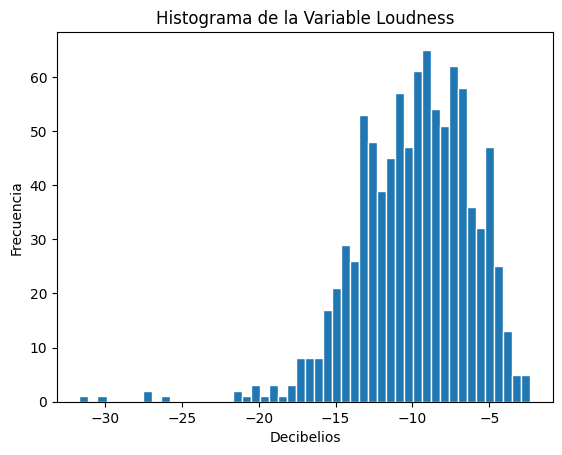

In [51]:
# Definir el número de bins
bins = 50
# bins = 10
# bins = 20

# Crear el histograma con bordes entre los bins
plt.hist(loudness_dataset["Loudness"], bins=bins, edgecolor='white')

# Agregar etiquetas a los ejes
plt.xlabel("Decibelios")
plt.ylabel("Frecuencia")

# Agregar un título al gráfico
plt.title("Histograma de la Variable Loudness")

# Mostrar el gráfico
plt.show()


Sesgo a izquierda.


Al tener las canciones un rango alto de posibles decibeles, produce que sea necesario estar cambiando el volumen constantemente. Por eso, ahora se normalizan los valores.

In [52]:
fig = px.scatter(loudness_dataset, x="Loudness", width=800, height=400)

fig.show()

In [53]:
media_loudness = loudness_dataset["Loudness"].mean()
std_loudness = loudness_dataset["Loudness"].std()
limite_inferior = media_loudness - 3 * std_loudness
limite_superior = media_loudness + 3 * std_loudness

# Dibujo la distribución con los límites superpuestos.
fig = px.histogram(loudness_dataset, x="Loudness", width=800, height=400)
fig.update_layout(bargap=0.2)
fig.add_vline(x=media_loudness, line_color='black', annotation_text=r"$\\mu$") #, annotation_text='$\mu$')
fig.add_vline(x=limite_inferior, line_color='red')#, annotation_text='$\mu-3\sigma$')
fig.add_vline(x=limite_superior, line_color='red')#, annotation='$\mu+3\sigma$')

fig.show()

In [54]:
# Rango Intercuartiles (IRQ): diferencia entre los percentiles 25 y 75.
# Para distribuciones no normales.
qs = loudness_dataset["Loudness"].quantile([0.25, 0.5, 0.75]).values
q1 = qs[0]
q2 = qs[1]
q3 = qs[2]

# Dibujo la distribución con los límites superpuestos.
fig = px.histogram(loudness_dataset, x="Loudness", width=800, height=400)
fig.add_vline(x=q2, line_color='black', annotation_text=r"$\\mu$") #, annotation_text='$\mu$')
fig.add_vline(x=q1, line_color='red')#, annotation_text='$\mu-3\sigma$')
fig.add_vline(x=q3, line_color='red')#, annotation='$\mu+3\sigma$')

fig.show()

Los datos a la izquierda de la línea roja marcan el 25 % de los datos. Entre las líneas rojas tenemos un 50 % de los datos, el rango intercuartiles. A la derecha de la segunda línea roja hay un 25 % de los rangos.

Si el dato tiene un valor pur fuera del rango Q_1 - k . IQR o Q_3 + k . IQR podría ser catalogado como outlier. Usualmente, k = 1.5.

In [55]:
fig = px.box(loudness_dataset, x="Loudness", width=800, height=400)

fig.show()

In [56]:
# Rango Intercuartiles (IRQ): diferencia entre los percentiles 25 y 75.
# Para distribuciones no normales.
qs = loudness_dataset["Loudness"].quantile([0.25, 0.5, 0.75]).values
q1 = qs[0]
q2 = qs[1]
q3 = qs[2]

# Dibujo la distribución con los límites superpuestos.
fig = px.histogram(loudness_dataset, x="Loudness", width=800, height=400)
fig.add_vline(x=q2, line_color='black', annotation_text=r"$\\mu$") #, annotation_text='$\mu$')
fig.add_vline(x=(q1 - 1.5 * (q3 - q1)), line_color='red')#, annotation_text='$\mu-3\sigma$')
fig.add_vline(x=(q3 + 1.5 * (q3 - q1)), line_color='red')#, annotation='$\mu+3\sigma$')

fig.show()

### Mode

VERIFICAR SI SE PUEDE HACER UN GRÁFICO DE TORTA.

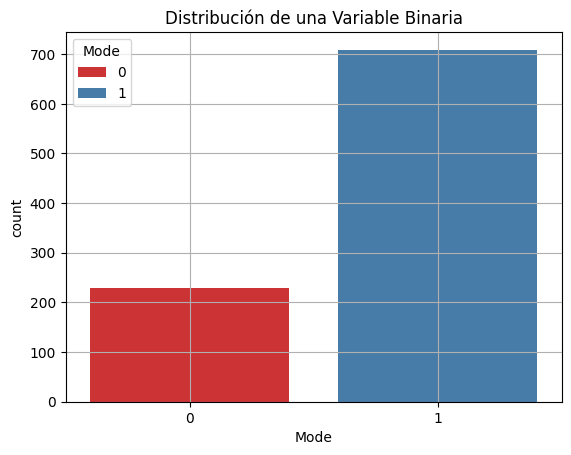

In [57]:
sns.countplot(x='Mode', data=clean_dataset, palette='Set1', hue='Mode')
plt.title('Distribución de una Variable Binaria')
plt.grid(True)
plt.show()

### Speechiness

In [58]:
# Boxplot
boxplot = px.box(clean_dataset, x="Speechiness", title='Boxplot de Speechiness', width=800, height=400, notched=True)

# Histograma
histogram = px.histogram(clean_dataset, x="Speechiness", title='Histograma de la Variable Speechiness',
                         width=800, height=400, nbins=150)

histogram.update_layout(
    xaxis_title_text='Speechiness',
    yaxis_title_text='Cantidad de Registros',
    bargap=0.2
)

# Scatter
scatter = px.scatter(clean_dataset, x="Speechiness", width=800, height=400)

# Crear un subplot utilizando las figuras completas
fig = make_subplots(rows=2, cols=2, 
                    subplot_titles=("Boxplot", "Histograma", "Scatter"),
                    specs=[[{"colspan": 2}, None],   # El boxplot ocupa ambas columnas
                           [{}, {}]])               # Segunda fila: histogram y scatter

# Añadir las figuras completas al subplot
fig.add_traces(boxplot.data, rows=1, cols=1)
fig.add_traces(histogram.data, rows=2, cols=1)
fig.add_traces(scatter.data, rows=2, cols=2)

# Actualizar títulos de los ejes
fig.update_xaxes(title_text="Speechiness", row=1, col=1)  # Eje X del boxplot
fig.update_xaxes(title_text="Speechiness", row=2, col=1)  # Eje X del histograma
fig.update_xaxes(title_text="Speechiness", row=2, col=2)  # Eje X del scatter

fig.update_yaxes(title_text="Cantidad de Registros", row=2, col=1)  # Eje Y del 
fig.update_yaxes(title_text="Cantidad de Registros", row=2, col=2)  # Eje Y del histograma

# Actualizar el layout (y restaurar el bargap)
fig.update_layout(
    height=800, 
    width=1000, 
    title_text="Gráficos Combinados",
    bargap=0.2  # Reestablecer el bargap
)

# Mostrar la figura combinada
fig.show()


In [59]:
# Rango Intercuartiles (IRQ): diferencia entre los percentiles 25 y 75.
# Para distribuciones no normales.
qs = clean_dataset["Speechiness"].quantile([0.25, 0.5, 0.75]).values
q1 = qs[0]
q2 = qs[1]
q3 = qs[2]

# Dibujo la distribución con los límites superpuestos.
fig = px.histogram(clean_dataset, x="Speechiness", width=800, height=400, nbins=150)
fig.add_vline(x=q2, line_color='black', annotation_text=r"$\\mu$") #, annotation_text='$\mu$')
fig.add_vline(x=(q1 - 1.5 * (q3 - q1)), line_color='red')#, annotation_text='$\mu-3\sigma$')
fig.add_vline(x=(q3 + 1.5 * (q3 - q1)), line_color='red')#, annotation='$\mu+3\sigma$')

fig.show()

In [60]:
n = clean_dataset[clean_dataset["Speechiness"] > 0.1].count()

n

Track               101
Artist              101
Duration            101
Time_Signature      101
Danceability        101
Energy              101
Key                 101
Loudness            101
Mode                101
Speechiness         101
Acousticness        101
Instrumentalness    101
Liveness            101
Valence             101
Tempo               101
Popularity          101
Year                101
dtype: int64

### Acousticness

MEDIDA DE PROBABILIDAD.

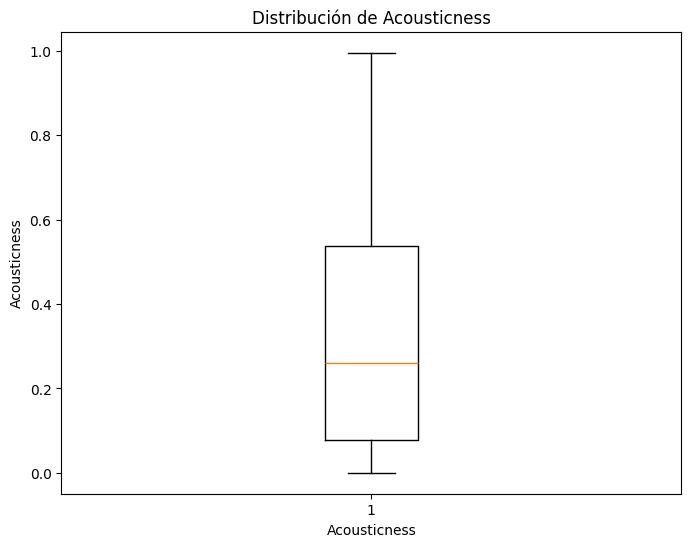

In [61]:
acousticness_dataset = clean_dataset.copy()

# Crear el boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(acousticness_dataset["Acousticness"])

# Agregar etiquetas a los ejes
plt.xlabel("Acousticness")
plt.ylabel("Acousticness")

# Agregar un título al gráfico
plt.title("Distribución de Acousticness")

# Mostrar el gráfico
plt.show()


In [62]:
fig = px.box(clean_dataset, x="Acousticness", width=800, height=400)

fig.show()

In [63]:
fig = px.scatter(acousticness_dataset, x="Acousticness", width=800, height=400)

fig.show()

### Instrumentalness

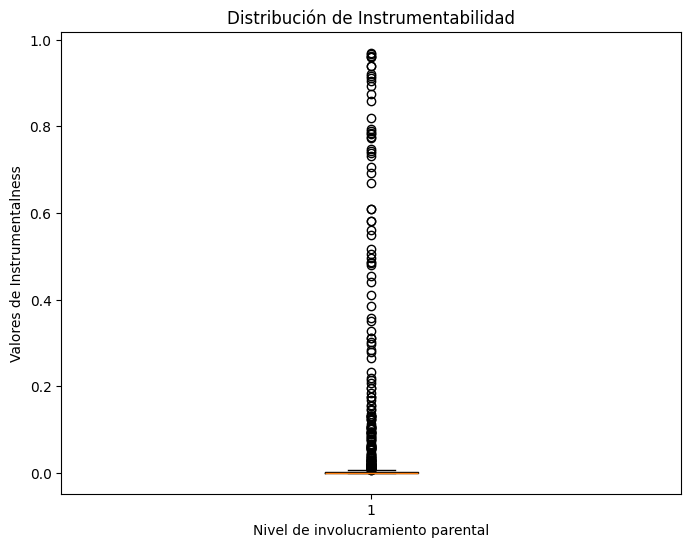

In [64]:
instrumentalness_dataset = clean_dataset.copy()

import matplotlib.pyplot as plt

# Crear el boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(instrumentalness_dataset["Instrumentalness"])

# Agregar etiquetas a los ejes
plt.xlabel("Nivel de involucramiento parental")
plt.ylabel("Valores de Instrumentalness")

# Agregar un título al gráfico
plt.title("Distribución de Instrumentabilidad")

# Mostrar el gráfico
plt.show()


In [65]:
fig = px.box(clean_dataset, x="Instrumentalness", width=800, height=400)

fig.show()

In [66]:
instrumentalness_dataset[instrumentalness_dataset["Instrumentalness"] > 0.8]

Track  \
137                           Ain’t No Sunshine   
316                                       Clair   
342                  Why Can’t We Live Together   
345                                 Hocus Pocus   
350                              Dueling Banjos   
379      Ain’t No Woman (LIKE The One I’ve Got)   
381              Also Sprach Zarathustra (2001)   
569                    The Rockford Files Theme   
643                                  Happy Days   
666                          That’ll Be The Day   
675  Nadia’s Theme (THE Young And The Restless)   
731                                  I’m In You   
820                               Jack And Jill   
880                This Time I’m In It For Love   
960                            Music Box Dancer   

                                   Artist  Duration  Time_Signature  \
137                          Bill Withers       192               4   
316                    Gilbert O’Sullivan       268               4   
342                          Timmy Thomas       328               4   
345                                 Focus       402               4   
350        Eric Weissberg & Steve Mandell       194               4   
379                         The Four Tops       157               4   
381                               Deodato       539               4   
569                             Mike Post       186               4   
643                     Pratt and McClain        76               4   
666                        Linda Ronstadt       158               4   
675  Barry DeVorzon and Perry Botkin, Jr.       189               4   
731                        Peter Frampton        96               4   
820                                Raydio        99               4   
880                                Player       116               4   
960                           Frank Mills       192               4   

     Danceability   Energy  Key  Loudness  Mode  Speechiness  Acousticness  \
137        0.0942  0.99500    2   -27.090     0       0.0514       0.31500   
316        0.3350  0.00532    1   -31.646     1       0.0376       0.99400   
342        0.8370  0.32200   10   -10.161     1       0.0356       0.81000   
345        0.2670  0.72200    2    -7.344     1       0.1020       0.00596   
350        0.4170  0.48400    9    -8.781     1       0.0791       0.40900   
379        0.5190  0.71000    9   -10.908     0       0.0362       0.66500   
381        0.4250  0.66900    5    -9.481     1       0.0316       0.08440   
569        0.4890  0.56200    2   -11.494     1       0.0301       0.06710   
643        0.2120  0.55400    0    -8.352     1       0.0473       0.00325   
666        0.5600  0.14000    1   -20.439     1       0.0325       0.86200   
675        0.2790  0.24300    7   -12.560     0       0.0298       0.91300   
731        0.4850  0.00880    5   -30.000     1       0.0507       0.99600   
820        0.5190  0.02650    7   -26.128     1       0.0554       0.99200   
880        0.9650  0.42700    8   -19.720     1       0.1050       0.88300   
960        0.4660  0.47100    1   -13.762     1       0.0390       0.57300   

     Instrumentalness  Liveness  Valence    Tempo  Popularity  Year  
137             0.970    0.9570  0.00001   83.334          53  1971  
316             0.912    0.0621  0.03970   65.832          65  1973  
342             0.875    0.0966  0.96200  104.499          53  1973  
345             0.893    0.3500  0.34700  184.093          50  1973  
350             0.959    0.0663  0.50100  149.790          48  1973  
379             0.963    0.0889  0.67000  102.585          18  1973  
381             0.916    0.9000  0.32400  114.751          15  1973  
569             0.920    0.1910  0.23000  111.921          28  1975  
643             0.859    0.3240  0.62500  137.787          51  1976  
666             0.968    0.0927  0.05890   74.483          32  1976  
675             0.959    0.0939  0.03930  139.649          15  1976  

In [67]:
instrumentalness_dataset[instrumentalness_dataset["Instrumentalness"] == instrumentalness_dataset["Instrumentalness"].min()]

Track                              Artist  \
0                                    Abc                       The Jackson 5   
1                              Let It Be                         The Beatles   
5    Love Grows (WHERE My Rosemary Goes)                   Edison Lighthouse   
9                      In The Summertime                         Mungo Jerry   
11                                   War                         Edwin Starr   
..                                   ...                                 ...   
967                   Chuck E.’S In Love                    Rickie Lee Jones   
970                          In The Navy                      Village People   
971              Mama Can’t Buy You Love                          Elton John   
973                    We’ve Got Tonight  Bob Seger & The Silver Bullet Band   
979                   Dim All The Nights                        Donna Summer   

     Duration  Time_Signature  Danceability  Energy  Key  Loudness  Mode  \
0         162               4         0.682   0.926    3    -2.515     0   
1         243               4         0.443   0.403    0    -8.339     1   
5         174               4         0.568   0.824    9    -4.613     1   
9         211               4         0.754   0.449    4   -14.013     1   
11        156               4         0.633   0.664   10    -5.037     1   
..        ...             ...           ...     ...  ...       ...   ...   
967       209               4         0.792   0.267    9   -16.974     1   
970       225               4         0.759   0.889    7   -10.592     0   
971       244               4         0.529   0.432    5   -14.245     1   
973       215               4         0.379   0.387    8    -9.283     1   
979       248               4         0.758   0.540    7   -10.911     1   

     Speechiness  Acousticness  Instrumentalness  Liveness  Valence    Tempo  \
0         0.0607        0.0404               0.0    0.1900    0.860  105.969   
1         0.0322        0.6310               0.0    0.1110    0.410  143.462   
5         0.0299        0.4030               0.0    0.0855    0.753  108.625   
9         0.0615        0.7240               0.0    0.1620    0.973   82.751   
11        0.0294        0.4600               0.0    0.1080    0.268  115.058   
..           ...           ...               ...       ...      ...      ...   
967       0.1030        0.2840               0.0    0.1440    0.718  113.402   
970       0.0502        0.1250               0.0    0.0410    0.886  126.201   
971       0.0333        0.5240               0.0    0.1150    0.555   94.382   
973       0.0278        0.7570               0.0    0.1030    0.222   61.530   
979       0.0385        0.0551               0.0    0.0343    0.661  121.581   

     Popularity  Year  
0            81  1970  
1            78  1970  
5            73  1970  
9            71  1970  
11           69  1970  
..          ...   ...  
967          40  1979  
970          38  1979  
971          36  1979  
973          26  1979  
979           0  1979  

[275 rows x 17 columns]

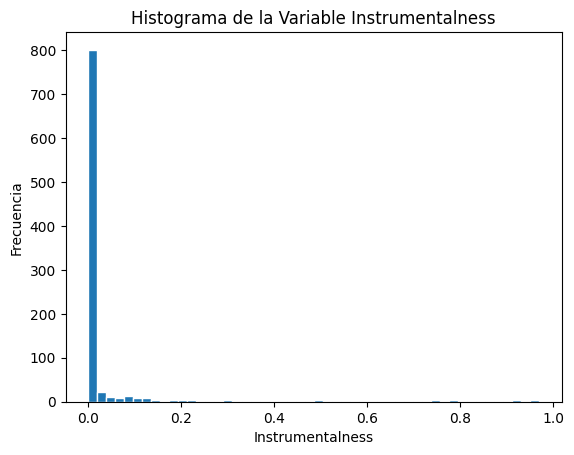

In [68]:
import matplotlib.pyplot as plt

# Definir el número de bins
bins = 50
# bins = 10
# bins = 20

# Crear el histograma con bordes entre los bins
plt.hist(instrumentalness_dataset["Instrumentalness"], bins=bins, edgecolor='white')

# Agregar etiquetas a los ejes
plt.xlabel("Instrumentalness")
plt.ylabel("Frecuencia")

# Agregar un título al gráfico
plt.title("Histograma de la Variable Instrumentalness")

# Mostrar el gráfico
plt.show()


REVISAR DE COLOCAR LA FRECUENCIA.

Y ¿si la voz en ocasiones se interpreta como un instrumento?

Instrumentalnesss alto: no contiene palabras explícitas, palabras claras.

instrumentalness: Predicts whether a track contains  no vocals. “Ooh” and “aah” sounds are treated as instrumental in this  context. Rap or spoken word tracks are clearly “vocal”. The closer the  instrumentalness value is to 1.0, the greater likelihood the track  contains no vocal content. Values above 0.5 are intended to represent  instrumental tracks, but confidence is higher as the value approaches  1.0.

In [69]:
fig = px.scatter(clean_dataset, x="Instrumentalness", width=800, height=400)

fig.show()

fig = px.scatter(clean_dataset, y="Instrumentalness", width=800, height=400)

fig.show()

In [70]:
fig = px.histogram(acousticness_dataset, x="Instrumentalness", width=800, height=400, nbins=50)

fig.show()

### Liveness

MEDIDA DE PROBABILIDAD.

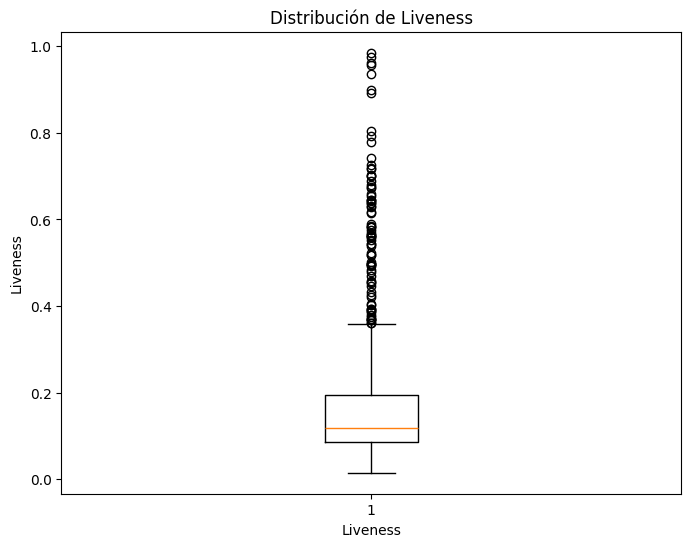

In [71]:
liveness_dataset = clean_dataset.copy()

# Crear el boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(loudness_dataset["Liveness"])

# Agregar etiquetas a los ejes
plt.xlabel("Liveness")
plt.ylabel("Liveness")

# Agregar un título al gráfico
plt.title("Distribución de Liveness")

# Mostrar el gráfico
plt.show()


In [72]:
fig = px.scatter(liveness_dataset, x="Liveness", width=800, height=400)

fig.show()

REVISAR TENER UNA COLUMNA LIVENESS CON 0 Y 1.

In [73]:
fig = px.histogram(clean_dataset, x="Liveness", width=800, height=400, nbins=50)

fig.update_layout(bargap=0.2)

fig.show()

### Valence

#### Análisis.

Se realizaron gráficos para detectar peculiaridades en la variable aleatoria:

In [74]:
fig = px.box(clean_dataset, x="Valence", width=800, height=400)

fig.show()

fig = px.scatter(clean_dataset, x="Valence", width=800, height=400)

fig.show()

fig = px.histogram(clean_dataset, x="Valence", width=800, height=400, nbins=50)

fig.update_layout(
    xaxis_title_text='Valence',
    yaxis_title_text='Cantidad de Registros',
    bargap=0.2
)

fig.show()

Sesgo a izquierda.

#### Conclusiones.

- No se observan mayores peculiaridades en la variable.
- Sesgo a izquierda en su distribución.

### Tempo

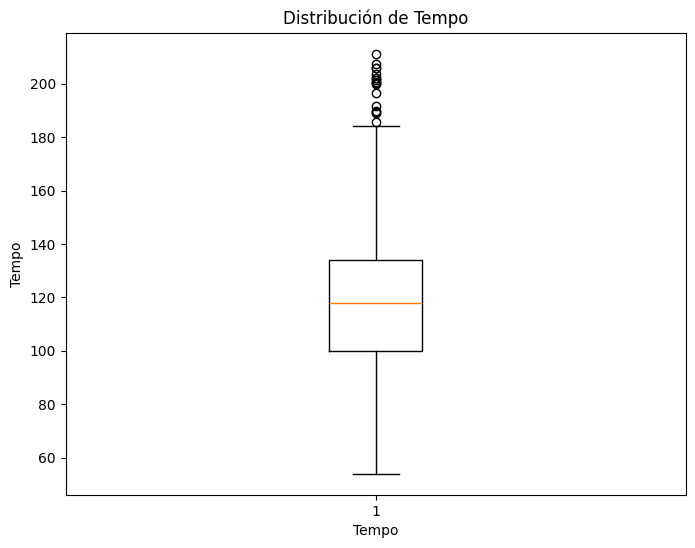

In [75]:
tempo_dataset = clean_dataset.copy()

import matplotlib.pyplot as plt

# Crear el boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(tempo_dataset["Tempo"])

# Agregar etiquetas a los ejes
plt.xlabel("Tempo")
plt.ylabel("Tempo")

# Agregar un título al gráfico
plt.title("Distribución de Tempo")

# Mostrar el gráfico
plt.show()


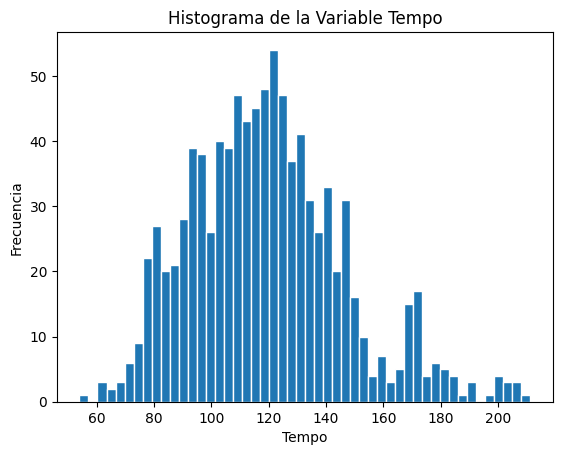

In [76]:
# Definir el número de bins
bins = 50
# bins = 10
# bins = 20

# Crear el histograma con bordes entre los bins
plt.hist(tempo_dataset["Tempo"], bins=bins, edgecolor='white')

# Agregar etiquetas a los ejes
plt.xlabel("Tempo")
plt.ylabel("Frecuencia")

# Agregar un título al gráfico
plt.title("Histograma de la Variable Tempo")

# Mostrar el gráfico
plt.show()

In [77]:
fig = px.scatter(tempo_dataset, x="Tempo", width=800, height=400)

fig.show()

In [78]:
# Rango Intercuartiles (IRQ): diferencia entre los percentiles 25 y 75.
# Para distribuciones no normales.
qs = clean_dataset["Tempo"].quantile([0.25, 0.5, 0.75]).values
q1 = qs[0]
q2 = qs[1]
q3 = qs[2]

# Dibujo la distribución con los límites superpuestos.
fig = px.histogram(clean_dataset, x="Tempo", width=800, height=400, nbins=150)
fig.add_vline(x=q2, line_color='black', annotation_text=r"$\\mu$") #, annotation_text='$\mu$')
fig.add_vline(x=(q1 - 1.5 * (q3 - q1)), line_color='red')#, annotation_text='$\mu-3\sigma$')
fig.add_vline(x=(q3 + 1.5 * (q3 - q1)), line_color='red')#, annotation='$\mu+3\sigma$')

fig.show()

### Popularity

In [79]:
fig = px.scatter(clean_dataset, x="Popularity", width=800, height=400)

fig.show()

In [80]:
fig = px.histogram(clean_dataset, x="Popularity", width=800, height=400, nbins=50)

fig.show()

### Year

#### Análisis.

Se realizó un histograma para observar peculiaridades en la variable:

In [81]:
fig = px.histogram(clean_dataset, x="Year", width=800, height=400)

fig.update_layout(
    xaxis_title_text='Danceability',
    yaxis_title_text='Cantidad de Registros',
    bargap=0.8
)

fig.show()

#### Conclusiones.

- Hay una distribución bastante equitativa de canciones en cada uno de los años de la década.

## 2.2 - Análisis Bivariado.

### Correlación Lineal.

Como primer paso del análisis bivariado, se realizó un heatmap de la correlación de las variables.

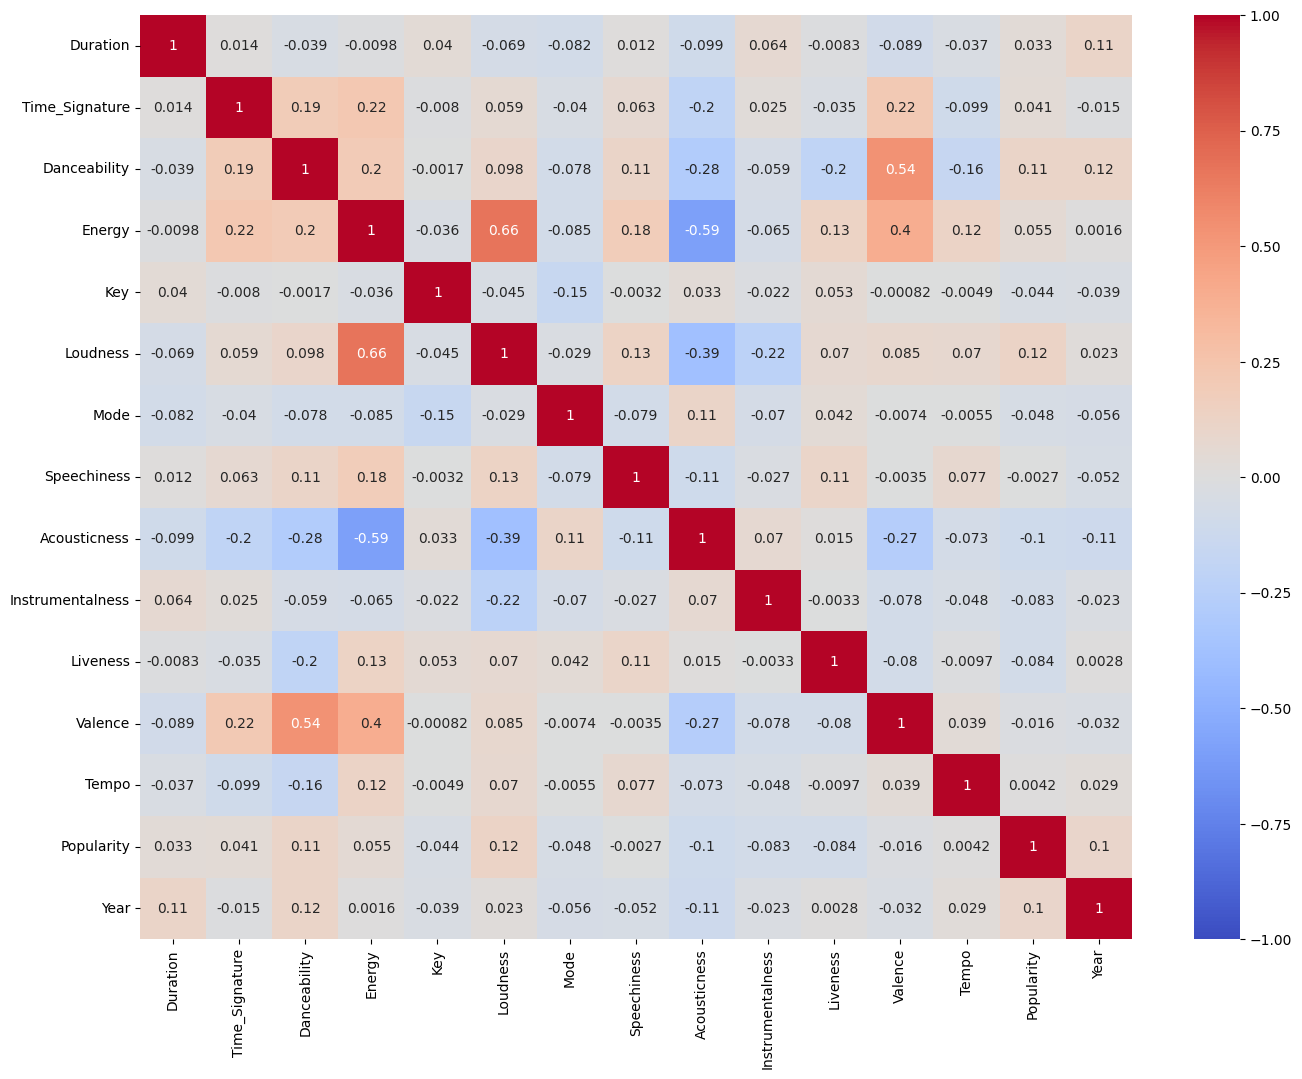

In [82]:
# Obtención únicamente de aquellas columnas numéricas.
numeric_columns = clean_dataset.select_dtypes(include=['number'])

# Cálculo de la matriz de correlaciones.
correlation_matrix = numeric_columns.corr()

# Impresión de la matriz de correlaciones en formato de heatmap.
plt.figure(figsize=(16,12))
sns.heatmap(correlation_matrix, vmin=-1.0, vmax=1.0, center=0.0, annot=True, cmap= 'coolwarm')
plt.show()

Se observan correlaciones lineales dignas de análisis entre:
- Loudness y Energy: directamente lineal.
- Acousticness y Energy: inversamente lineal.
- Valence y Danceability: directamente lineal.

Sin embargo, es posible que haya correlaciones no lineales entre otras variables. Para identificarlas, se realizó el *scatter matrix* para cada combinación de variables:

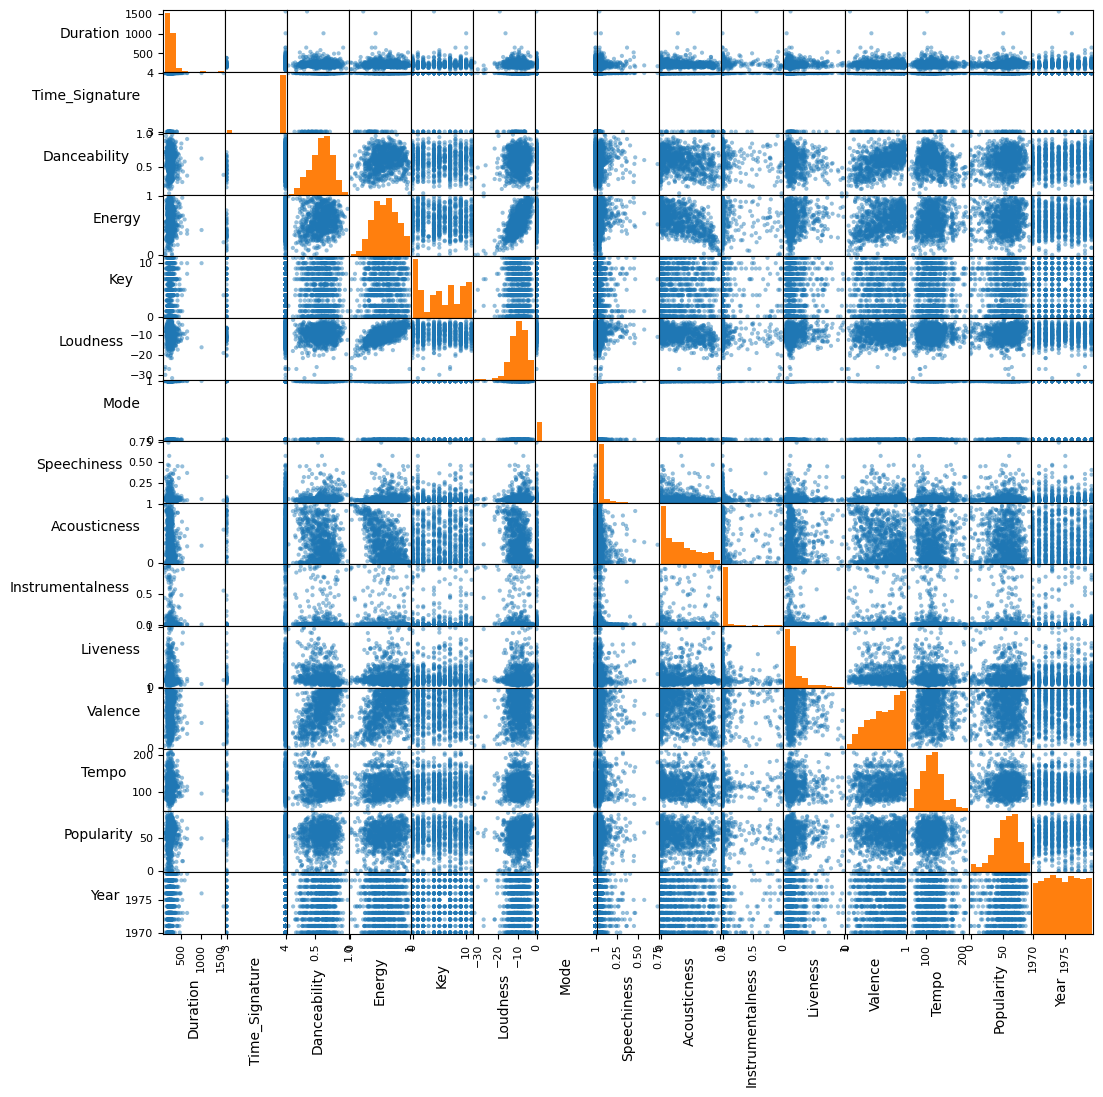

In [83]:
# Creación de la "scatter matrix".
axs = pd.plotting.scatter_matrix(numeric_columns, figsize=(12, 12), alpha=0.47, hist_kwds={'color':'#ff7f0e'})
# la mostramos por pantalla
# acomodamos la orientación del contenido de los ejes
for i in range(len(numeric_columns.columns)):
  for j in range(len(numeric_columns.columns)):
    ax=axs[i,j]
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')
plt.show()

De esta forma, se identificaron posibles correlaciones, lineales y no lineales, entre los siguientes pares de variables:

- Energy y Valence.
- Loudness y Acousticness.
- Loudness y Valence.
- Acousticness y Danceability.
- Liveness e Instrumentalness.
- Instrumentalness y Speechiness.

A continuación, se realizó el análisis de cada una de estas posibles correlaciones.

### Métodos de Spearman y Kendall para correlaciones no lineales.

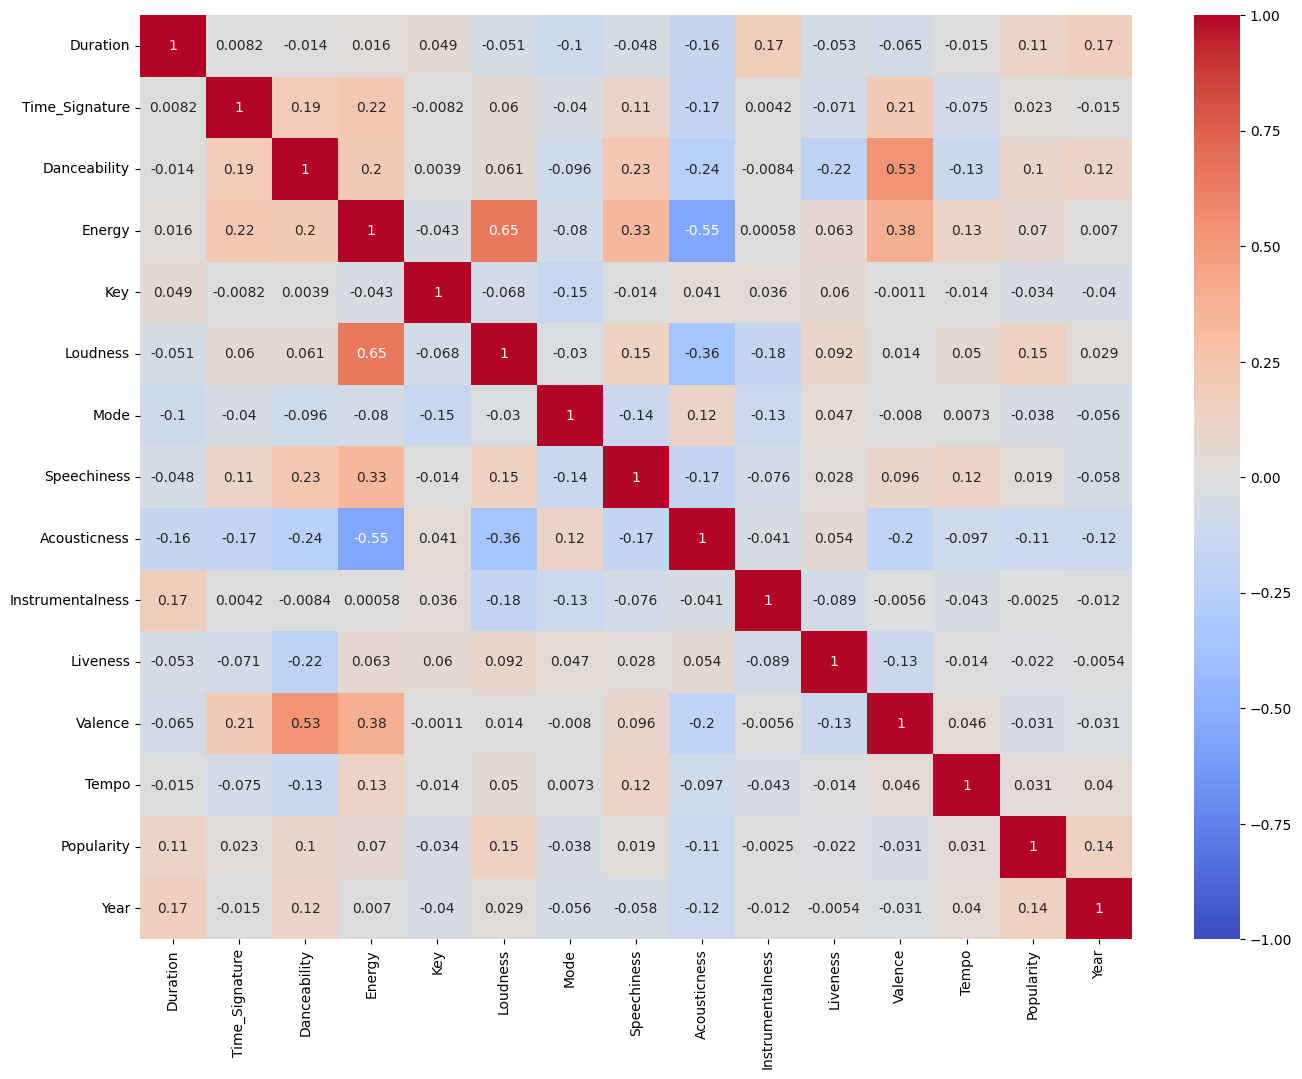

In [84]:
# Cálculo de la correlación de Spearman.
spearman_corr = numeric_columns.corr(method='spearman')
plt.figure(figsize=(16,12))
sns.heatmap(spearman_corr, vmin=-1.0, vmax=1.0, center=0.0, annot=True, cmap= 'coolwarm')
plt.show()


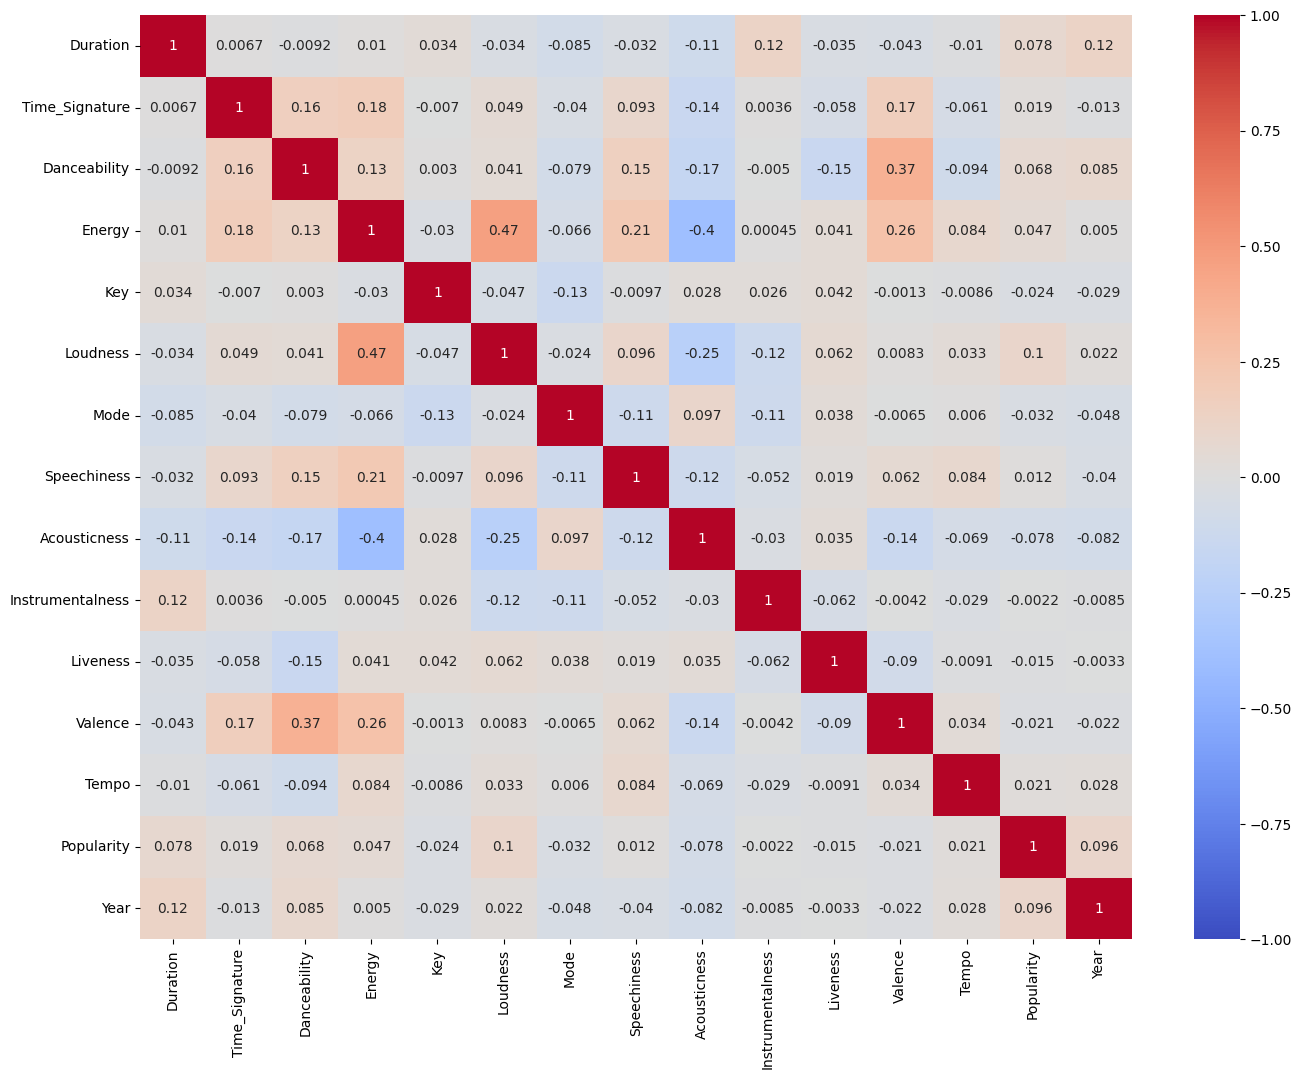

In [85]:
# Cálculo de la correlación de Kendall.
kendall_corr = numeric_columns.corr(method='kendall')
plt.figure(figsize=(16,12))
sns.heatmap(kendall_corr, vmin=-1.0, vmax=1.0, center=0.0, annot=True, cmap= 'coolwarm')
plt.show()

### Definición de Funciones.

In [86]:
def funcion_cuadratica(x, a, b, c):
    return a + b * x + c * x**2

def funcion_lineal(x, a, b):
    return a * x + b

def funcion_radical(x, a, b):
    return a * np.sqrt(abs(x)) + b

def funcion_radical_decreciente(x, a, b, c):
    return a * np.sqrt(abs(c - x)) + b

### Loudness y Energy.

En lugar de una relación lineal entre ambas, se observa algo más parecido a una relación radical:

In [87]:
fig = px.scatter(clean_dataset, x="Loudness", y="Energy", width=800, height=400)

fig.show()

fig = px.scatter(clean_dataset, y="Loudness", x="Energy", width=800, height=400)

fig.show()

Para afirmar las sospechas resultantes de los *scatter*, se realizó una regresión lineal de ellos para descubrir los parámetros óptimos de una posible función radical que describiera la curva:

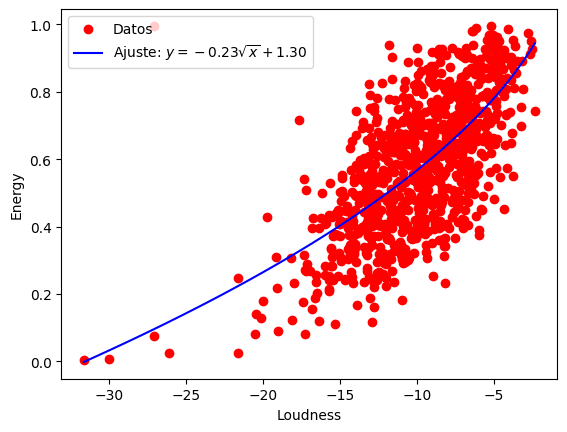

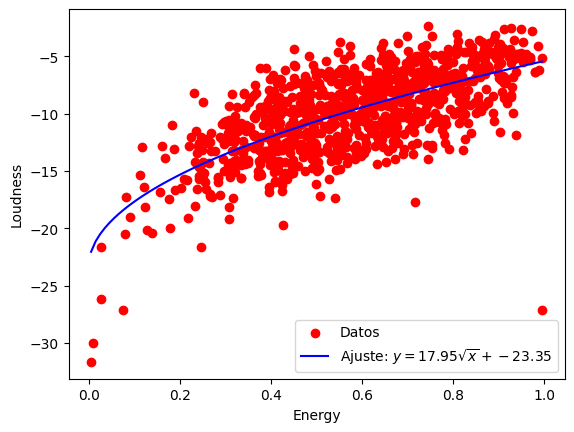

In [88]:
# Definición de las variables.
variable_independiente = "Loudness"
variable_dependiente = "Energy"
x_data = clean_dataset[variable_independiente]
y_data = clean_dataset[variable_dependiente]

# Ajuste de los datos a una curva radical.
params, covariance = curve_fit(funcion_radical, x_data, y_data)

# Extracción de los parámetros.
a_opt, b_opt = params

# Generación de puntos con la curva ajustada.
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = funcion_radical(x_fit, a_opt, b_opt)

# Gráfico de datos originales y curva ajustada.
plt.scatter(x_data, y_data, label='Datos', color='red')
plt.plot(x_fit, y_fit, label=f'Ajuste: $y = {a_opt:.2f}\\sqrt{{x}} + {b_opt:.2f}$', color='blue')
plt.xlabel(variable_independiente)
plt.ylabel(variable_dependiente)
plt.legend()
plt.show()

# ------------------------------------------------------------

# Ajustar los datos a la curva raíz cuadrada
params, covariance = curve_fit(funcion_radical, y_data, x_data)

# Extraer los parámetros óptimos
a_opt, b_opt = params
#print(f"Parámetros óptimos: a = {a_opt}, b = {b_opt}")

# Generar puntos con la curva ajustada
x_fit = np.linspace(min(y_data), max(y_data), 100)
y_fit = funcion_radical(x_fit, a_opt, b_opt)

# Graficar datos originales y curva ajustada
plt.scatter(y_data, x_data, label='Datos', color='red')
plt.plot(x_fit, y_fit, label=f'Ajuste: $y = {a_opt:.2f}\\sqrt{{x}} + {b_opt:.2f}$', color='blue')
plt.xlabel('Energy')
plt.ylabel('Loudness')
plt.legend()
plt.show()

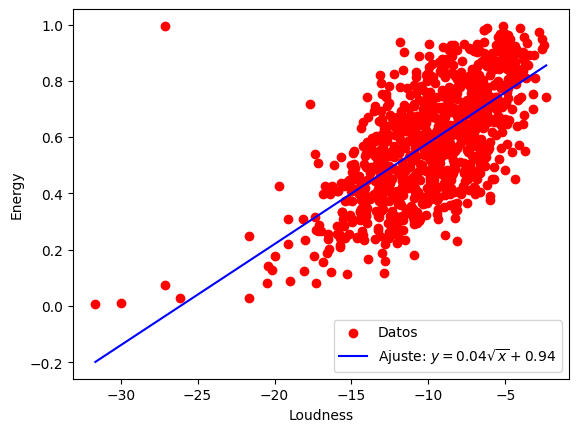

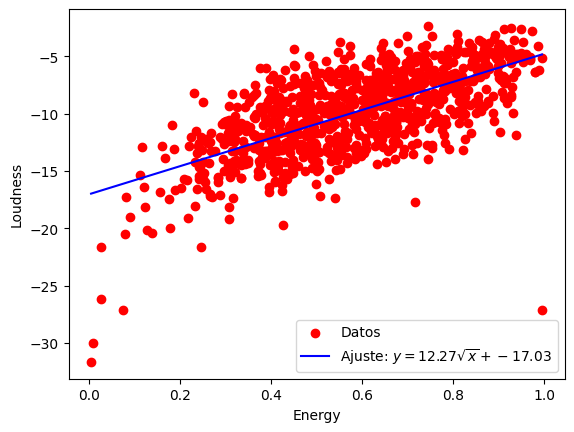

In [89]:
# Definir la función exponencial
def func_sqrt(x, a, b):
    return a * x + b

# Datos de ejemplo (reemplaza estos con tus propios datos)
x_data = clean_dataset["Loudness"]  # Valores de la variable independiente
y_data = clean_dataset["Energy"]  # Valores de la variable dependiente

# Ajustar los datos a la curva exponencial
params, covariance = curve_fit(func_sqrt, x_data, y_data)

# Extraer los parámetros óptimos
a_opt, b_opt = params
#print(f"Parámetros óptimos: a = {a_opt}, b = {b_opt}")

# Generar puntos con la curva ajustada
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = func_sqrt(x_fit, a_opt, b_opt)

# Graficar datos originales y curva ajustada
plt.scatter(x_data, y_data, label='Datos', color='red')
plt.plot(x_fit, y_fit, label=f'Ajuste: $y = {a_opt:.2f}\\sqrt{{x}} + {b_opt:.2f}$', color='blue')
plt.xlabel('Loudness')
plt.ylabel('Energy')
plt.legend()
plt.show()

# ------------------------------------------------------------

# Ajustar los datos a la curva raíz cuadrada
params, covariance = curve_fit(func_sqrt, y_data, x_data)

# Extraer los parámetros óptimos
a_opt, b_opt = params
#print(f"Parámetros óptimos: a = {a_opt}, b = {b_opt}")

# Generar puntos con la curva ajustada
x_fit = np.linspace(min(y_data), max(y_data), 100)
y_fit = func_sqrt(x_fit, a_opt, b_opt)

# Graficar datos originales y curva ajustada
plt.scatter(y_data, x_data, label='Datos', color='red')
plt.plot(x_fit, y_fit, label=f'Ajuste: $y = {a_opt:.2f}\\sqrt{{x}} + {b_opt:.2f}$', color='blue')
plt.xlabel('Energy')
plt.ylabel('Loudness')
plt.legend()
plt.show()

#### Conclusiones.

- Efectivamente, es posible identificar una relación radical entre las variables Loudness y Energy: a medida que la variable en el eje X incrementa, la variable en el eje Y también lo hace pero a un ritmo más lento.

### Energy y Acousticness.

En lugar de una relación lineal entre ambas, se observa algo más parecido a una relación radical decreciente:

In [90]:
fig = px.scatter(clean_dataset, x="Energy", y="Acousticness", width=800, height=400)

fig.show()

fig = px.scatter(clean_dataset, x="Acousticness", y="Energy", width=800, height=400)

fig.show()

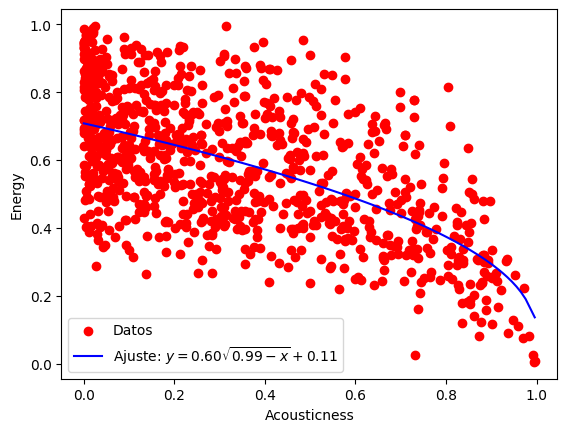

In [91]:
# Datos de ejemplo (reemplaza estos con tus propios datos)
x_data = clean_dataset["Acousticness"]  # Valores de la variable independiente
y_data = clean_dataset["Energy"]  # Valores de la variable dependiente

# Ajustar los datos a la curva exponencial
params, covariance = curve_fit(funcion_radical_decreciente, x_data, y_data)

# Extraer los parámetros óptimos
a_opt, b_opt, c_opt = params
#print(f"Parámetros óptimos: a = {a_opt}, b = {b_opt}")

# Generar puntos con la curva ajustada
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = funcion_radical_decreciente(x_fit, a_opt, b_opt, c_opt)

# Graficar datos originales y curva ajustada
plt.scatter(x_data, y_data, label='Datos', color='red')
plt.plot(x_fit, y_fit, label=f'Ajuste: $y = {a_opt:.2f}\\sqrt{{{c_opt:.2f} - x}} + {b_opt:.2f}$', color='blue')
plt.xlabel('Acousticness')
plt.ylabel('Energy')
plt.legend()
plt.show()

#### Conclusiones.

- Efectivamente, pareciera haber una relación radical decreciente entre las variables. Esto sugiere que: al incrementar la variable en el eje x, la variable en el y decrece rápidamente al inicio, pero el efecto disminuye gradualmente.

### Danceability y Valence.

Entre este par de variables sí pareciera haber una relación lineal:

In [92]:
fig = px.scatter(clean_dataset, x="Danceability", y="Valence", width=800, height=400)

fig.show()

fig = px.scatter(clean_dataset, y="Valence", x="Danceability", width=800, height=400)

fig.show()

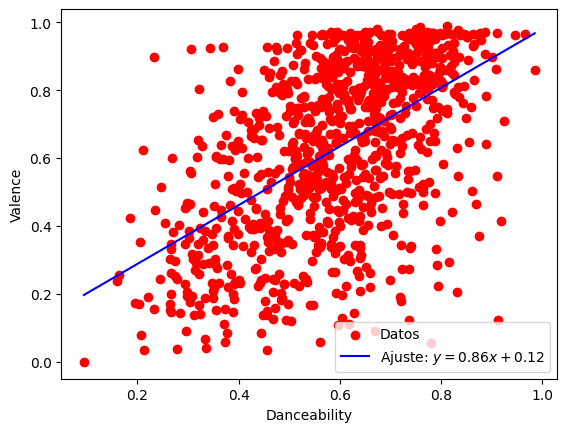

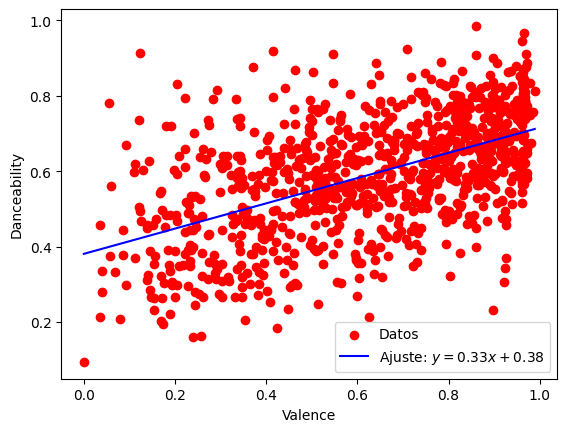

In [93]:
# Definir la función exponencial
def func_lineal(x, a, b):
    return a * x + b

# Datos de ejemplo (reemplaza estos con tus propios datos)
x_data = clean_dataset["Danceability"]  # Valores de la variable independiente
y_data = clean_dataset["Valence"]  # Valores de la variable dependiente

# Ajustar los datos a la curva exponencial
params, covariance = curve_fit(func_lineal, x_data, y_data)

# Extraer los parámetros óptimos
a_opt, b_opt = params
#print(f"Parámetros óptimos: a = {a_opt}, b = {b_opt}")

# Generar puntos con la curva ajustada
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = func_lineal(x_fit, a_opt, b_opt)

# Graficar datos originales y curva ajustada
plt.scatter(x_data, y_data, label='Datos', color='red')
plt.plot(x_fit, y_fit, label=f'Ajuste: $y = {a_opt:.2f}x + {b_opt:.2f}$', color='blue')
plt.xlabel('Danceability')
plt.ylabel('Valence')
plt.legend()
plt.show()

# ------------------------------------------------------------

# Ajustar los datos a la curva raíz cuadrada
params, covariance = curve_fit(func_lineal, y_data, x_data)

# Extraer los parámetros óptimos
a_opt, b_opt = params
#print(f"Parámetros óptimos: a = {a_opt}, b = {b_opt}")

# Generar puntos con la curva ajustada
x_fit = np.linspace(min(y_data), max(y_data), 100)
y_fit = func_lineal(x_fit, a_opt, b_opt)

# Graficar datos originales y curva ajustada
plt.scatter(y_data, x_data, label='Datos', color='red')
plt.plot(x_fit, y_fit, label=f'Ajuste: $y = {a_opt:.2f}x + {b_opt:.2f}$', color='blue')
plt.xlabel('Valence')
plt.ylabel('Danceability')
plt.legend()
plt.show()

#### Conclusiones.

- Efectivamente, pareciera haber una relación lineal entre las variables. Esto sugiere que: cuando incrementa la variable en el eje x, también lo hace la variable en el eje y.

### Energy y Valence.

Observando los scatters, se puede observar una relación parecida a la de una función radical más compleja:

In [94]:
fig = px.scatter(clean_dataset, x="Energy", y="Valence", width=800, height=400)

fig.show()

fig = px.scatter(clean_dataset, x="Valence", y="Energy", width=800, height=400)

fig.show()

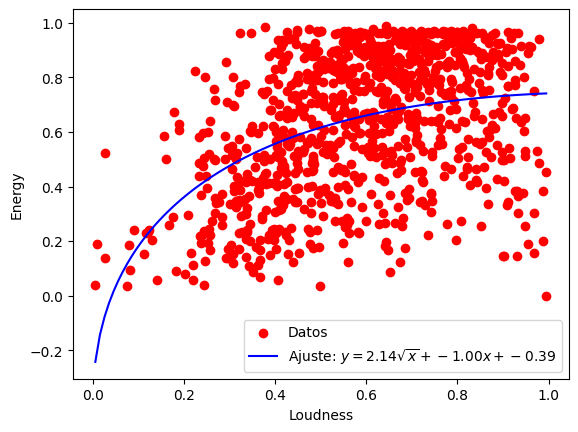

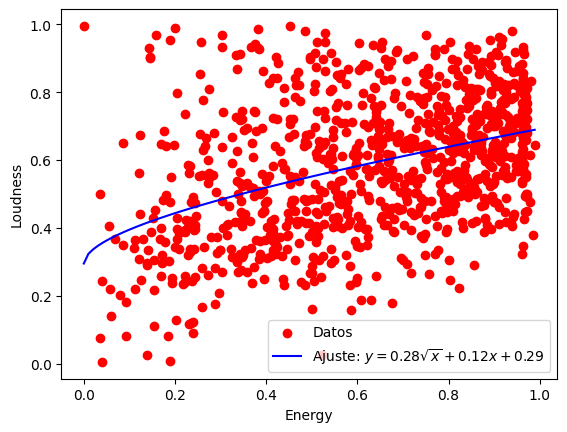

In [95]:
# Definir la función exponencial
def func_sqrt_complex(x, a, b, c):
    return a * np.sqrt(abs(x)) + b*x + c

# Datos de ejemplo (reemplaza estos con tus propios datos)
x_data = clean_dataset["Energy"]  # Valores de la variable independiente
y_data = clean_dataset["Valence"]  # Valores de la variable dependiente

# Ajustar los datos a la curva exponencial
params, covariance = curve_fit(func_sqrt_complex, x_data, y_data)

# Extraer los parámetros óptimos
a_opt, b_opt, c_opt = params
#print(f"Parámetros óptimos: a = {a_opt}, b = {b_opt}")

# Generar puntos con la curva ajustada
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = func_sqrt_complex(x_fit, a_opt, b_opt, c_opt)

# Graficar datos originales y curva ajustada
plt.scatter(x_data, y_data, label='Datos', color='red')
plt.plot(x_fit, y_fit, label=f'Ajuste: $y = {a_opt:.2f}\\sqrt{{x}} + {b_opt:.2f}x + {c_opt:.2f}$', color='blue')
plt.xlabel('Loudness')
plt.ylabel('Energy')
plt.legend()
plt.show()

# ------------------------------------------------------------

# Ajustar los datos a la curva raíz cuadrada
params, covariance = curve_fit(func_sqrt_complex, y_data, x_data)

# Extraer los parámetros óptimos
a_opt, b_opt, c_opt = params
#print(f"Parámetros óptimos: a = {a_opt}, b = {b_opt}")

# Generar puntos con la curva ajustada
x_fit = np.linspace(min(y_data), max(y_data), 100)
y_fit = func_sqrt_complex(x_fit, a_opt, b_opt, c_opt)

# Graficar datos originales y curva ajustada
plt.scatter(y_data, x_data, label='Datos', color='red')
plt.plot(x_fit, y_fit, label=f'Ajuste: $y = {a_opt:.2f}\\sqrt{{x}} + {b_opt:.2f}x + {c_opt:.2f}$', color='blue')
plt.xlabel('Energy')
plt.ylabel('Loudness')
plt.legend()
plt.show()

### Acousticness y Loudness.

Pareciera que las variables tienen una relación radical decreciente:

In [96]:
fig = px.scatter(clean_dataset, x="Loudness", y="Acousticness", width=800, height=400)

fig.show()

fig = px.scatter(clean_dataset, x="Acousticness", y="Loudness", width=800, height=400)

fig.show()

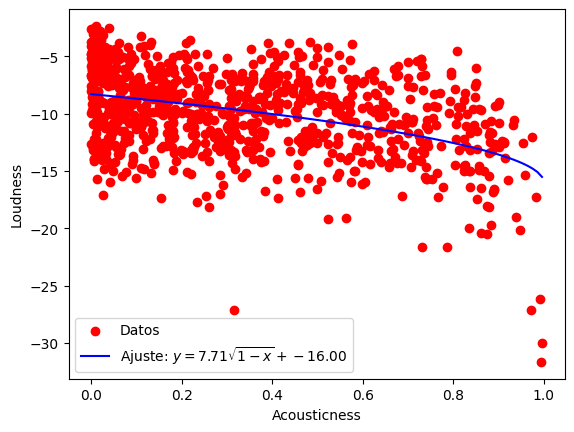

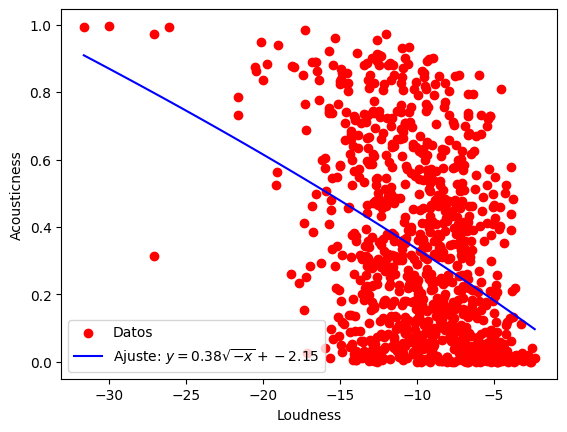

In [97]:
# Definir la función exponencial
def func_sqrt(x, a, b):
    return a * np.sqrt(1 - x) + b

# Datos de ejemplo (reemplaza estos con tus propios datos)
x_data = clean_dataset["Acousticness"]  # Valores de la variable independiente
y_data = clean_dataset["Loudness"]  # Valores de la variable dependiente

# Ajustar los datos a la curva exponencial
params, covariance = curve_fit(func_sqrt, x_data, y_data)

# Extraer los parámetros óptimos
a_opt, b_opt = params
#print(f"Parámetros óptimos: a = {a_opt}, b = {b_opt}")

# Generar puntos con la curva ajustada
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = func_sqrt(x_fit, a_opt, b_opt)

# Graficar datos originales y curva ajustada
plt.scatter(x_data, y_data, label='Datos', color='red')
plt.plot(x_fit, y_fit, label=f'Ajuste: $y = {a_opt:.2f}\\sqrt{{1 - x}} + {b_opt:.2f}$', color='blue')
plt.xlabel('Acousticness')
plt.ylabel('Loudness')
plt.legend()
plt.show()

# ------------------------------------------------------------

# Se debe colocar el valor máximo.
def func_sqrt(x, a, b):
    return a * np.sqrt(32 - x) + b

# Ajustar los datos a la curva raíz cuadrada
params, covariance = curve_fit(func_sqrt, y_data, x_data)

# Extraer los parámetros óptimos
a_opt, b_opt = params
#print(f"Parámetros óptimos: a = {a_opt}, b = {b_opt}")

# Generar puntos con la curva ajustada
x_fit = np.linspace(min(y_data), max(y_data), 100)
y_fit = func_sqrt(x_fit, a_opt, b_opt)

# Graficar datos originales y curva ajustada
plt.scatter(y_data, x_data, label='Datos', color='red')
plt.plot(x_fit, y_fit, label=f'Ajuste: $y = {a_opt:.2f}\\sqrt{{- x}} + {b_opt:.2f}$', color='blue')
plt.xlabel('Loudness')
plt.ylabel('Acousticness')
plt.legend()
plt.show()

### Loudness y Valence.

In [98]:
fig = px.scatter(clean_dataset, x="Loudness", y="Valence", width=800, height=400)

fig.show()

fig = px.scatter(clean_dataset, x="Valence", y="Loudness", width=800, height=400)

fig.show()

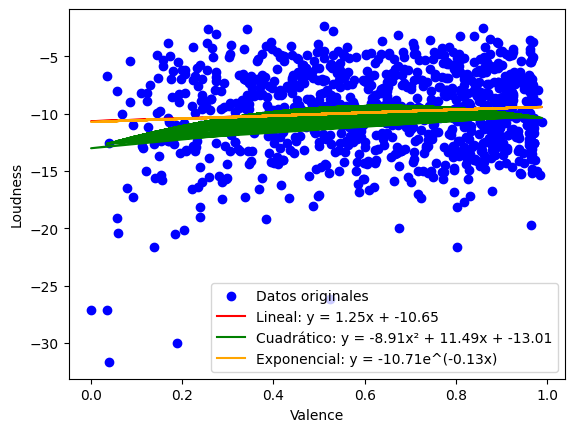

In [99]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.optimize import curve_fit

# Datos de ejemplo (reemplaza estos valores con tus datos reales)
x = clean_dataset["Valence"].values  # Energy
y = clean_dataset["Loudness"].values  # Loudness

# Redimensionar x para que sea un array 2D (requerido por sklearn)
x_2d = x.reshape(-1, 1)

# 1. Ajuste lineal
model_linear = LinearRegression()
model_linear.fit(x_2d, y)
y_pred_linear = model_linear.predict(x_2d)

# 2. Ajuste cuadrático
def func_quadratic(x, a, b, c):
    return a * x**2 + b * x + c

params_quad, _ = curve_fit(func_quadratic, x, y)
y_pred_quad = func_quadratic(x, *params_quad)

# 3. Ajuste exponencial
def func_exp(x, a, b):
    return a * np.exp(b * x)

params_exp, _ = curve_fit(func_exp, x, y)
y_pred_exp = func_exp(x, *params_exp)

# Graficar los datos originales
plt.scatter(x, y, color='blue', label='Datos originales')

# Graficar los diferentes modelos
plt.plot(x, y_pred_linear, label=f'Lineal: y = {model_linear.coef_[0]:.2f}x + {model_linear.intercept_:.2f}', color='red')
plt.plot(x, y_pred_quad, label=f'Cuadrático: y = {params_quad[0]:.2f}x² + {params_quad[1]:.2f}x + {params_quad[2]:.2f}', color='green')
plt.plot(x, y_pred_exp, label=f'Exponencial: y = {params_exp[0]:.2f}e^({params_exp[1]:.2f}x)', color='orange')

# Etiquetas
plt.xlabel('Valence')
plt.ylabel('Loudness')
plt.legend()
plt.show()


Parámetros óptimos: a = 2.379722278229374, b = -11.703259392554221


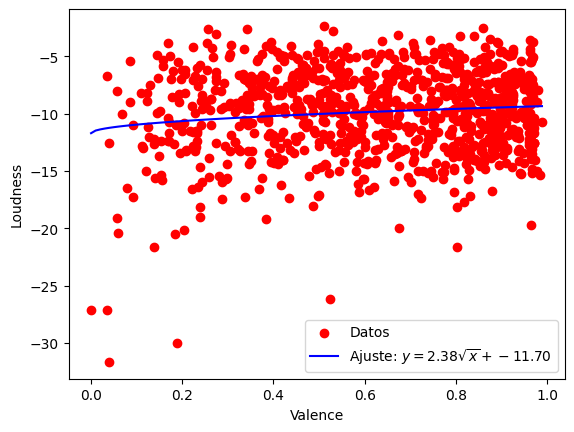

In [100]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Definir la función raíz cuadrada
def func_sqrt(x, a, b):
    return a * np.sqrt(x) + b

# Datos de ejemplo (reemplaza estos con tus propios datos)
x_data = clean_dataset["Valence"]  # Valores de la variable independiente
y_data = clean_dataset["Loudness"]  # Valores de la variable dependiente

# Ajustar los datos a la curva raíz cuadrada
params, covariance = curve_fit(func_sqrt, x_data, y_data)

# Extraer los parámetros óptimos
a_opt, b_opt = params
print(f"Parámetros óptimos: a = {a_opt}, b = {b_opt}")

# Generar puntos con la curva ajustada
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = func_sqrt(x_fit, a_opt, b_opt)

# Graficar datos originales y curva ajustada
plt.scatter(x_data, y_data, label='Datos', color='red')
plt.plot(x_fit, y_fit, label=f'Ajuste: $y = {a_opt:.2f}\\sqrt{{x}} + {b_opt:.2f}$', color='blue')
plt.xlabel('Valence')
plt.ylabel('Loudness')
plt.legend()
plt.show()


### Acousticness y Danceability.

In [101]:
fig = px.scatter(clean_dataset, x="Acousticness", y="Danceability", width=800, height=400)

fig.show()

fig = px.scatter(clean_dataset, x="Danceability", y="Acousticness", width=800, height=400)

fig.show()

Parámetros óptimos: a = -0.15887893334059408, b = 0.6424778755291068


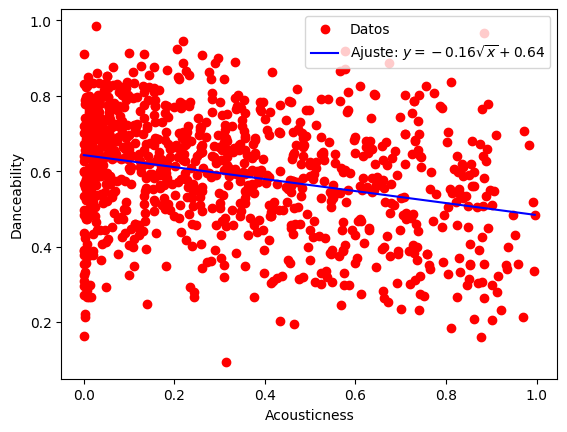

In [102]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Definir la función raíz cuadrada
def func_sqrt(x, a, b):
    return a * x + b

# Datos de ejemplo (reemplaza estos con tus propios datos)
x_data = clean_dataset["Acousticness"]  # Valores de la variable independiente
y_data = clean_dataset["Danceability"]  # Valores de la variable dependiente

# Ajustar los datos a la curva raíz cuadrada
params, covariance = curve_fit(func_sqrt, x_data, y_data)

# Extraer los parámetros óptimos
a_opt, b_opt = params
print(f"Parámetros óptimos: a = {a_opt}, b = {b_opt}")

# Generar puntos con la curva ajustada
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = func_sqrt(x_fit, a_opt, b_opt)

# Graficar datos originales y curva ajustada
plt.scatter(x_data, y_data, label='Datos', color='red')
plt.plot(x_fit, y_fit, label=f'Ajuste: $y = {a_opt:.2f}\\sqrt{{x}} + {b_opt:.2f}$', color='blue')
plt.xlabel('Acousticness')
plt.ylabel('Danceability')
plt.legend()
plt.show()


### Instrumentalness y Speechiness.

In [103]:
fig = px.scatter(clean_dataset, x="Instrumentalness", y="Speechiness", width=800, height=400)

fig.show()

fig = px.scatter(clean_dataset, x="Speechiness", y="Instrumentalness", width=800, height=400)

fig.show()

### Mode y Valence

### Danceability y Year

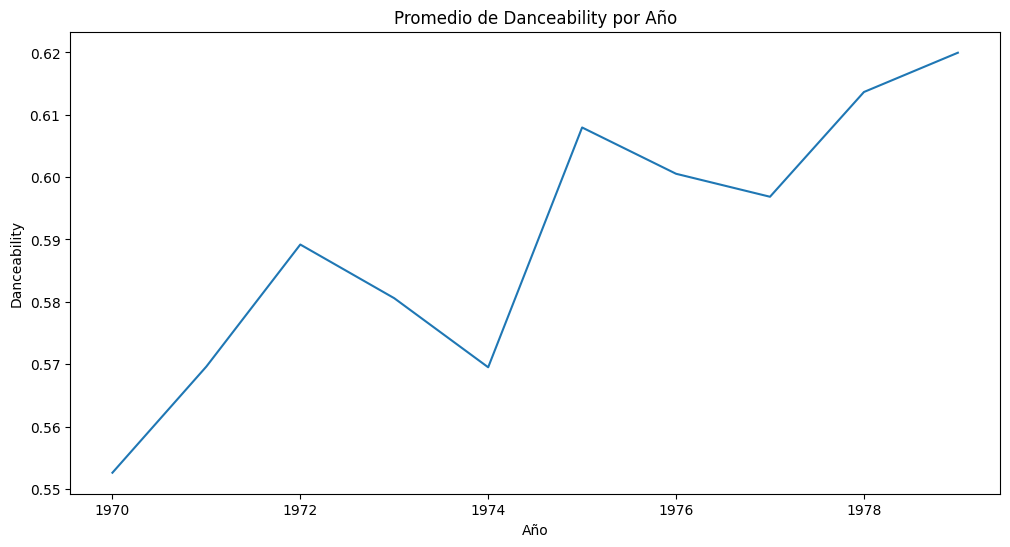

In [104]:
danceability_per_year = clean_dataset.groupby('Year')['Danceability'].mean().reset_index()

# Visualizar la tendencia de Speechiness a lo largo del tiempo
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Danceability', data=danceability_per_year)
plt.title('Promedio de Danceability por Año')
plt.ylabel('Danceability')
plt.xlabel('Año')
plt.show()

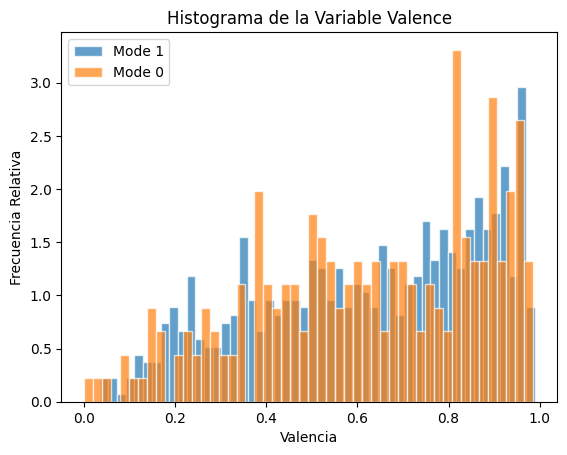

In [105]:
# Definir el número de bins
bins = 50

mode_positive = clean_dataset[clean_dataset["Mode"] == 1]
mode_negativo = clean_dataset[clean_dataset["Mode"] == 0]

# Crear el histograma con frecuencia relativa (density=True) y bordes entre los bins
plt.hist(mode_positive["Valence"], bins=bins, edgecolor='white', density=True, alpha=0.7, label="Mode 1")
plt.hist(mode_negativo["Valence"], bins=bins, edgecolor='white', density=True, alpha=0.7, label="Mode 0")

# Agregar etiquetas a los ejes
plt.xlabel("Valencia")
plt.ylabel("Frecuencia Relativa")

# Agregar un título al gráfico
plt.title("Histograma de la Variable Valence")

# Agregar una leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

# Alpha es para la transparencia en caso de superposición.


### Liveness e Instrumentalness.

In [106]:
fig = px.scatter(clean_dataset, x="Liveness", y="Instrumentalness", width=800, height=400)

fig.show()

fig = px.scatter(clean_dataset, x="Instrumentalness", y="Liveness", width=800, height=400)

fig.show()

Parámetros óptimos: a = 0.0011580321602769766, b = 0.03507972463901294


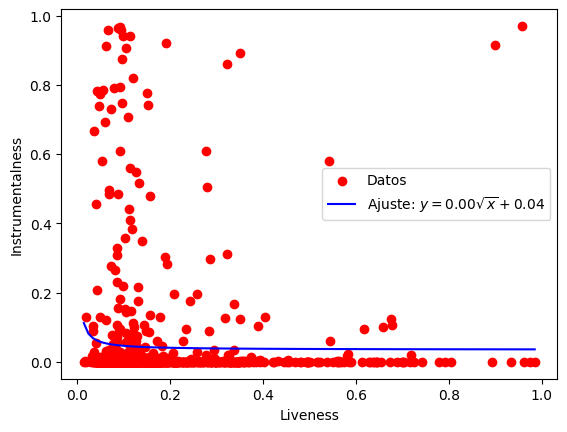

In [107]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Definir la función raíz cuadrada
def func_sqrt(x, a, b):
    return a * (1/x) + b

# Datos de ejemplo (reemplaza estos con tus propios datos)
x_data = clean_dataset["Liveness"]  # Valores de la variable independiente
y_data = clean_dataset["Instrumentalness"]  # Valores de la variable dependiente

# Ajustar los datos a la curva raíz cuadrada
params, covariance = curve_fit(func_sqrt, x_data, y_data)

# Extraer los parámetros óptimos
a_opt, b_opt = params
print(f"Parámetros óptimos: a = {a_opt}, b = {b_opt}")

# Generar puntos con la curva ajustada
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = func_sqrt(x_fit, a_opt, b_opt)

# Graficar datos originales y curva ajustada
plt.scatter(x_data, y_data, label='Datos', color='red')
plt.plot(x_fit, y_fit, label=f'Ajuste: $y = {a_opt:.2f}\\sqrt{{x}} + {b_opt:.2f}$', color='blue')
plt.xlabel('Liveness')
plt.ylabel('Instrumentalness')
plt.legend()
plt.show()


### Análisis Bivariado -> A lo largo de los años.

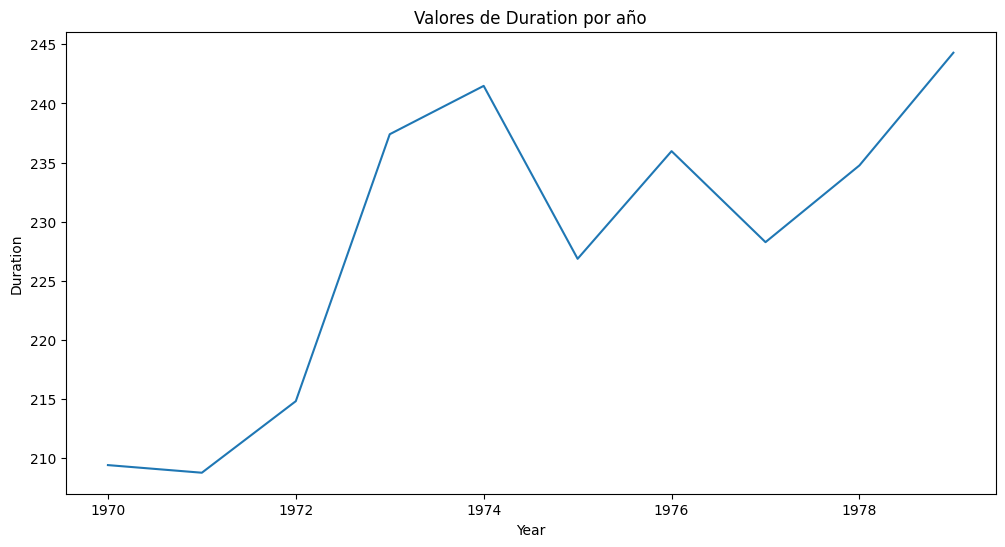

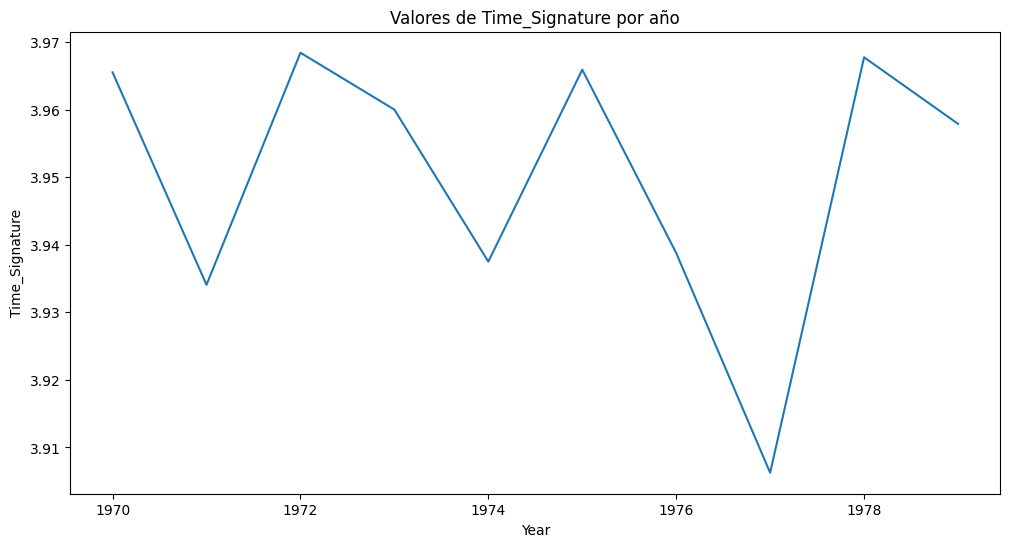

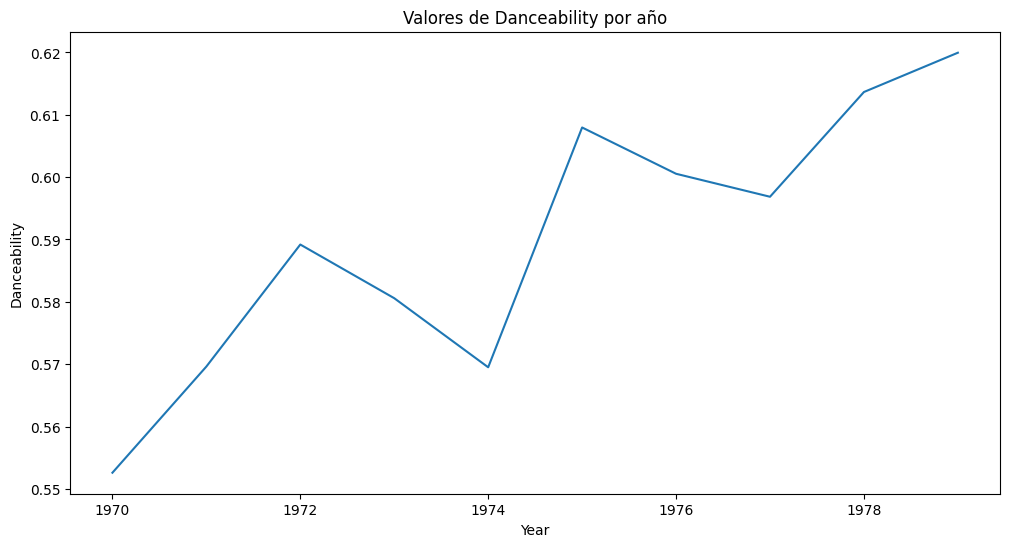

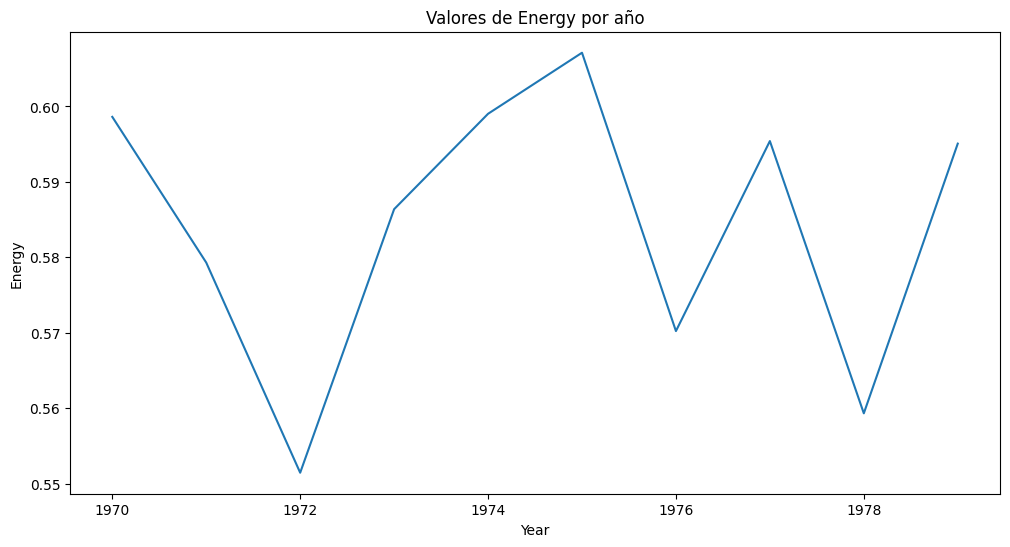

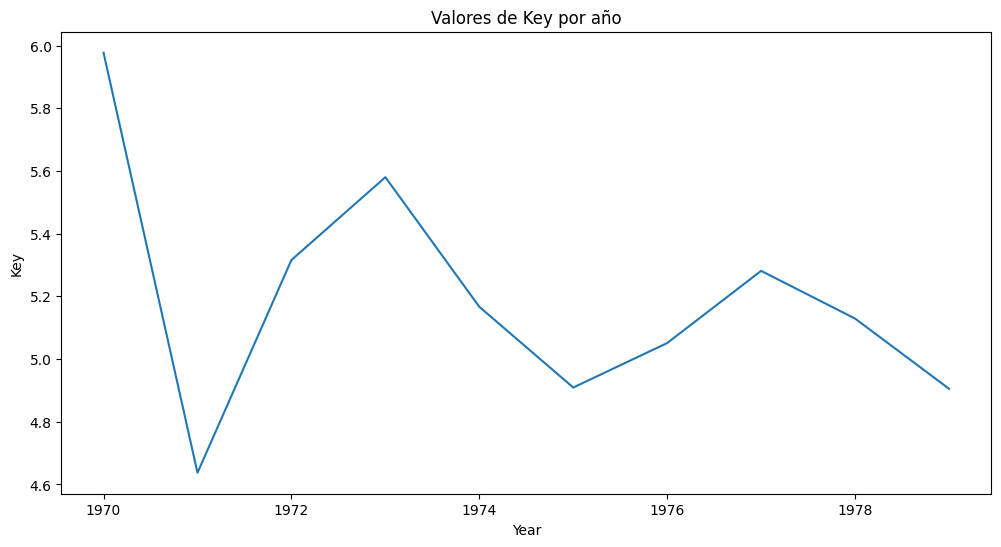

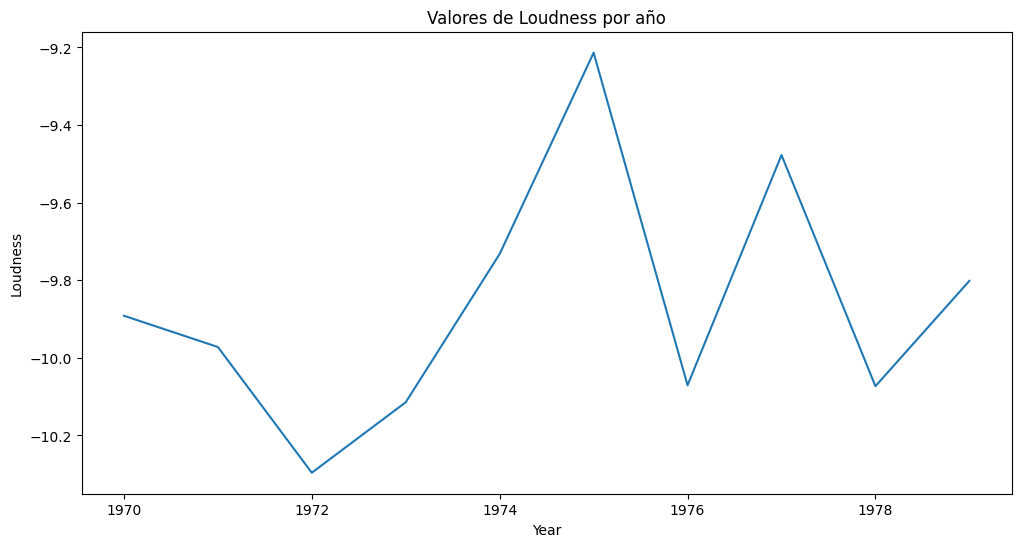

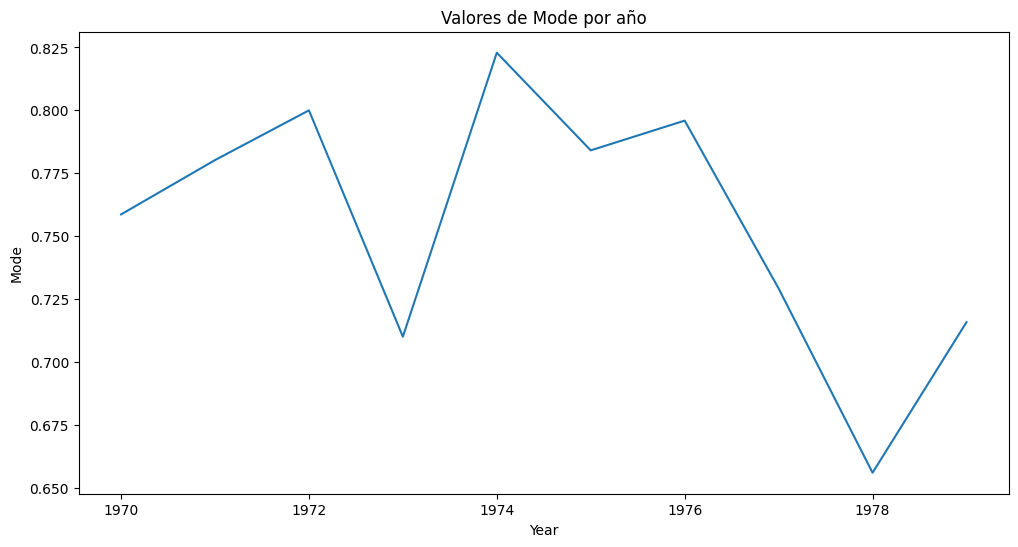

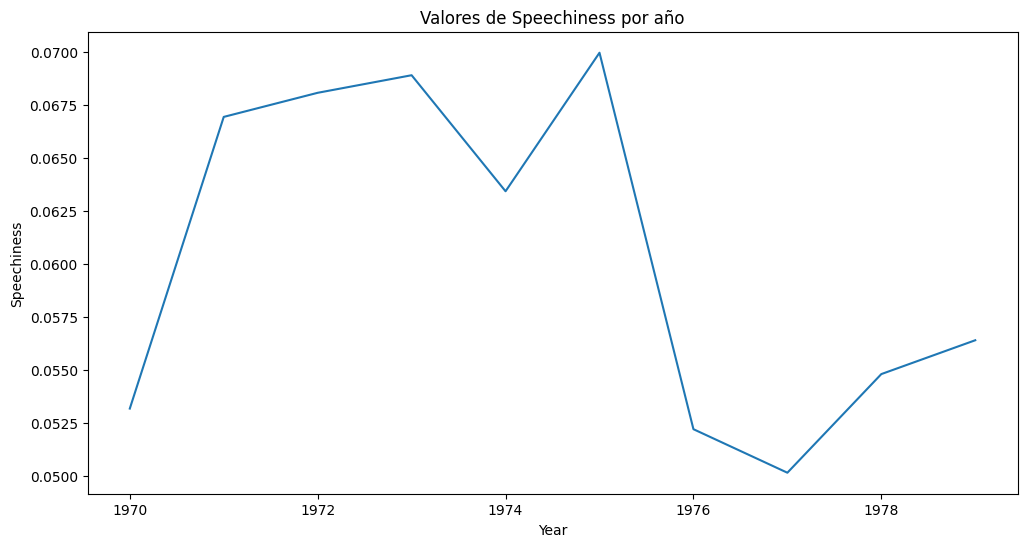

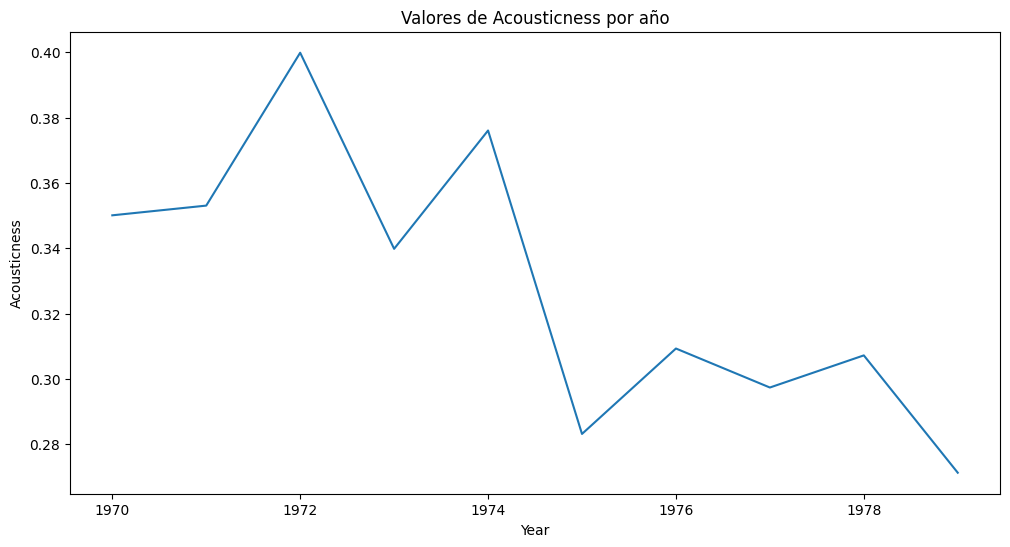

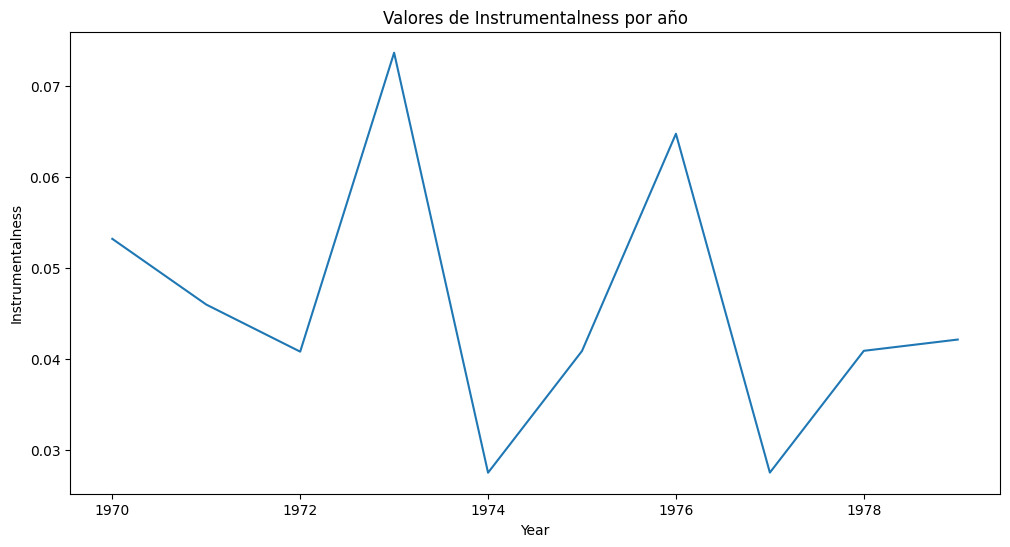

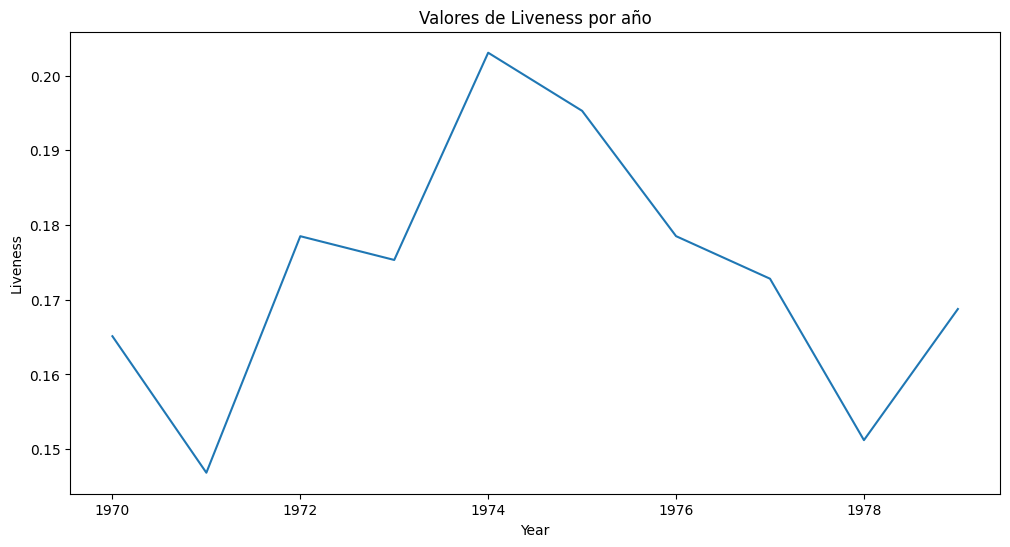

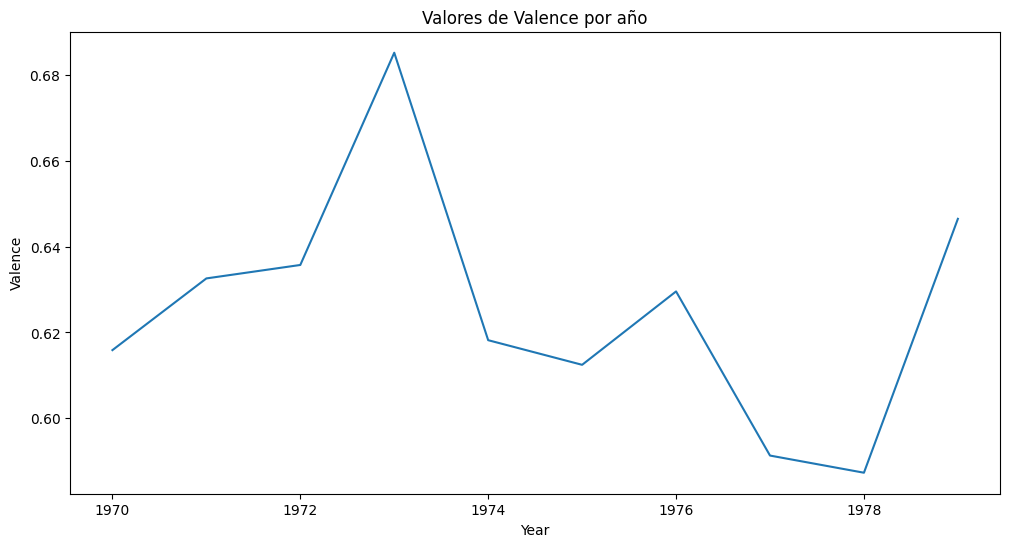

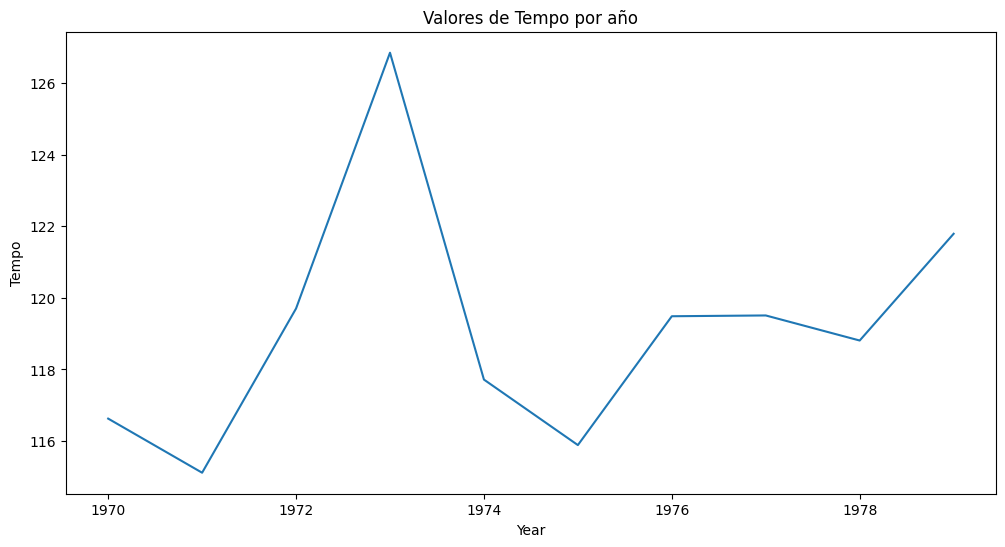

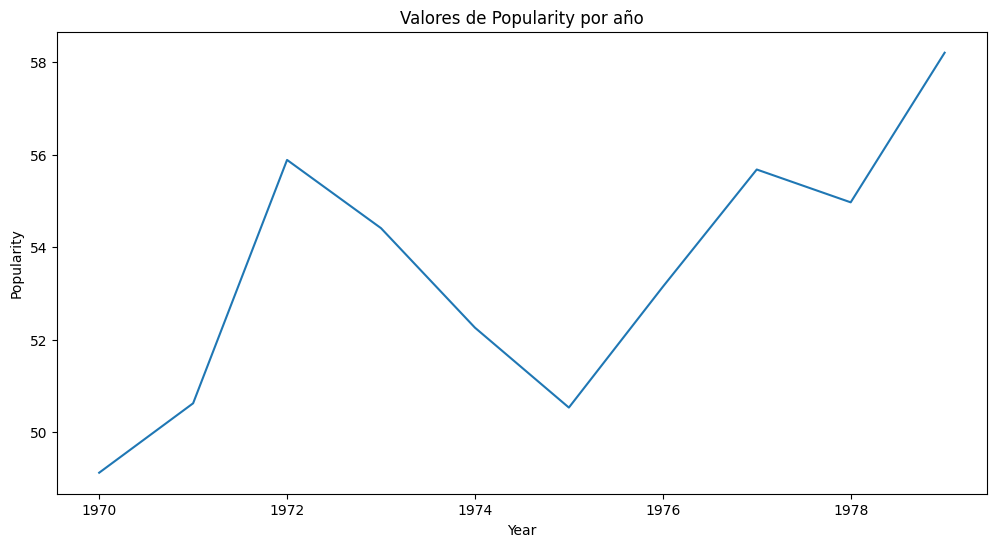

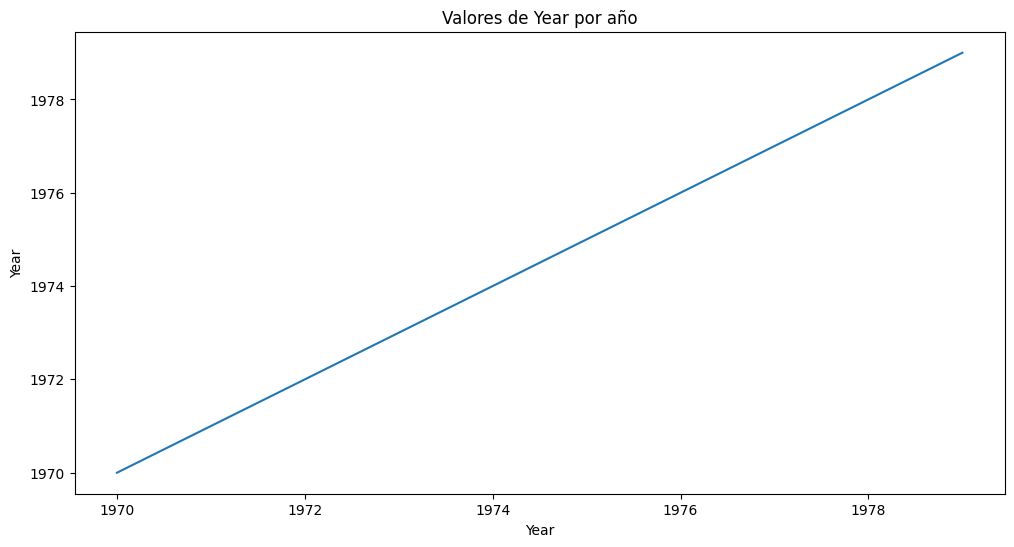

In [108]:
for col in clean_dataset.select_dtypes(exclude=["object"]):
    try:
        # Convertir la columna a numérica (ignorando errores si hay valores no convertibles)
        clean_dataset[col] = pd.to_numeric(clean_dataset[col], errors='coerce')
        # Análisis temporal
        plt.figure(figsize=(12, 6))
        clean_dataset.groupby('Year')[col].mean().plot()
        plt.title(f'Valores de {col} por año')
        plt.ylabel(col)
        plt.show()
    except Exception as e:
        print(f'Error en la columna {col}: {e}')


## 2.3 - Análisis Multivariado.

### PCA

Fue planteada la posibilidad de utilizar PCA. Sin embargo, considerando la naturaleza de las variables, que no se relacionan linealmente y, que como puede observarse abajo, se requeriría del uso de al menos ocho variables para obtener una varianza explicada significativa (considérese, 75 %), la idea fue descartada.

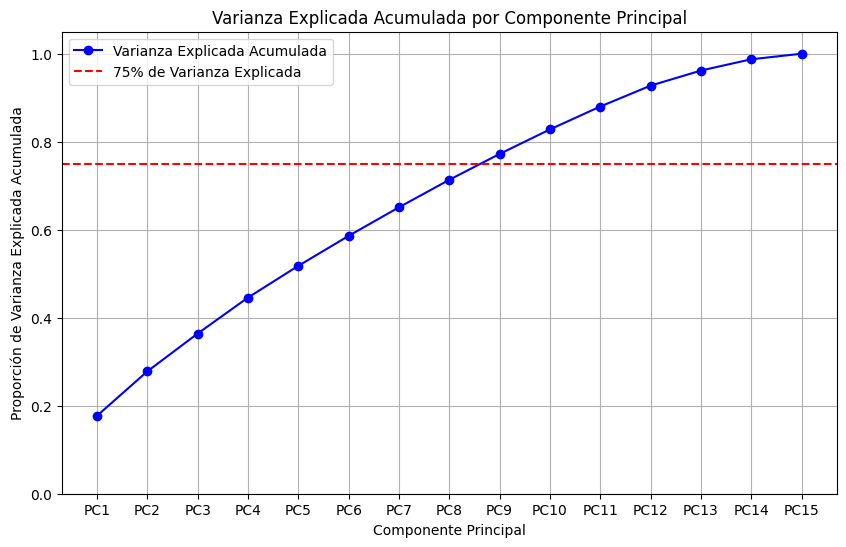

In [109]:
# Estandarización de las columnas numéricas.
scaler = StandardScaler()
scaled_columns = scaler.fit_transform(numeric_columns)

# Aplicación de PCA.
pca = PCA()
pca.fit_transform(scaled_columns)

# Cálculo de la varianza explicada acumulada.
autovalores = pca.explained_variance_
varianza_explicada = pca.explained_variance_ratio_
varianza_explicada_acumulada = np.cumsum(varianza_explicada)

# Gráfico de la varianza explicada acumulada.
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(varianza_explicada_acumulada) + 1), varianza_explicada_acumulada, marker='o', linestyle='-', color='b', label='Varianza Explicada Acumulada')
plt.axhline(y=0.75, color='r', linestyle='--', label='75% de Varianza Explicada')
plt.title('Varianza Explicada Acumulada por Componente Principal')
plt.xlabel('Componente Principal')
plt.ylabel('Proporción de Varianza Explicada Acumulada')
plt.xticks(range(1, len(varianza_explicada_acumulada) + 1), labels=[f'PC{i+1}' for i in range(len(varianza_explicada_acumulada))])
plt.ylim(0, 1.05)
plt.legend()
plt.grid()
plt.show()


### T-SNE

T-SNE es una técnica no supervisada **no lineal** de la dimensionalidad, la cual busca conservar el vecindario en el espacio de menor dimensionalidad.

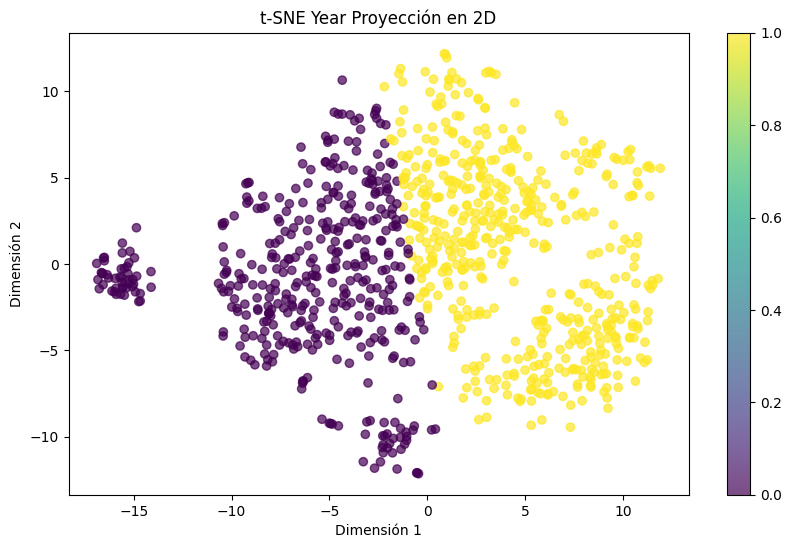

In [110]:
n_clusters = 2  # Cambia esto según el gráfico del codo

# Aplicación de t-SNE.
tsne = TSNE(n_components=2, random_state=42, perplexity=100)
X_tsne = tsne.fit_transform(scaled_columns)

# Aplicar K-Means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(X_tsne)

# Creación de DataFrame con los resultados de t-SNE.
tsne_df = pd.DataFrame(X_tsne, columns=['Dim 1', 'Dim 2'])

plt.figure(figsize=(10, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], alpha=0.7, cmap='viridis', c = clusters)
plt.title(f't-SNE {col} Proyección en 2D')
plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')
plt.colorbar()
plt.show()


### UMAP

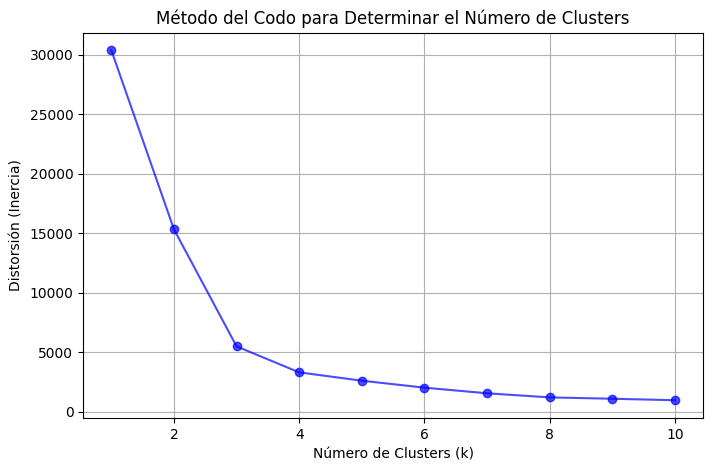

In [111]:
# Aplicar UMAP
umap_model = umap.UMAP(n_components=2, random_state=60, n_neighbors=5, n_jobs=1)
X_umap = umap_model.fit_transform(scaled_columns)

# Determinar el número óptimo de clusters usando el método del codo
def plot_elbow_method(X):
    distortions = []
    K = range(1, 11)
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        distortions.append(kmeans.inertia_)

    plt.figure(figsize=(8, 5))
    plt.plot(K, distortions, 'bo-', alpha=0.7)
    plt.xlabel('Número de Clusters (k)')
    plt.ylabel('Distorsión (Inercia)')
    plt.title('Método del Codo para Determinar el Número de Clusters')
    plt.grid(True)
    plt.show()

# Mostrar el gráfico del método del codo
plot_elbow_method(X_umap)

In [112]:
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(X_umap)
    # Cálculo del coeficiente de Silhouette.
    silhouette_avg = silhouette_score(X_umap, clusters)
    print(f"Coeficiente de Silhouette para {n_clusters} clusters: {silhouette_avg:.2f}")

    # Cálculo del índice de Davies-Bouldin.
    davies_bouldin = davies_bouldin_score(X_umap, clusters)
    print(f"Índice de Davies-Bouldin para {n_clusters} clusters: {davies_bouldin:.2f}")

Coeficiente de Silhouette para 2 clusters: 0.56
Índice de Davies-Bouldin para 2 clusters: 0.60
Coeficiente de Silhouette para 3 clusters: 0.66
Índice de Davies-Bouldin para 3 clusters: 0.38
Coeficiente de Silhouette para 4 clusters: 0.52
Índice de Davies-Bouldin para 4 clusters: 0.61
Coeficiente de Silhouette para 5 clusters: 0.52
Índice de Davies-Bouldin para 5 clusters: 0.59
Coeficiente de Silhouette para 6 clusters: 0.52
Índice de Davies-Bouldin para 6 clusters: 0.56
Coeficiente de Silhouette para 7 clusters: 0.54
Índice de Davies-Bouldin para 7 clusters: 0.49
Coeficiente de Silhouette para 8 clusters: 0.52
Índice de Davies-Bouldin para 8 clusters: 0.58
Coeficiente de Silhouette para 9 clusters: 0.47
Índice de Davies-Bouldin para 9 clusters: 0.69
Coeficiente de Silhouette para 10 clusters: 0.44
Índice de Davies-Bouldin para 10 clusters: 0.75


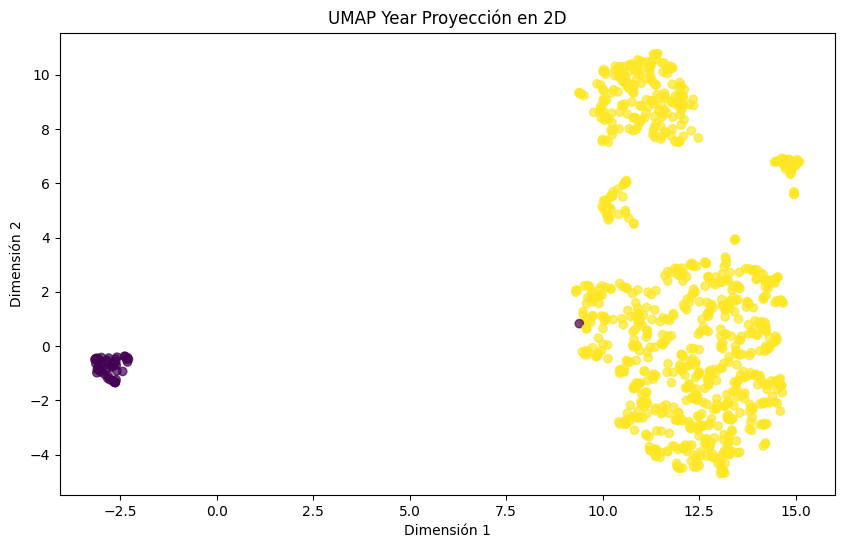

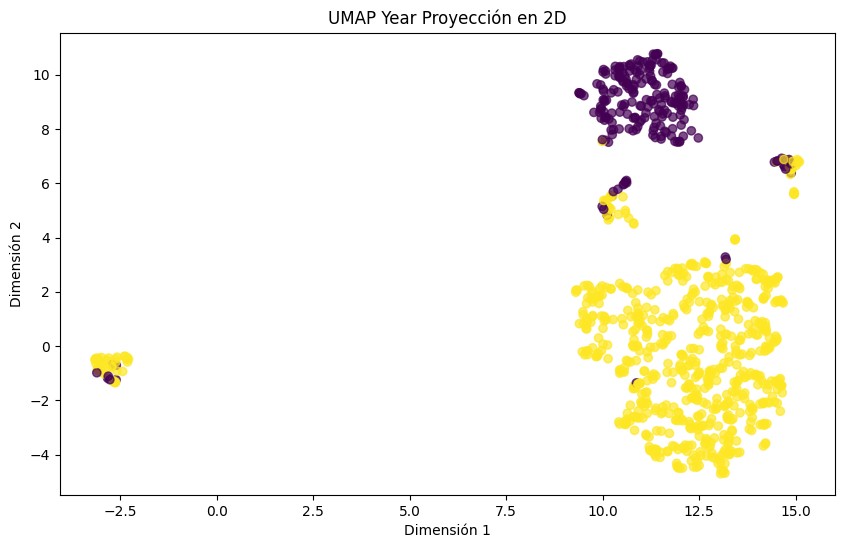

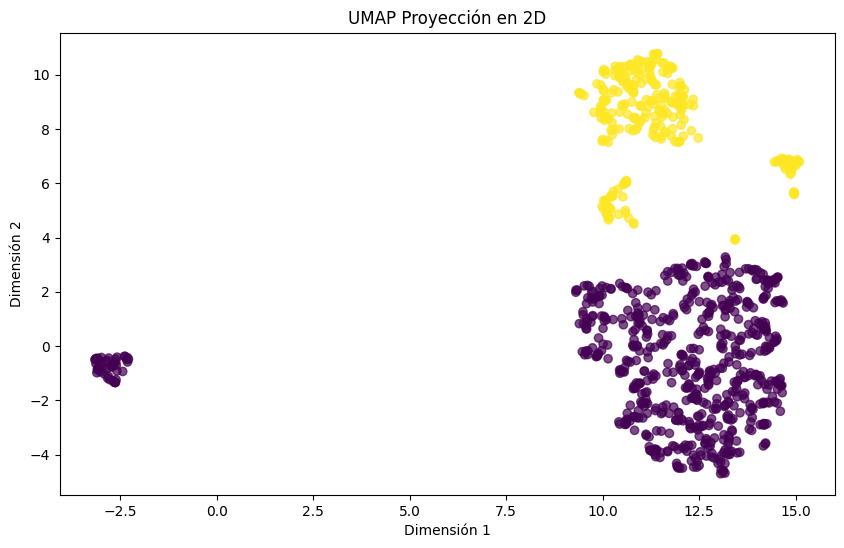

In [113]:
# Elegir el número de clusters, basado en el codo (supongamos 3 clusters)
n_clusters = 2  # Cambia esto según el gráfico del codo

# Aplicar K-Means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(X_umap)

# Crear DataFrame para los resultados de UMAP
umap_df = pd.DataFrame(X_umap, columns=['Dim 1', 'Dim 2'])
umap_df['Cluster'] = clusters

"""
for col in numeric_columns.columns:
    # Graficar los resultados de UMAP sin colormapping
    plt.figure(figsize=(10, 6))
    plt.scatter(X_umap[:, 0], X_umap[:, 1], alpha=0.7, cmap='viridis', c = clean_dataset[col])
    plt.title(f'UMAP {col} Proyección en 2D')
    plt.xlabel('Dimensión 1')
    plt.ylabel('Dimensión 2')
    plt.show()
"""

# Graficar los resultados de UMAP sin colormapping
plt.figure(figsize=(10, 6))
plt.scatter(X_umap[:, 0], X_umap[:, 1], alpha=0.7, cmap='viridis', c = clean_dataset["Time_Signature"])
plt.title(f'UMAP {col} Proyección en 2D')
plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(X_umap[:, 0], X_umap[:, 1], alpha=0.7, cmap='viridis', c = clean_dataset["Mode"])
plt.title(f'UMAP {col} Proyección en 2D')
plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')
plt.show()
    
plt.figure(figsize=(10, 6))
plt.scatter(X_umap[:, 0], X_umap[:, 1], alpha=0.7, cmap='viridis', c = clusters)
plt.title('UMAP Proyección en 2D')
plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')
plt.show()


Evaluamos el modelo mediante el coeficiente de Silhouette y el índice de Davies-Bouldin.

In [114]:

# Cálculo del coeficiente de Silhouette.
silhouette_avg = silhouette_score(X_umap, clusters)
print(f"Coeficiente de Silhouette para {n_clusters} clusters: {silhouette_avg:.2f}")

# Cálculo del índice de Davies-Bouldin.
davies_bouldin = davies_bouldin_score(X_umap, clusters)
print(f"Índice de Davies-Bouldin para {n_clusters} clusters: {davies_bouldin:.2f}")


Coeficiente de Silhouette para 2 clusters: 0.56
Índice de Davies-Bouldin para 2 clusters: 0.60


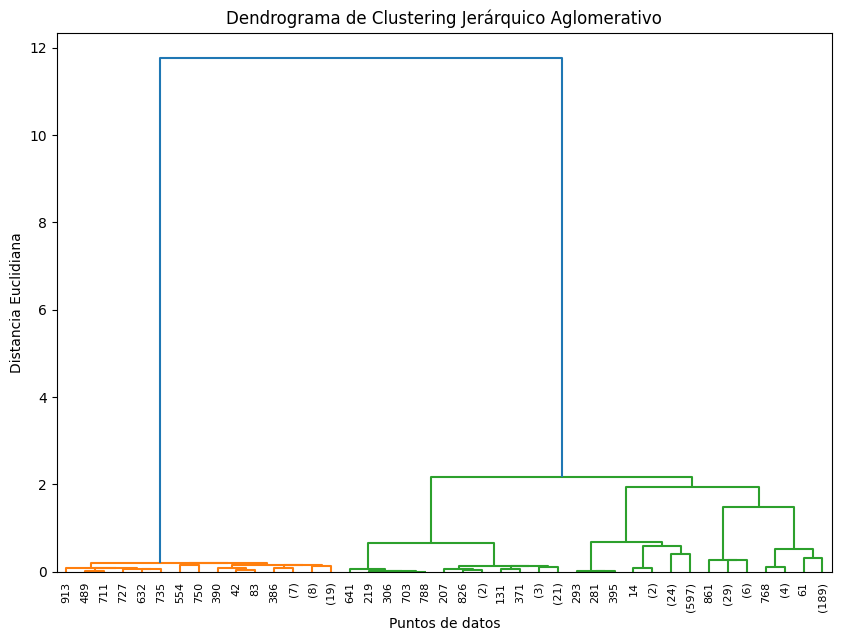

In [115]:
# Crear el linkage para el dendrograma (usamos 'single' como criterio de distancia)
linked = linkage(X_umap, method='single')

# Graficar el dendrograma
plt.figure(figsize=(10, 7))
plt.title('Dendrograma de Clustering Jerárquico Aglomerativo')
plt.xlabel('Puntos de datos')
plt.ylabel('Distancia Euclidiana')
dendrogram(linked, truncate_mode='level', p=5)  # Ajusta `p` para mostrar más o menos niveles del dendrograma
plt.show()

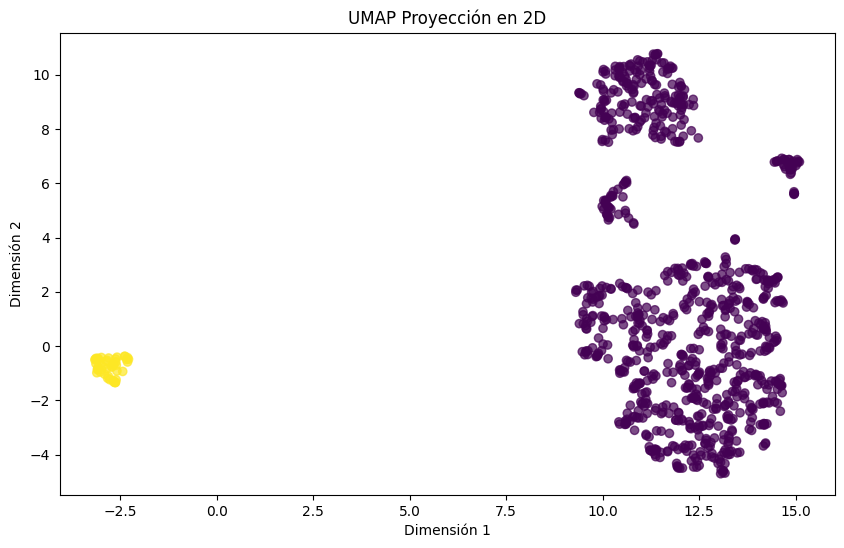

In [116]:

# Elegir el número de clusters (por ejemplo, 3) basado en el dendrograma
n_clusters = 2

# Aplicar Clustering Jerárquico Aglomerativo
hierarchical_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='single', metric='euclidean')
clusters = hierarchical_clustering.fit_predict(X_umap)

# Crear DataFrame para los resultados de UMAP con clusters
umap_cluster_df = pd.DataFrame(X_umap, columns=['Dim 1', 'Dim 2'])
umap_cluster_df['Cluster'] = clusters

plt.figure(figsize=(10, 6))
plt.scatter(X_umap[:, 0], X_umap[:, 1], alpha=0.7, cmap='viridis', c = clusters)
plt.title('UMAP Proyección en 2D')
plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')
plt.show()

# 3. Test de Hipótesis.

Hipótesis planteadas:

1. La popularidad proviene de Spotify.
2. Un tono mayor (mode=1) indica un valor mas alto de energy.
3. Un tono mayor (mode=1) se relaciona con una valencia más alta.

## 3.1. Primera Hipótesis.

In [117]:
# Cargar los datos
sp = pd.read_csv('df_spoti_30_10_2024.csv')

sp = sp.dropna()

# Crear un DataFrame para el gráfico con columnas de popularidad
data = pd.DataFrame({
    'Popularidad': pd.concat([sp['Popularity'], sp['Popularity_sp']], ignore_index=True),
    'Fuente': ['Dataset'] * len(sp) + ['Spotify'] * len(sp)
})

# Crear el gráfico de cajas
fig = px.box(data, x="Fuente", y="Popularidad", title="Comparación de Popularidad: Dataset vs Spotify", notched=True)

# Mostrar el gráfico
fig.show()


In [118]:
test = wilcoxon(sp["Popularity"], sp["Popularity_sp"])

print(test.pvalue)

4.393027440203682e-53


Un 73 % de las filas tienen una diferencia menor o igual a 10 en la popularidad.

In [119]:
# Calcular las diferencias
sp['diferencia'] = sp['Popularity'] - sp['Popularity_sp']

# Histograma de las diferencias
fig_hist = px.histogram(sp, x='diferencia', nbins=20, title="Distribución de las Diferencias de Popularidad (Dataset - Spotify)")
fig_hist.show()

# Box plot de las diferencias
fig_box = px.box(sp, y='diferencia', title="Box Plot de las Diferencias de Popularidad (Dataset - Spotify)")
fig_box.show()


In [120]:
# Calcular la mediana de las diferencias
mediana_diferencias = sp['diferencia'].median()

# Calcular la desviación estándar de las diferencias
desviacion_diferencias = sp['diferencia'].std()

# Mostrar resultados
print(f"Mediana de las diferencias: {mediana_diferencias}")
print(f"Desviación estándar de las diferencias: {desviacion_diferencias}")

Mediana de las diferencias: 2.0
Desviación estándar de las diferencias: 15.512926027263834


La prueba de Wilcoxon rechaza la hipótesis nula debido a esta variabilidad. Aunque el valor central de las diferencias sea pequeño, la dispersión de las diferencias hace que el test estadístico detecte estas variaciones como significativas. Esto implica que, aunque no haya una diferencia sistemática clara (la mediana cercana a 0 lo sugiere), las diferencias individuales entre cada canción son lo suficientemente grandes como para indicar que las dos mediciones de popularidad no son idénticas en la mayoría de los casos.

## 3.2. Segunda Hipótesis.

In [121]:
from scipy.stats import shapiro

# Separamos el DataFrame en dos conjuntos
dataset_mode_0 = clean_dataset[clean_dataset["Mode"] == 0]
dataset_mode_1 = clean_dataset[clean_dataset["Mode"] == 1]

# Evaluamos normalidad de la variable sepal_length para setosa
stat, p = shapiro(dataset_mode_0['Energy'])
print(f"Test de Shapiro-Wilk para sepal_length (tipo=0): Estadístico={stat:.3f}, p-valor={p:.3f}")

# Evaluamos normalidad de la variable sepal_length para virginica
stat, p = shapiro(dataset_mode_1['Energy'])
print(f"Test de Shapiro-Wilk para sepal_length (tipo=1): Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Shapiro-Wilk para sepal_length (tipo=0): Estadístico=0.982, p-valor=0.006
Test de Shapiro-Wilk para sepal_length (tipo=1): Estadístico=0.990, p-valor=0.000


No son normales.

In [122]:
import scipy.stats as stats

# Test de Levene para comparar Population_mln entre países desarrollados y en vías de desarrollo
stat, p = stats.levene(dataset_mode_0["Energy"], dataset_mode_1["Energy"])
print(f"Test de Levene para Population_mln: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Levene para Population_mln: Estadístico=0.515, p-valor=0.473


Son homocedásticos.

In [123]:
# Test de Mann-Whitney U para comparar Population_mln entre países desarrollados y en vías de desarrollo
stat, p = stats.mannwhitneyu(dataset_mode_0["Energy"], dataset_mode_1["Energy"])
print(f"Test de Mann-Whitney U para Energy: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Interpretación de los resultados
alpha = 0.05  # Nivel de significancia
if p > alpha:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
    print("No hay una diferencia significativa en la energía entre las canciones con moda 0 y moda 1.")
else:
    print("Se rechaza la hipótesis nula.")
    print("Existe una diferencia significativa en la energía entre canciones con moda 0 y moda 1.")

Test de Mann-Whitney U para Energy: Estadístico=90324.500, p-valor=0.014
Se rechaza la hipótesis nula.
Existe una diferencia significativa en la energía entre canciones con moda 0 y moda 1.


## 3.3. Tercera Hipótesis.

In [124]:
from scipy.stats import shapiro

# Evaluamos normalidad de la variable sepal_length para setosa
stat, p = shapiro(dataset_mode_0['Valence'])
print(f"Test de Shapiro-Wilk para sepal_length (tipo=0): Estadístico={stat:.3f}, p-valor={p:.3f}")

# Evaluamos normalidad de la variable sepal_length para virginica
stat, p = shapiro(dataset_mode_1['Valence'])
print(f"Test de Shapiro-Wilk para sepal_length (tipo=1): Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Shapiro-Wilk para sepal_length (tipo=0): Estadístico=0.946, p-valor=0.000
Test de Shapiro-Wilk para sepal_length (tipo=1): Estadístico=0.944, p-valor=0.000


No son normales.

In [125]:
import scipy.stats as stats

# Test de Levene para comparar Population_mln entre países desarrollados y en vías de desarrollo
stat, p = stats.levene(dataset_mode_0["Valence"], dataset_mode_1["Valence"])
print(f"Test de Levene para Population_mln: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Levene para Population_mln: Estadístico=0.037, p-valor=0.848


Son homocedásticos.

In [126]:
# Test de Mann-Whitney U para comparar Population_mln entre países desarrollados y en vías de desarrollo
stat, p = stats.mannwhitneyu(dataset_mode_0["Valence"], dataset_mode_1["Valence"])
print(f"Test de Mann-Whitney U para Energy: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Interpretación de los resultados
alpha = 0.05  # Nivel de significancia
if p > alpha:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
    print("No hay una diferencia significativa en la valencia entre las canciones con moda 0 y moda 1.")
else:
    print("Se rechaza la hipótesis nula.")
    print("Existe una diferencia significativa en la valencia entre canciones con moda 0 y moda 1.")

Test de Mann-Whitney U para Energy: Estadístico=82406.500, p-valor=0.807
No hay suficiente evidencia para rechazar la hipótesis nula.
No hay una diferencia significativa en la valencia entre las canciones con moda 0 y moda 1.


## 3.4. Cuarta Hipótesis.

Las canciones con un tempo más alto son más bailables:

DESCARTADA. LA DANCEABILIDAD ESTÁ BASADA EN EL TEMPO.

In [127]:
clean_dataset.describe()

Duration  Time_Signature  Danceability      Energy         Key  \
count       939.0      939.000000    939.000000  939.000000  939.000000   
mean   228.532481        3.949947      0.590236    0.583969    5.194888   
std     83.347001        0.218171      0.155991    0.199870    3.562320   
min          76.0        3.000000      0.094200    0.005320    0.000000   
25%         184.5        4.000000      0.489000    0.434500    2.000000   
50%         215.0        4.000000      0.603000    0.584000    5.000000   
75%         251.0        4.000000      0.699000    0.733500    8.000000   
max        1561.0        4.000000      0.985000    0.995000   11.000000   

         Loudness        Mode  Speechiness  Acousticness  Instrumentalness  \
count  939.000000  939.000000   939.000000    939.000000        939.000000   
mean    -9.869329    0.755059     0.060397      0.328818          0.045878   
std      3.691475    0.430282     0.066434      0.276509          0.160371   
min    -31.646000    0.000000     0.023200      0.000022          0.000000   
25%    -12.355000    1.000000     0.031300      0.077300          0.000000   
50%     -9.581000    1.000000     0.038400      0.261000          0.000051   
75%     -7.125000    1.000000     0.057100      0.536500          0.002775   
max     -2.340000    1.000000     0.737000      0.996000          0.970000   

         Liveness     Valence       Tempo  Popularity         Year  
count  939.000000  939.000000  939.000000  939.000000   939.000000  
mean     0.173667    0.625982  119.254501   53.555911  1974.541001  
std      0.152714    0.250752   26.993127   17.836853     2.850798  
min      0.015000    0.000010   53.986000    0.000000  1970.000000  
25%      0.085600    0.430000  100.129000   44.000000  1972.000000  
50%      0.118000    0.658000  117.828000   56.000000  1975.000000  
75%      0.195000    0.850500  134.207000   66.000000  1977.000000  
max      0.985000    0.989000  211.270000   90.000000  1979.000000

In [128]:
# Separamos el DataFrame en dos conjuntos
dataset_tempo_high = clean_dataset[clean_dataset["Tempo"] >= 200]
dataset_tempo_low = clean_dataset[clean_dataset["Tempo"] < 200]

# Evaluamos normalidad de la variable sepal_length para setosa
stat, p = shapiro(dataset_tempo_high['Danceability'])
print(f"Test de Shapiro-Wilk para sepal_length (tipo=0): Estadístico={stat:.3f}, p-valor={p:.3f}")

# Evaluamos normalidad de la variable sepal_length para virginica
stat, p = shapiro(dataset_tempo_low['Danceability'])
print(f"Test de Shapiro-Wilk para sepal_length (tipo=1): Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Shapiro-Wilk para sepal_length (tipo=0): Estadístico=0.928, p-valor=0.390
Test de Shapiro-Wilk para sepal_length (tipo=1): Estadístico=0.988, p-valor=0.000


In [129]:
import scipy.stats as stats

# Test de Levene para comparar Population_mln entre países desarrollados y en vías de desarrollo
stat, p = stats.levene(dataset_tempo_high["Danceability"], dataset_tempo_low["Danceability"])
print(f"Test de Levene para Population_mln: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Levene para Population_mln: Estadístico=2.996, p-valor=0.084


In [130]:
# Test de Mann-Whitney U para comparar Population_mln entre países desarrollados y en vías de desarrollo
stat, p = stats.mannwhitneyu(dataset_tempo_high["Danceability"], dataset_tempo_low["Danceability"])
print(f"Test de Mann-Whitney U para Energy: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Interpretación de los resultados
alpha = 0.05  # Nivel de significancia
if p > alpha:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
    print("No hay una diferencia significativa en la danceabilidad entre las canciones con tempo alto y con tempo bajo.")
else:
    print("Se rechaza la hipótesis nula.")
    print("Existe una diferencia significativa en la danceabilidad entre canciones con tempo alto y con tempo bajo.")

Test de Mann-Whitney U para Energy: Estadístico=1241.000, p-valor=0.000
Se rechaza la hipótesis nula.
Existe una diferencia significativa en la danceabilidad entre canciones con tempo alto y con tempo bajo.


In [131]:
for i in range(70, 200):
    dataset_tempo_high = clean_dataset[clean_dataset["Tempo"] >= i]
    dataset_tempo_low = clean_dataset[clean_dataset["Tempo"] < i]
    stat, p = stats.mannwhitneyu(dataset_tempo_high["Danceability"], dataset_tempo_low["Danceability"])
    
    alpha = 0.05
    if (i == 120):
        print(p)
        print(f"Tempo alto (muestra): {dataset_tempo_high.shape[0]}")
        print(f"Tempo bajo (muestra): {dataset_tempo_low.shape[0]}")

1.338151412804856e-05
Tempo alto (muestra): 435
Tempo bajo (muestra): 504


In [132]:
# Separamos el DataFrame en dos conjuntos
dataset_danceability_high = clean_dataset[clean_dataset["Danceability"] >= 0.75]
dataset_danceability_low = clean_dataset[clean_dataset["Danceability"] < 0.75]

# Evaluamos normalidad de la variable sepal_length para setosa
stat, p = shapiro(dataset_danceability_high['Tempo'])
print(f"Test de Shapiro-Wilk para sepal_length (tipo=0): Estadístico={stat:.3f}, p-valor={p:.3f}")

# Evaluamos normalidad de la variable sepal_length para virginica
stat, p = shapiro(dataset_danceability_low['Tempo'])
print(f"Test de Shapiro-Wilk para sepal_length (tipo=1): Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Shapiro-Wilk para sepal_length (tipo=0): Estadístico=0.986, p-valor=0.132
Test de Shapiro-Wilk para sepal_length (tipo=1): Estadístico=0.979, p-valor=0.000


In [133]:
# Test de Levene para comparar Population_mln entre países desarrollados y en vías de desarrollo
stat, p = stats.levene(dataset_danceability_high["Tempo"], dataset_danceability_low["Tempo"])
print(f"Test de Levene para Population_mln: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Levene para Population_mln: Estadístico=48.675, p-valor=0.000


In [134]:
# Test de Kruskal-Wallis para comparar GDP_per_capita entre países desarrollados y en vías de desarrollo
stat, p = stats.kruskal(dataset_danceability_high["Tempo"], dataset_danceability_low["Tempo"])
print(f"Test de Kruskal-Wallis para Tempo: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Interpretación de los resultados
alpha = 0.05  # Nivel de significancia
if p > alpha:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
    print("No hay una diferencia significativa en el tempo entre las canciones con alta danceabilidad y baja danceabilidad.")
else:
    print("Se rechaza la hipótesis nula.")
    print("Existe una diferencia significativa en el tempo entre las canciones con alta danceabilidad y baja danceabilidad.")

Test de Kruskal-Wallis para Tempo: Estadístico=5.343, p-valor=0.021
Se rechaza la hipótesis nula.
Existe una diferencia significativa en el tempo entre las canciones con alta danceabilidad y baja danceabilidad.


In [135]:
stat, p = stats.ttest_ind(dataset_danceability_high["Tempo"], dataset_danceability_low["Tempo"], equal_var=False)
print(f"Test de Welch para Tempo: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Interpretación de los resultados
alpha = 0.05  # Nivel de significancia
if p > alpha:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
    print("No hay una diferencia significativa en el tempo entre las canciones con alta danceabilidad y baja danceabilidad.")
else:
    print("Se rechaza la hipótesis nula.")
    print("Existe una diferencia significativa en el tempo entre las canciones con alta danceabilidad y baja danceabilidad.")

Test de Welch para Tempo: Estadístico=-3.878, p-valor=0.000
Se rechaza la hipótesis nula.
Existe una diferencia significativa en el tempo entre las canciones con alta danceabilidad y baja danceabilidad.


## 3.5

La frecuencia de uso de tonalidades usadas en los 70's pueden trasladarse a un rango más amplio de décadas, en particular,

La frecuencia de uso de las tonalidades usadas en los 70's son representativas del último siglo.

In [136]:
test = wilcoxon(combined["Original"], combined["Ampliado"])

print(test.pvalue)

0.9697265625


No hay suficiente evidencia para rechazar la hipótesis nula. Por lo tanto, no existe una diferencia signfificativa en la frecuencia de uso de las tonalidades o *keys* en la década de los 70's y en los últimos cien años.

## 3.6

Un nombre de canción más corto está ligado a una popularidad más alta, puesto a que es más fácil de recordar.

In [150]:
high_popularity_subset = track_dataset[track_dataset["Popularity"] >= 75]
low_popularity_subset = track_dataset[track_dataset["Popularity"] < 75]

# Evaluamos normalidad de la variable sepal_length para setosa
stat, p = shapiro(high_popularity_subset['Track_Length'])
print(f"Test de Shapiro-Wilk para sepal_length (tipo=0): Estadístico={stat:.3f}, p-valor={p:.3f}")

# Evaluamos normalidad de la variable sepal_length para virginica
stat, p = shapiro(low_popularity_subset['Track_Length'])
print(f"Test de Shapiro-Wilk para sepal_length (tipo=1): Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Shapiro-Wilk para sepal_length (tipo=0): Estadístico=0.874, p-valor=0.000
Test de Shapiro-Wilk para sepal_length (tipo=1): Estadístico=0.911, p-valor=0.000


In [151]:
stat, p = stats.levene(high_popularity_subset["Track_Length"], low_popularity_subset["Track_Length"])
print(f"Test de Levene para Population_mln: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Levene para Population_mln: Estadístico=4.061, p-valor=0.044


In [152]:
# Test de Kruskal-Wallis para comparar GDP_per_capita entre países desarrollados y en vías de desarrollo
stat, p = stats.kruskal(high_popularity_subset["Track_Length"], low_popularity_subset["Track_Length"])
print(f"Test de Kruskal-Wallis para Tempo: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Interpretación de los resultados
alpha = 0.05  # Nivel de significancia
if p > alpha:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
    print("No hay una diferencia significativa en el tempo entre las canciones con alta danceabilidad y baja danceabilidad.")
else:
    print("Se rechaza la hipótesis nula.")
    print("Existe una diferencia significativa en la popularidad entre las canciones con una alta ccantidad de palabras y una baja cantidad de palabras.")

Test de Kruskal-Wallis para Tempo: Estadístico=24.483, p-valor=0.000
Se rechaza la hipótesis nula.
Existe una diferencia significativa en la popularidad entre las canciones con una alta ccantidad de palabras y una baja cantidad de palabras.


In [153]:
high_track_word_length_subset = track_dataset[track_dataset["Track_Length"] > 3]
low_track_word_length_subset = track_dataset[track_dataset["Track_Length"] <= 3]

# Evaluamos normalidad de la variable sepal_length para setosa
stat, p = shapiro(high_track_word_length_subset['Popularity'])
print(f"Test de Shapiro-Wilk para sepal_length (tipo=0): Estadístico={stat:.3f}, p-valor={p:.3f}")

# Evaluamos normalidad de la variable sepal_length para virginica
stat, p = shapiro(low_track_word_length_subset['Popularity'])
print(f"Test de Shapiro-Wilk para sepal_length (tipo=1): Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Shapiro-Wilk para sepal_length (tipo=0): Estadístico=0.965, p-valor=0.000
Test de Shapiro-Wilk para sepal_length (tipo=1): Estadístico=0.972, p-valor=0.000


In [154]:
stat, p = stats.levene(high_track_word_length_subset["Popularity"], low_track_word_length_subset["Popularity"])
print(f"Test de Levene para Population_mln: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Levene para Population_mln: Estadístico=26.329, p-valor=0.000


In [155]:
# Test de Kruskal-Wallis para comparar GDP_per_capita entre países desarrollados y en vías de desarrollo
stat, p = stats.kruskal(high_track_word_length_subset["Popularity"], low_track_word_length_subset["Popularity"])
print(f"Test de Kruskal-Wallis para Tempo: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Interpretación de los resultados
alpha = 0.05  # Nivel de significancia
if p > alpha:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
    print("No hay una diferencia significativa en el tempo entre las canciones con alta danceabilidad y baja danceabilidad.")
else:
    print("Se rechaza la hipótesis nula.")
    print("Existe una diferencia significativa en la popularidad entre las canciones con una alta ccantidad de palabras y una baja cantidad de palabras.")

Test de Kruskal-Wallis para Tempo: Estadístico=79.114, p-valor=0.000
Se rechaza la hipótesis nula.
Existe una diferencia significativa en la popularidad entre las canciones con una alta ccantidad de palabras y una baja cantidad de palabras.


## 3.7.

Los temas largos no se pueden bailar.

In [143]:
# Evaluamos normalidad de la variable sepal_length para setosa
stat, p = shapiro(dataset_danceability_high['Duration'])
print(f"Test de Shapiro-Wilk para sepal_length (tipo=0): Estadístico={stat:.3f}, p-valor={p:.3f}")

# Evaluamos normalidad de la variable sepal_length para virginica
stat, p = shapiro(dataset_danceability_low['Duration'])
print(f"Test de Shapiro-Wilk para sepal_length (tipo=1): Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Shapiro-Wilk para sepal_length (tipo=0): Estadístico=0.836, p-valor=0.000
Test de Shapiro-Wilk para sepal_length (tipo=1): Estadístico=0.645, p-valor=0.000


In [144]:
# Test de Levene para comparar Population_mln entre países desarrollados y en vías de desarrollo
stat, p = stats.levene(dataset_danceability_high["Duration"], dataset_danceability_low["Duration"])
print(f"Test de Levene para Population_mln: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Levene para Population_mln: Estadístico=0.240, p-valor=0.624


In [145]:
# Test de Mann-Whitney U para comparar Population_mln entre países desarrollados y en vías de desarrollo
stat, p = stats.mannwhitneyu(dataset_danceability_high["Duration"], dataset_danceability_low["Duration"])
print(f"Test de Mann-Whitney U para Energy: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Interpretación de los resultados
alpha = 0.05  # Nivel de significancia
if p > alpha:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
    print("No hay una diferencia significativa en la duración entre las canciones con bailabilidad alta y bailabilidad baja.")
else:
    print("Se rechaza la hipótesis nula.")
    print("Existe una diferencia significativa en la duración entre las canciones con bailabilidad alta y bailabilidad baja.")

Test de Mann-Whitney U para Energy: Estadístico=63519.000, p-valor=0.318
No hay suficiente evidencia para rechazar la hipótesis nula.
No hay una diferencia significativa en la duración entre las canciones con bailabilidad alta y bailabilidad baja.


## 3.9.

La tonalidad de un tema no tiene un efecto significativo en la valencia.

In [146]:
# Chequeo de la condición de normalidad.
for category in clean_dataset['Key'].unique():
    data = clean_dataset[clean_dataset['Key'] == category]['Valence']
    stat, p_value = stats.shapiro(data)
    
    if (p_value < 0.05):
        print("No se cumple el supuesto de normalidad para cada grupo.")
        break

No se cumple el supuesto de normalidad para cada grupo.


In [147]:
# Test de Levene
stat, p_value = stats.levene(*[clean_dataset[clean_dataset['Key'] == category]['Valence'] for category in clean_dataset['Key'].unique()])
print(f'p-value Levene: {p_value}')

p-value Levene: 0.8517009426919266


In [148]:
# Test de Kruskal-Wallis.
stat, p = stats.kruskal(*[clean_dataset[clean_dataset['Key'] == category]['Valence'] for category in clean_dataset['Key'].unique()])
print(f"Test de Kruskal-Wallis: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Definición del nivel de significancia.
alpha = 0.05

# Interpretación de los resultados.
if p > alpha:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
    print("No hay una diferencia significativa en la valencia entre las distintas tonalidades.")
else:
    print("Se rechaza la hipótesis nula.")
    print("Existe una diferencia significativa en la valencia entre las distintas tonalidades.")

Test de Kruskal-Wallis: Estadístico=4.530, p-valor=0.952
No hay suficiente evidencia para rechazar la hipótesis nula.
No hay una diferencia significativa en la valencia entre las distintas tonalidades.
